# Overview
A área de marketing de uma empresa imobiliária quer prever o valor de imóveis para seus clientes, e nesse projeto, os analistas negociais e corretores querem, também, entender as principais variáveis e características chaves que influenciam no valor de venda do imóvel (Ex: quantificar o impacto do aumento da área do imóvel no preço, ou quantificar o impacto de ter piscina, ou não no preço)

## Objetivo 1, interpretabilidade: 
construir uma regressão linear simples, com poucas variáveis importantes, visando gerar insights para corretores e proprietários no quesito precificação dos imóveis. Ou seja, o foco será na interpretação dos coeficientes (ex: se aumentar a área do imóvel em uma unidade isso irá aumentar em Y o preço deste imóvel).

## Objetivo 2, predição: 
construir um modelo com alto poder preditivo, com mais variáveis, visando um bom desempenho e

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
df = pd.read_csv('train.csv')
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_validation = pd.read_csv('validation.csv')
submission_examp = pd.read_csv('submission_example.csv')

# Configurar opção para exibir todas as colunas
pd.set_option('display.max_columns', None)

In [2]:
df_validation


index  ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco  \
0     1293            60         RL     78.0        10140  Pave  NaN   
1     1306           120         RL     48.0         6955  Pave  NaN   
2      721           120         RM      NaN         4426  Pave  NaN   
3      345            50         RL     65.0         6435  Pave  NaN   
4       39            90         RL     65.0         6040  Pave  NaN   
..     ...           ...        ...      ...          ...   ...  ...   
287    408            60         RL    109.0        14154  Pave  NaN   
288   1038           160         RM     21.0         1533  Pave  NaN   
289   1221            20         RL     55.0         8250  Pave  NaN   
290   1411            50         RL     80.0         9600  Pave  NaN   
291   1190           190         RL      NaN        32463  Pave  NaN   

    FormaProp PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1  \
0         Reg       Lvl   AllPub     Inside            Gtl   NWAmes     Norm   
1         IR1       Lvl   AllPub     Inside            Gtl  NridgHt     Norm   
2         Reg       Lvl   AllPub     Inside            Gtl  CollgCr     Norm   
3         Reg       Lvl   AllPub     Inside            Gtl  BrkSide     RRAn   
4         Reg       Lvl   AllPub     Inside            Gtl  Edwards     Norm   
..        ...       ...      ...        ...            ...      ...      ...   
287       Reg       Lvl   AllPub     Corner            Gtl  NridgHt     Norm   
288       Reg       Lvl   AllPub     Inside            Gtl  MeadowV     Norm   
289       Reg       Lvl   AllPub     Inside            Gtl   Sawyer    Feedr   
290       Reg       Lvl   AllPub     Inside            Gtl    NAmes     Norm   
291       Reg       Low   AllPub     Inside            Mod  Mitchel     Norm   

    Estrada2 TipoHabitacao EstiloHabitacao  Qualidade  Condicao  \
0       Norm          1Fam          2Story          7         5   
1       Norm        TwnhsE          1Story          7         5   
2       Norm        TwnhsE          1Story          6         5   
3       Norm          1Fam          1.5Fin          6         5   
4       Norm        Duplex          1Story          4         5   
..       ...           ...             ...        ...       ...   
287     Norm          1Fam          2Story          7         5   
288     Norm         Twnhs          2Story          4         6   
289     Norm          1Fam          1Story          5         5   
290     Norm          1Fam          1.5Fin          6         8   
291     Norm        2fmCon          1Story          4         4   

     AnoConstrucao  AnoReforma TipoTelhado MaterialTelhado Exterior1  \
0             1976        1976       Gable         CompShg   HdBoard   
1             2005        2006       Gable         CompShg   VinylSd   
2             2004        2004       Gable         CompShg   VinylSd   
3             1939        1950       Gable         CompShg   MetalSd   
4             1955        1955       Gable         CompShg   AsbShng   
..             ...         ...         ...             ...       ...   
287           2006        2006       Gable         CompShg   VinylSd   
288           1970        2008       Gable         CompShg   CemntBd   
289           1968        1968         Hip         CompShg   HdBoard   
290           1950        2005       Gable         CompShg   VinylSd   
291           1961        1975       Gable         CompShg   MetalSd   

    Exterior2 TipoAlvenaria  AreaAlvenaria QualidadeCobertura CondicaoExterna  \
0     HdBoard           NaN            0.0                 TA              TA   
1     VinylSd         Stone           94.0                 Gd              TA   
2     VinylSd       BrkFace          169.0                 Gd              TA   
3     MetalSd           NaN            0.0                 TA              TA   
4     Plywood           NaN            0.0                 TA              TA   
..        ...          

In [3]:
df_train.describe(percentiles = [0.25, 0.5, 0.75, 0.99])

index  ClasseImovel     Fachada    TamanhoLote   Qualidade  \
count   934.000000    934.000000  774.000000     934.000000  934.000000   
mean    734.989293     56.349036   70.989664   10640.102784    6.108137   
std     418.628317     41.831723   24.921297   11239.439798    1.362520   
min       0.000000     20.000000   21.000000    1477.000000    1.000000   
25%     368.250000     20.000000   60.000000    7731.000000    5.000000   
50%     737.500000     50.000000   70.000000    9452.500000    6.000000   
75%    1088.500000     70.000000   80.000000   11522.500000    7.000000   
99%    1446.670000    190.000000  145.350000   38907.980000    9.670000   
max    1459.000000    190.000000  313.000000  215245.000000   10.000000   

         Condicao  AnoConstrucao   AnoReforma  AreaAlvenaria  AreaAcabPorao1  \
count  934.000000     934.000000   934.000000     928.000000      934.000000   
mean     5.625268    1971.325482  1985.404711     101.187500      451.568522   
std      1.109659      30.177770    20.428870     173.750591      465.534345   
min      2.000000    1880.000000  1950.000000       0.000000        0.000000   
25%      5.000000    1954.000000  1967.000000       0.000000        0.000000   
50%      5.000000    1972.000000  1995.000000       0.000000      386.500000   
75%      6.000000    2001.000000  2004.000000     160.000000      712.750000   
99%      9.000000    2009.000000  2009.000000     767.460000     1572.670000   
max      9.000000    2009.000000  2010.000000    1129.000000     5644.000000   

       AreaAcabPorao2  AreaInacabPorao    AreaPorao   AreaTerreo   Area2Andar  \
count       934.00000       934.000000   934.000000   934.000000   934.000000   
mean         47.62848       566.519272  1065.716274  1166.923983   342.147752   
std         167.96173       443.053416   439.224536   387.171198   429.208786   
min           0.00000         0.000000     0.000000   334.000000     0.000000   
25%           0.00000       219.250000   804.000000   884.250000     0.000000   
50%           0.00000       483.000000   999.500000  1088.500000     0.000000   
75%           0.00000       802.000000  1313.250000  1405.750000   729.000000   
99%         893.79000      1798.350000  2156.350000  2221.020000  1395.190000   
max        1474.00000      2336.000000  6110.000000  4692.000000  2065.000000   

       BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  \
count          934.000000      934.000000     934.000000   934.000000   
mean             6.473233     1515.544968       0.437901     0.063169   
std             50.973133      520.305829       0.527790     0.252051   
min              0.000000      334.000000       0.000000     0.000000   
25%              0.000000     1136.250000       0.000000     0.000000   
50%              0.000000     1468.500000       0.000000     0.000000   
75%              0.000000     1767.750000       1.000000     0.000000   
99%            367.370000     3084.680000       2.000000     1.000000   
max            572.000000     5642.000000       3.000000     2.000000   

         Banheiro      Lavabo  BedroomAbvGr  KitchenAbvGr  TotalQuartos  \
count  934.000000  934.000000    934.000000    934.000000     934.00000   
mean     1.563169    0.379015      2.870450      1.043897       6.51606   
std      0.543670    0.500620      0.818676      0.210140       1.60961   
min      0.000000    0.000000      0.000000      0.000000       2.00000   
25%      1.000000    0.000000      2.000000      1.000000       5.00000   
50%      2.000000    0.000000      3.000000      1.000000       6.00000   
75%      2.000000    1.000000      3.000000      1.000000       7.00000   
99%      3.000000    1.000000      5.000000      2.000000      11.00000   
max      3.000000    2.000000      8.000000      2.000000      14.00000   

          Lareira   AnoGaragem  CarrosGaragem  AreaGaragem    AreaDeck  \
count  934.000000   884.000000     934.000000   934.000000  934.000000   
mean     0.598501  1

## Analise Exploratória

In [4]:
df_train.info() #Verificando os tipos de dados e as colunas que possuem dados nulos

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 591 to 1126
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 934 non-null    int64  
 1   ClasseImovel          934 non-null    int64  
 2   ClasseZona            934 non-null    object 
 3   Fachada               774 non-null    float64
 4   TamanhoLote           934 non-null    int64  
 5   Rua                   934 non-null    object 
 6   Beco                  61 non-null     object 
 7   FormaProp             934 non-null    object 
 8   PlanoProp             934 non-null    object 
 9   Servicos              934 non-null    object 
 10  ConfigLote            934 non-null    object 
 11  InclinacaoLote        934 non-null    object 
 12  Bairro                934 non-null    object 
 13  Estrada1              934 non-null    object 
 14  Estrada2              934 non-null    object 
 15  TipoHabitacao         934

### Olhando para as variaveis numericas

In [5]:
df_train.describe()

index  ClasseImovel     Fachada    TamanhoLote   Qualidade  \
count   934.000000    934.000000  774.000000     934.000000  934.000000   
mean    734.989293     56.349036   70.989664   10640.102784    6.108137   
std     418.628317     41.831723   24.921297   11239.439798    1.362520   
min       0.000000     20.000000   21.000000    1477.000000    1.000000   
25%     368.250000     20.000000   60.000000    7731.000000    5.000000   
50%     737.500000     50.000000   70.000000    9452.500000    6.000000   
75%    1088.500000     70.000000   80.000000   11522.500000    7.000000   
max    1459.000000    190.000000  313.000000  215245.000000   10.000000   

         Condicao  AnoConstrucao   AnoReforma  AreaAlvenaria  AreaAcabPorao1  \
count  934.000000     934.000000   934.000000     928.000000      934.000000   
mean     5.625268    1971.325482  1985.404711     101.187500      451.568522   
std      1.109659      30.177770    20.428870     173.750591      465.534345   
min      2.000000    1880.000000  1950.000000       0.000000        0.000000   
25%      5.000000    1954.000000  1967.000000       0.000000        0.000000   
50%      5.000000    1972.000000  1995.000000       0.000000      386.500000   
75%      6.000000    2001.000000  2004.000000     160.000000      712.750000   
max      9.000000    2009.000000  2010.000000    1129.000000     5644.000000   

       AreaAcabPorao2  AreaInacabPorao    AreaPorao   AreaTerreo   Area2Andar  \
count       934.00000       934.000000   934.000000   934.000000   934.000000   
mean         47.62848       566.519272  1065.716274  1166.923983   342.147752   
std         167.96173       443.053416   439.224536   387.171198   429.208786   
min           0.00000         0.000000     0.000000   334.000000     0.000000   
25%           0.00000       219.250000   804.000000   884.250000     0.000000   
50%           0.00000       483.000000   999.500000  1088.500000     0.000000   
75%           0.00000       802.000000  1313.250000  1405.750000   729.000000   
max        1474.00000      2336.000000  6110.000000  4692.000000  2065.000000   

       BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  \
count          934.000000      934.000000     934.000000   934.000000   
mean             6.473233     1515.544968       0.437901     0.063169   
std             50.973133      520.305829       0.527790     0.252051   
min              0.000000      334.000000       0.000000     0.000000   
25%              0.000000     1136.250000       0.000000     0.000000   
50%              0.000000     1468.500000       0.000000     0.000000   
75%              0.000000     1767.750000       1.000000     0.000000   
max            572.000000     5642.000000       3.000000     2.000000   

         Banheiro      Lavabo  BedroomAbvGr  KitchenAbvGr  TotalQuartos  \
count  934.000000  934.000000    934.000000    934.000000     934.00000   
mean     1.563169    0.379015      2.870450      1.043897       6.51606   
std      0.543670    0.500620      0.818676      0.210140       1.60961   
min      0.000000    0.000000      0.000000      0.000000       2.00000   
25%      1.000000    0.000000      2.000000      1.000000       5.00000   
50%      2.000000    0.000000      3.000000      1.000000       6.00000   
75%      2.000000    1.000000      3.000000      1.000000       7.00000   
max      3.000000    2.000000      8.000000      2.000000      14.00000   

          Lareira   AnoGaragem  CarrosGaragem  AreaGaragem    AreaDeck  \
count  934.000000   884.000000     934.000000   934.000000  934.000000   
mean     0.598501  1978.967195       1.774090   477.153105   95.789079   
std      0.641907    24.288751       0.743196   213.734580  127.062261   
min      0.000000  1906.000000       0.000000     0.000000    0.000000   
25%      0.000000  1962.000000       1.000000   336.000000    0.000000   
50%      1.000000  1980.000000       2.000000   482.000000    0.000000   
75%      1.000000  2002.000000    

#### Possiveis colunas com outliers:
###### TamanhoLote, Fachada, AreaAlvenaria, AreaAcabPorao1, AreaAcabPorao2, AreaInacabPorao, AreaPorao,
###### AreaTerreo, Area2Andar, BaixaQualiAreaAcab, AreaConstruida, TotalQuartos, AreaGaragem, AreaDeck, AreaVarandaAberta, AreaVarandaFechada
###### AreaVaranda3Estacoes, AreaAlpendre,	,AreaPiscina,	ValorOutros

In [6]:
df_train.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

index  ClasseImovel     Fachada    TamanhoLote   Qualidade  \
count   934.000000    934.000000  774.000000     934.000000  934.000000   
mean    734.989293     56.349036   70.989664   10640.102784    6.108137   
std     418.628317     41.831723   24.921297   11239.439798    1.362520   
min       0.000000     20.000000   21.000000    1477.000000    1.000000   
25%     368.250000     20.000000   60.000000    7731.000000    5.000000   
50%     737.500000     50.000000   70.000000    9452.500000    6.000000   
75%    1088.500000     70.000000   80.000000   11522.500000    7.000000   
99%    1446.670000    190.000000  145.350000   38907.980000    9.670000   
max    1459.000000    190.000000  313.000000  215245.000000   10.000000   

         Condicao  AnoConstrucao   AnoReforma  AreaAlvenaria  AreaAcabPorao1  \
count  934.000000     934.000000   934.000000     928.000000      934.000000   
mean     5.625268    1971.325482  1985.404711     101.187500      451.568522   
std      1.109659      30.177770    20.428870     173.750591      465.534345   
min      2.000000    1880.000000  1950.000000       0.000000        0.000000   
25%      5.000000    1954.000000  1967.000000       0.000000        0.000000   
50%      5.000000    1972.000000  1995.000000       0.000000      386.500000   
75%      6.000000    2001.000000  2004.000000     160.000000      712.750000   
99%      9.000000    2009.000000  2009.000000     767.460000     1572.670000   
max      9.000000    2009.000000  2010.000000    1129.000000     5644.000000   

       AreaAcabPorao2  AreaInacabPorao    AreaPorao   AreaTerreo   Area2Andar  \
count       934.00000       934.000000   934.000000   934.000000   934.000000   
mean         47.62848       566.519272  1065.716274  1166.923983   342.147752   
std         167.96173       443.053416   439.224536   387.171198   429.208786   
min           0.00000         0.000000     0.000000   334.000000     0.000000   
25%           0.00000       219.250000   804.000000   884.250000     0.000000   
50%           0.00000       483.000000   999.500000  1088.500000     0.000000   
75%           0.00000       802.000000  1313.250000  1405.750000   729.000000   
99%         893.79000      1798.350000  2156.350000  2221.020000  1395.190000   
max        1474.00000      2336.000000  6110.000000  4692.000000  2065.000000   

       BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  \
count          934.000000      934.000000     934.000000   934.000000   
mean             6.473233     1515.544968       0.437901     0.063169   
std             50.973133      520.305829       0.527790     0.252051   
min              0.000000      334.000000       0.000000     0.000000   
25%              0.000000     1136.250000       0.000000     0.000000   
50%              0.000000     1468.500000       0.000000     0.000000   
75%              0.000000     1767.750000       1.000000     0.000000   
99%            367.370000     3084.680000       2.000000     1.000000   
max            572.000000     5642.000000       3.000000     2.000000   

         Banheiro      Lavabo  BedroomAbvGr  KitchenAbvGr  TotalQuartos  \
count  934.000000  934.000000    934.000000    934.000000     934.00000   
mean     1.563169    0.379015      2.870450      1.043897       6.51606   
std      0.543670    0.500620      0.818676      0.210140       1.60961   
min      0.000000    0.000000      0.000000      0.000000       2.00000   
25%      1.000000    0.000000      2.000000      1.000000       5.00000   
50%      2.000000    0.000000      3.000000      1.000000       6.00000   
75%      2.000000    1.000000      3.000000      1.000000       7.00000   
99%      3.000000    1.000000      5.000000      2.000000      11.00000   
max      3.000000    2.000000      8.000000      2.000000      14.00000   

          Lareira   AnoGaragem  CarrosGaragem  AreaGaragem    AreaDeck  \
count  934.000000   884.000000     934.000000   934.000000  934.000000   
mean     0.598501  1

### Verificando o percentil 99%:

##### Podemos pressupor que os dados contém algumas outliers, variaveis Fachada, ValorOutros, Area da Piscina, AreaAlpendre, TamanhoLote variam bastante do percentil 99% para o valor maximo 

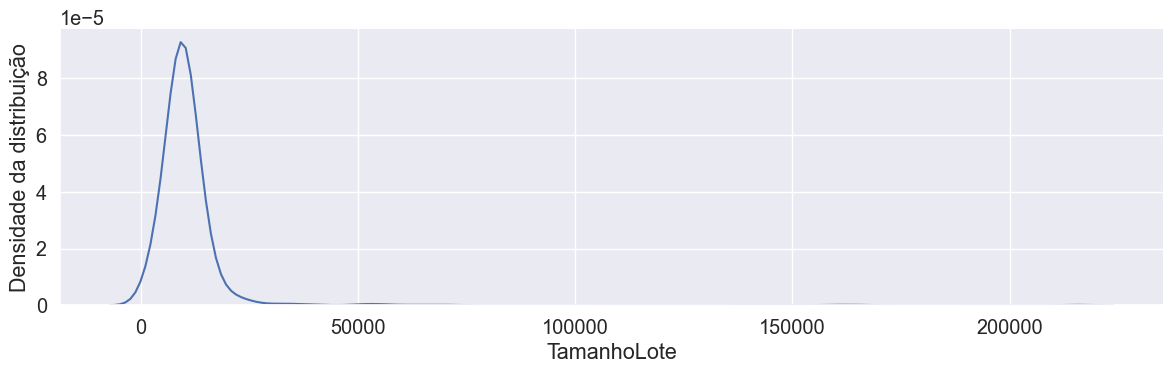

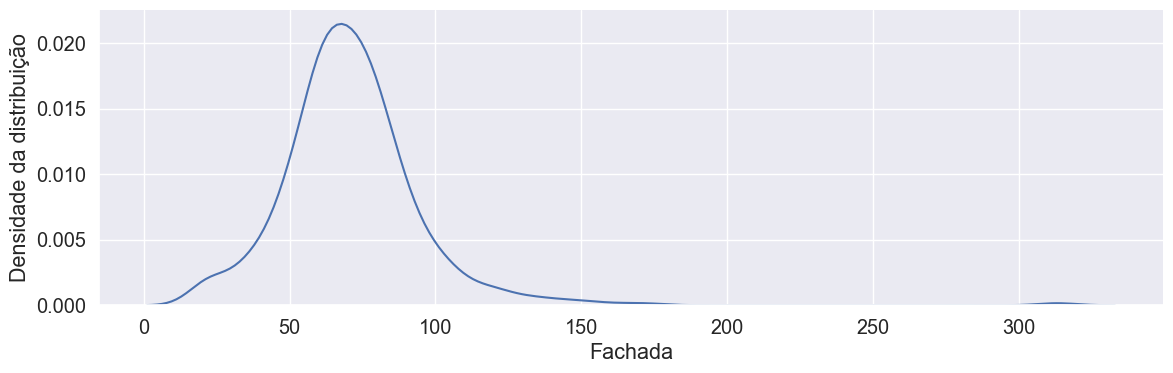

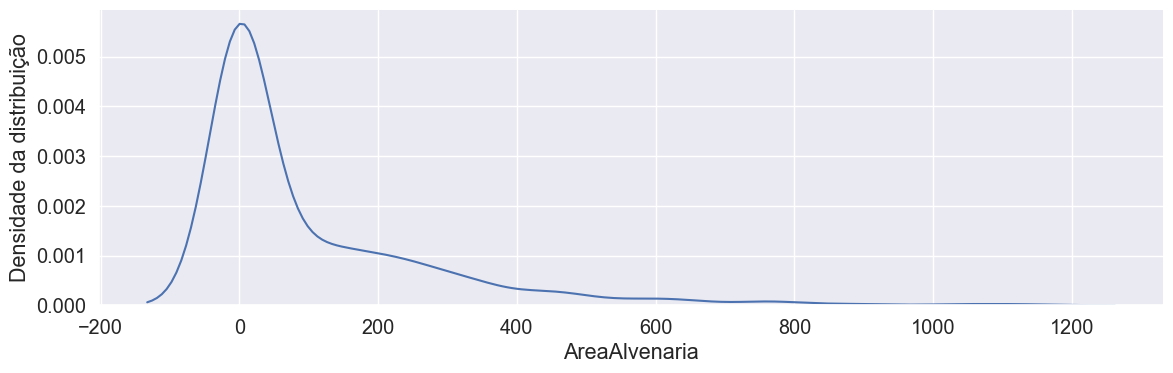

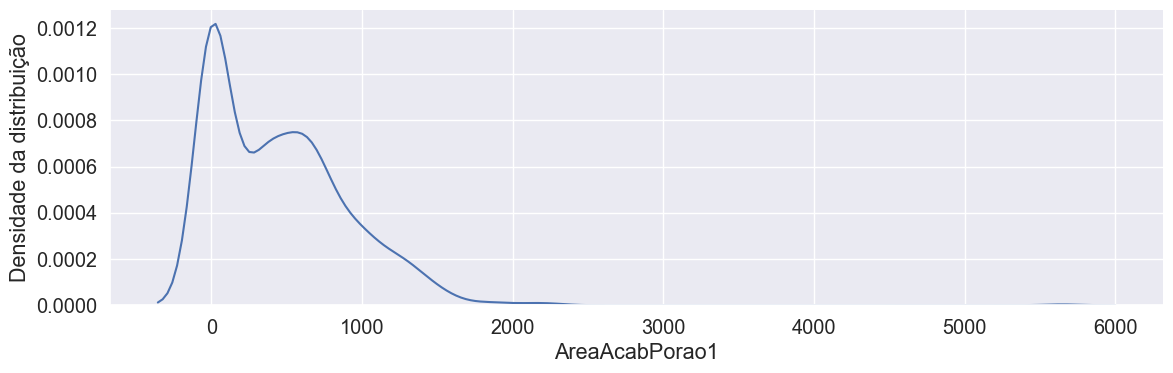

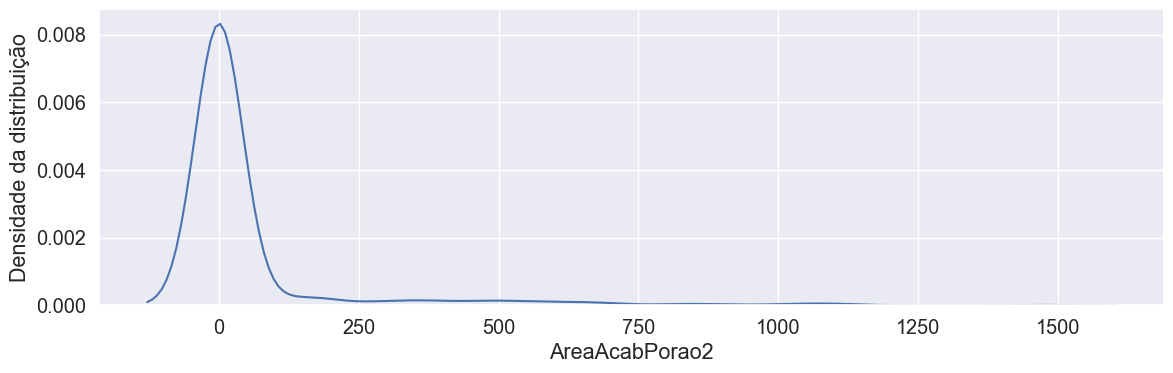

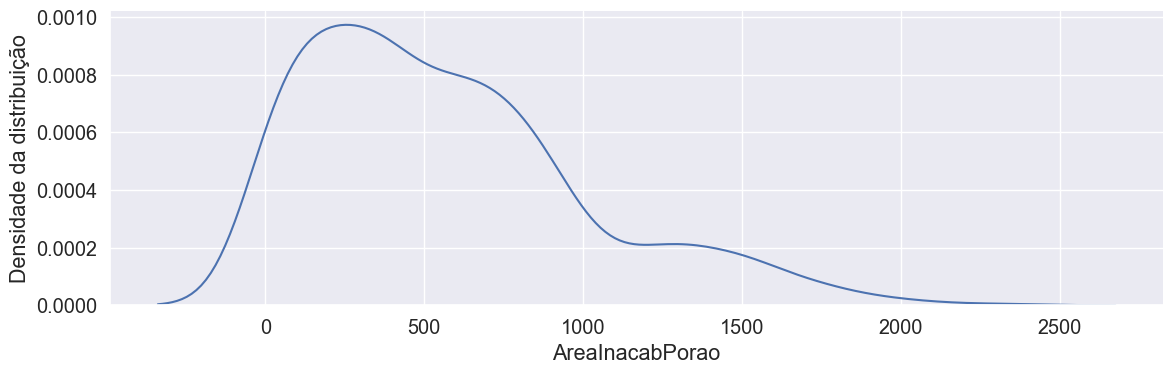

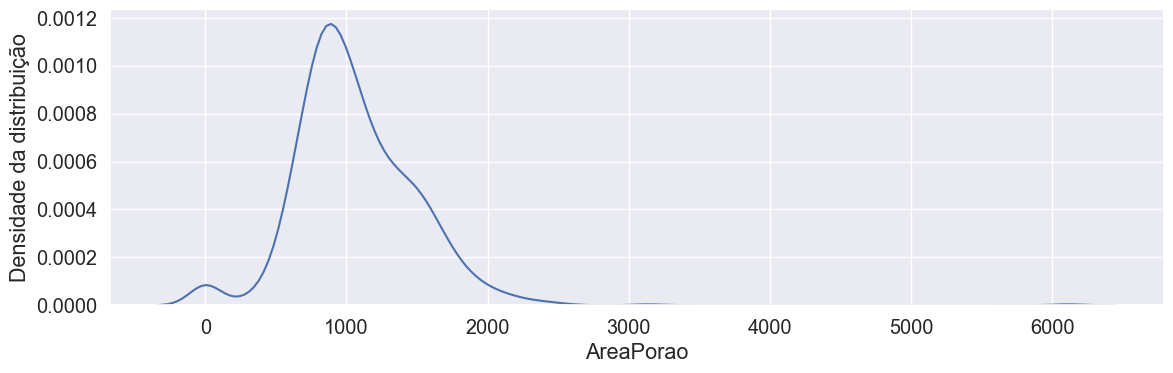

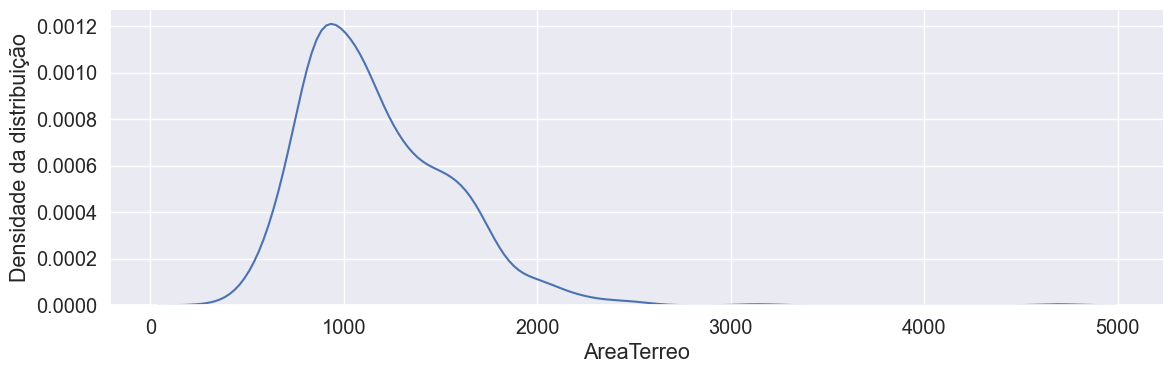

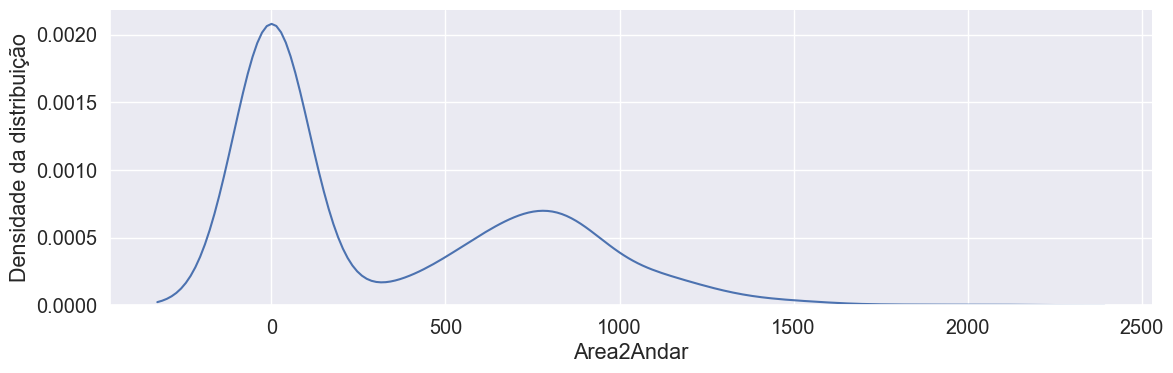

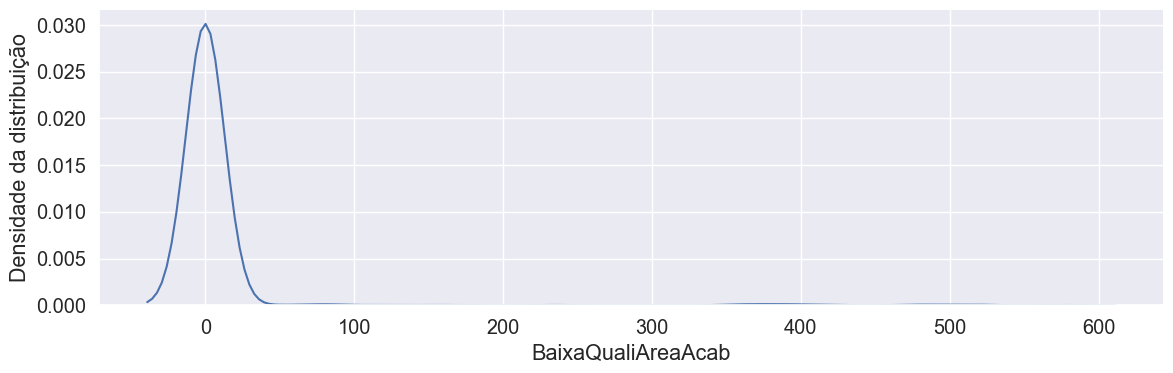

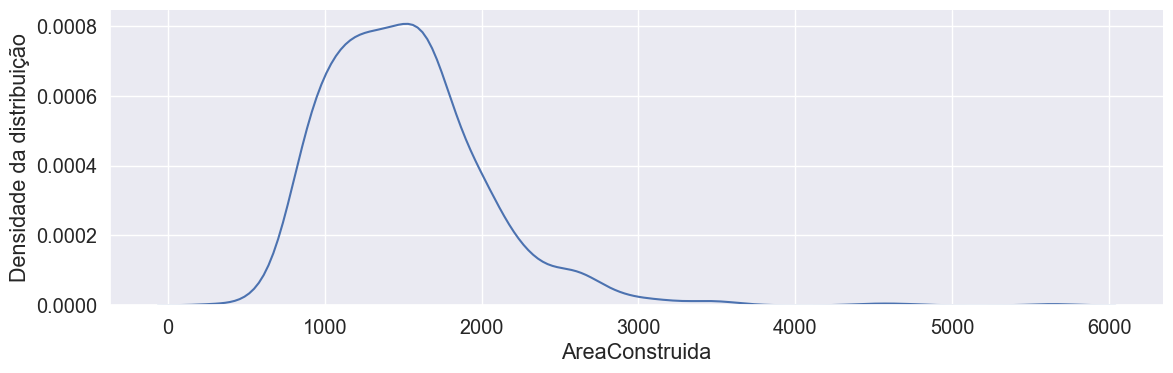

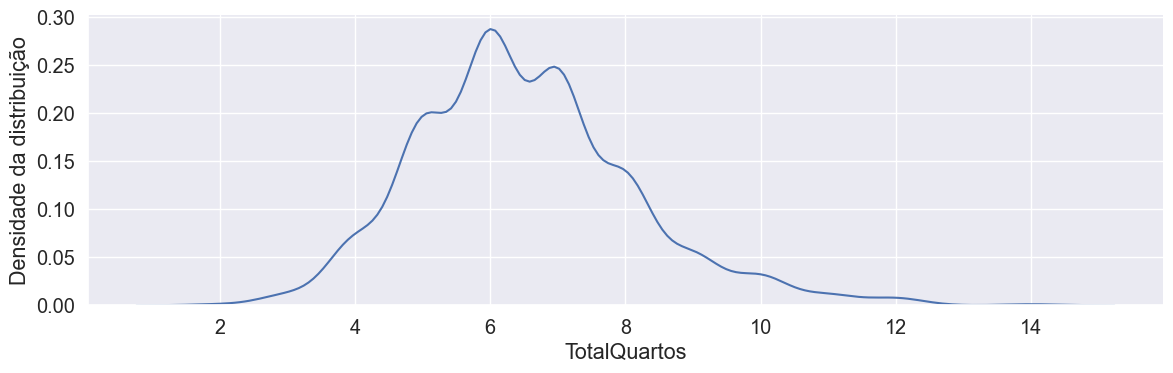

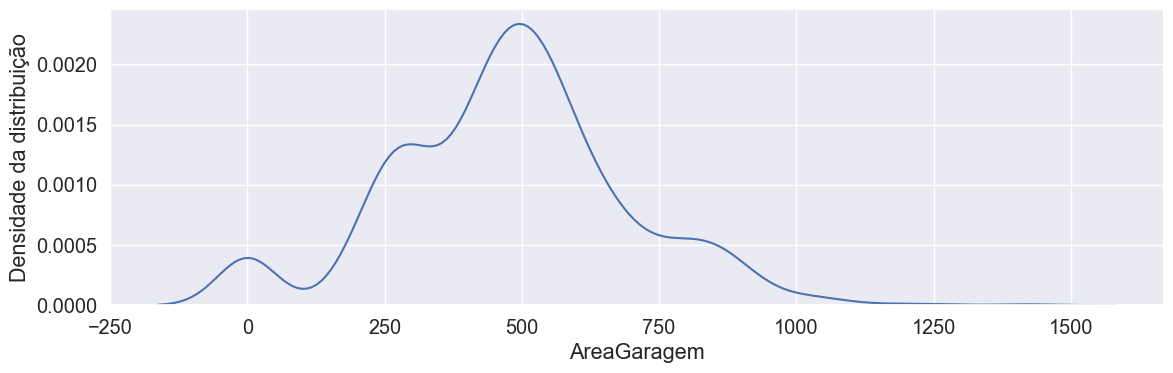

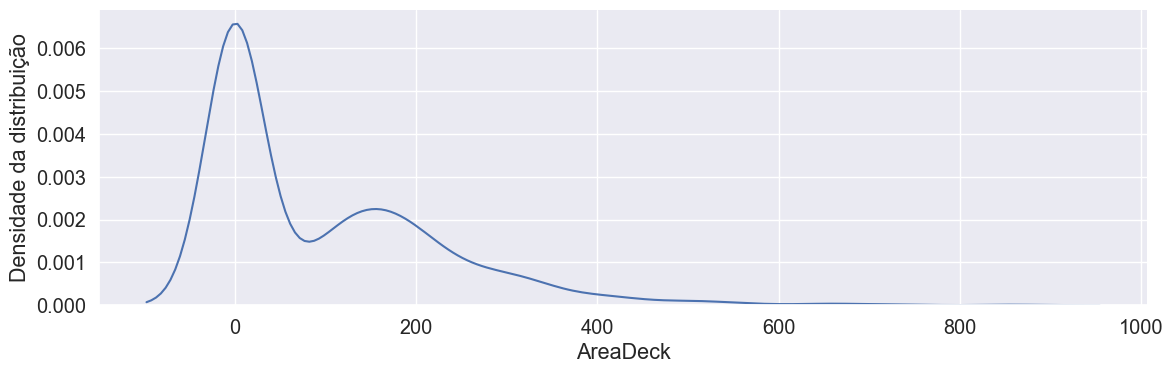

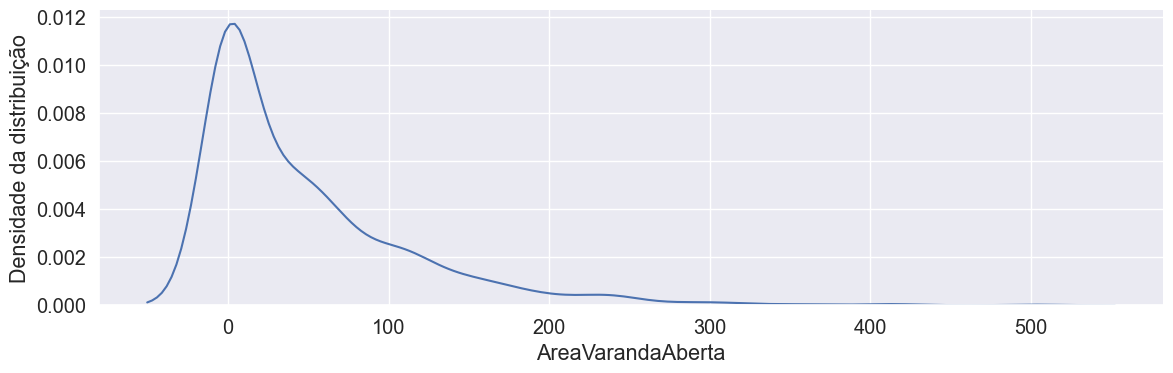

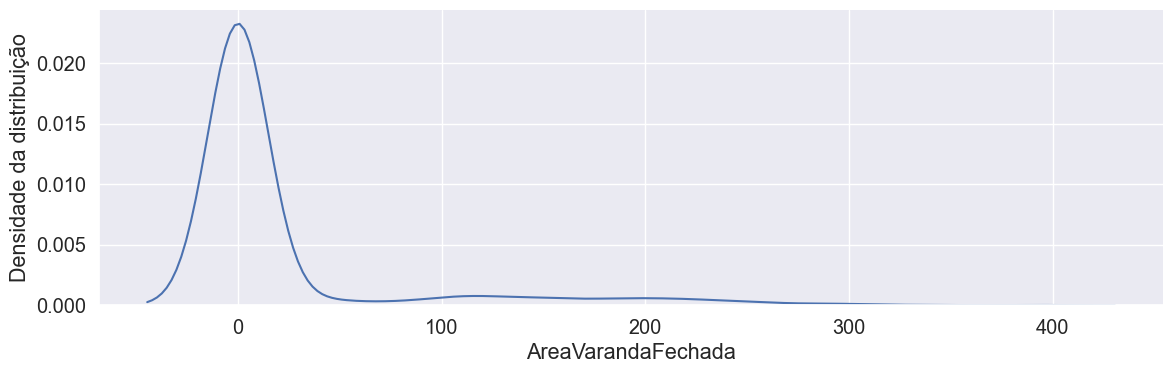

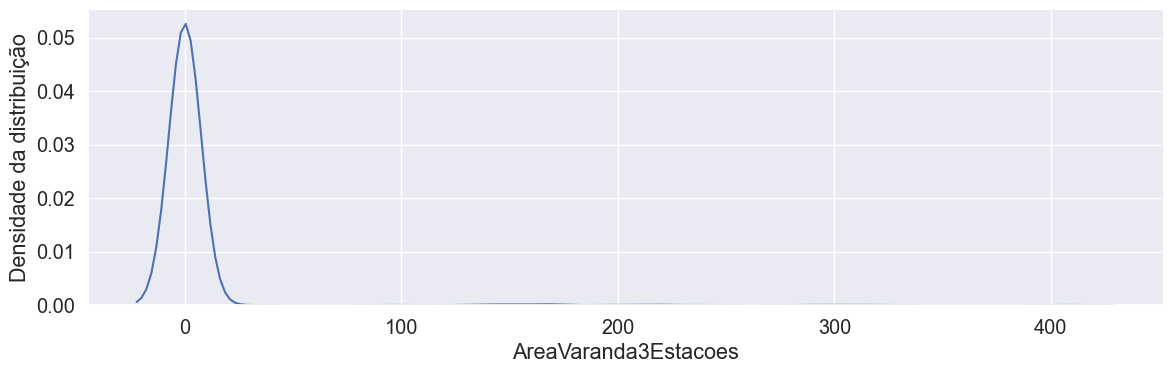

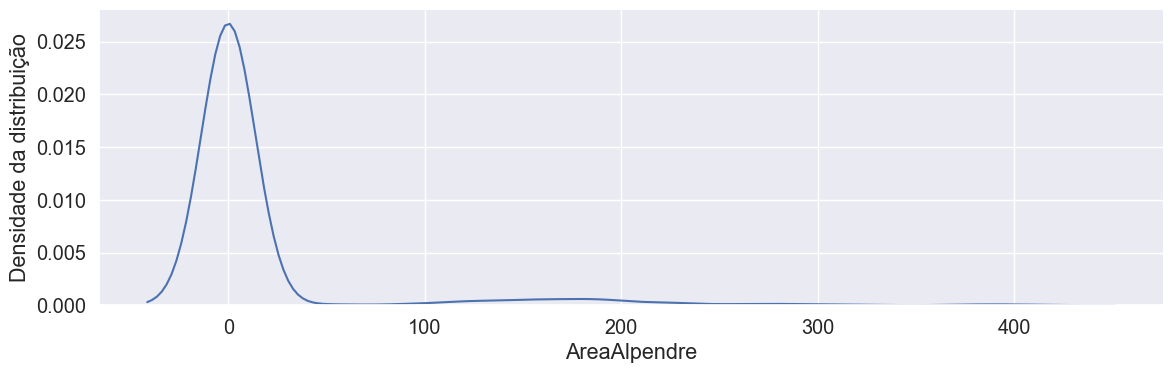

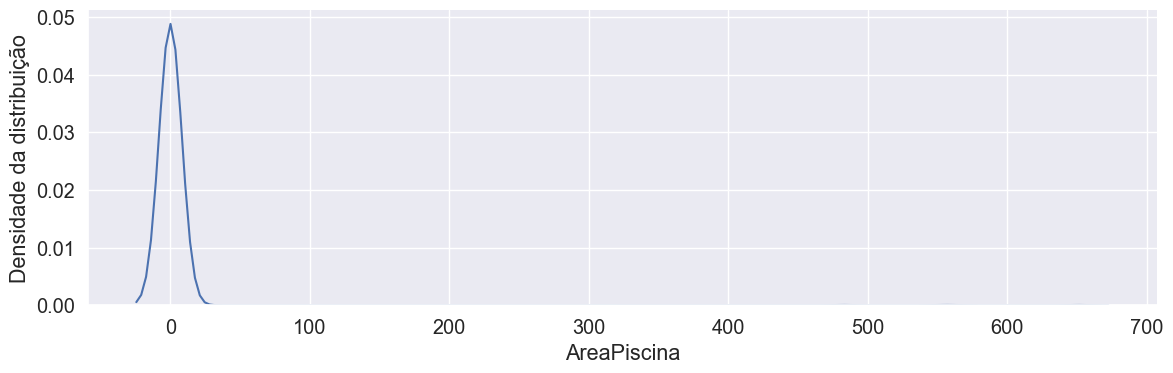

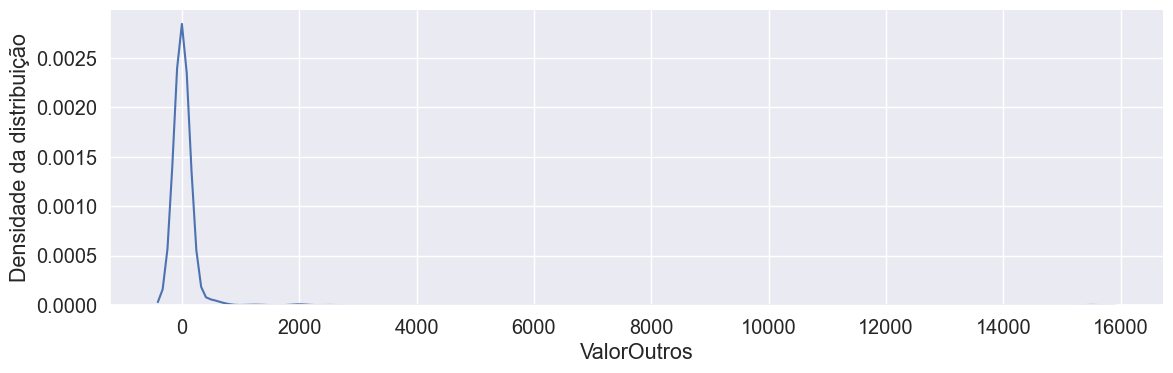

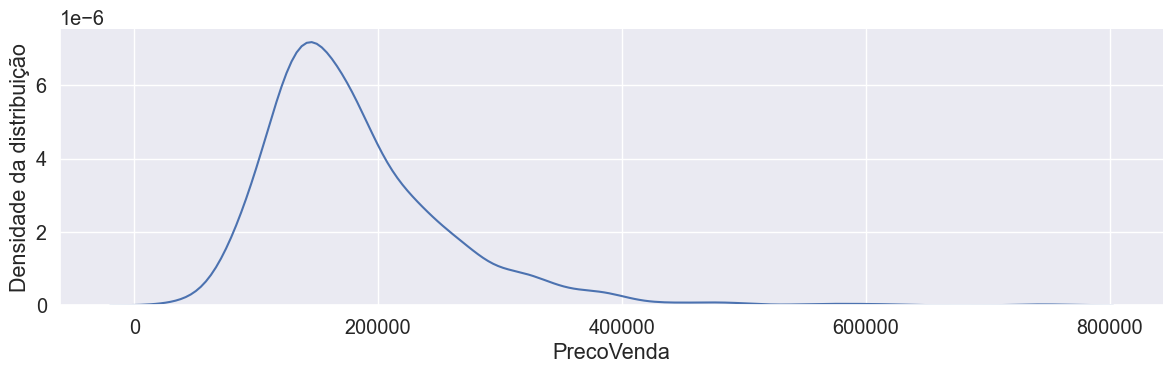

In [7]:
repeticoes = ['TamanhoLote', 'Fachada', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo'
, 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'TotalQuartos', 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 
'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina', 'ValorOutros', 'PrecoVenda']
for i in repeticoes:
    sns.set(font_scale = 1.3) # Para aumentar o tamanho da fonte
    coluna = i # Coluna a ser representada

# Instanciando o Displot. Só precisamos da coluna que queremos representar
    sns.displot(
        df_train[coluna], #Dados a serem representados. Selecionamos apenas a coluna de interesse
        height=4, # Altura em polegadas do gráfico
        aspect=3, # Proporção entre largura e altura do gráfico. Números > 1 representam retâgulos mais 'deitados'
        kind='kde' # Distribuição contínua,
)
    plt.ylabel('Densidade da distribuição')
    plt.show() # Para mostrar o gráfico


In [8]:
#Ordenando por tamanho de lote
df_train.sort_values('TamanhoLote')

index  ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco  \
559    1039           180         RM     21.0         1477  Pave  NaN   
980     614           180         RM     21.0         1491  Pave  NaN   
119     837           160         RM     21.0         1680  Pave  NaN   
880    1291           160         RM     21.0         1680  Pave  NaN   
297     430           160         RM     21.0         1680  Pave  NaN   
...     ...           ...        ...      ...          ...   ...  ...   
821    1298            60         RL    313.0        63887  Pave  NaN   
302     451            20         RL     62.0        70761  Pave  NaN   
950     249            50         RL      NaN       159000  Pave  NaN   
1015    335           190         RL      NaN       164660  Grvl  NaN   
1091    313            20         RL    150.0       215245  Pave  NaN   

     FormaProp PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1  \
559        Reg       Lvl   AllPub     Inside            Gtl  MeadowV     Norm   
980        Reg       Lvl   AllPub     Inside            Gtl  MeadowV     Norm   
119        Reg       Lvl   AllPub     Inside            Gtl   BrDale     Norm   
880        Reg       Lvl   AllPub     Inside            Gtl   BrDale     Norm   
297        Reg       Lvl   AllPub     Inside            Gtl   BrDale     Norm   
...        ...       ...      ...        ...            ...      ...      ...   
821        IR3       Bnk   AllPub     Corner            Gtl  Edwards    Feedr   
302        IR1       Low   AllPub     Inside            Mod  ClearCr     Norm   
950        IR2       Low   AllPub    CulDSac            Sev  ClearCr     Norm   
1015       IR1       HLS   AllPub     Corner            Sev   Timber     Norm   
1091       IR3       Low   AllPub     Inside            Sev   Timber     Norm   

     Estrada2 TipoHabitacao EstiloHabitacao  Qualidade  Condicao  \
559      Norm        TwnhsE          SFoyer          4         4   
980      Norm        TwnhsE          SFoyer          4         6   
119      Norm         Twnhs          2Story          6         5   
880      Norm         Twnhs          2Story          5         7   
297      Norm         Twnhs          2Story          6         5   
...       ...           ...             ...        ...       ...   
821      Norm          1Fam          2Story         10         5   
302      Norm          1Fam          1Story          7         5   
950      Norm          1Fam          1.5Fin          6         7   
1015     Norm        2fmCon          1.5Fin          5         6   
1091     Norm          1Fam          1Story          7         5   

      AnoConstrucao  AnoReforma TipoTelhado MaterialTelhado Exterior1  \
559            1970        1970       Gable         CompShg   CemntBd   
980            1972        1972       Gable         CompShg   CemntBd   
119            1973        1973       Gable         CompShg   HdBoard   
880            1972        1972       Gable         CompShg   CemntBd   
297            1971        1971       Gable         CompShg   HdBoard   
...             ...         ...         ...             ...       ...   
821            2008        2008         Hip         ClyTile    Stucco   
302            1975        1975       Gable         WdShngl   Plywood   
950            1958        2006       Gable         CompShg   Wd Sdng   
1015           1965        1965       Gable         CompShg   Plywood   
1091           1965        1965         Hip         CompShg   BrkFace   

     Exterior2 TipoAlvenaria  AreaAlvenaria QualidadeCobertura  \
559    CmentBd           NaN            0.0                 TA   
980    CmentBd           NaN            0.0                 TA   
119    HdBoard       BrkFace          158.0                 TA   
880    CmentBd       BrkFace          268.0                 TA   
297    HdBoard       BrkFace          232.0                 TA   
...        ...           ...            ...                ...   


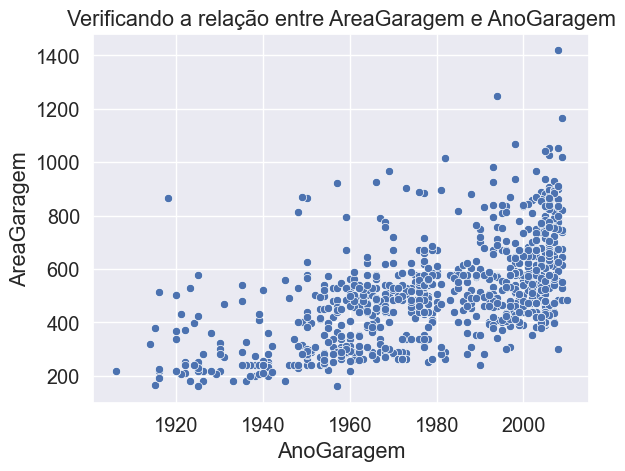

In [9]:
##Analisando o Ano de Garagem
sns.scatterplot(x = 'AnoGaragem', y = 'AreaGaragem', data = df_train)
plt.title('Verificando a relação entre AreaGaragem e AnoGaragem')
plt.xlabel('AnoGaragem')
plt.ylabel('AreaGaragem')
plt.show()

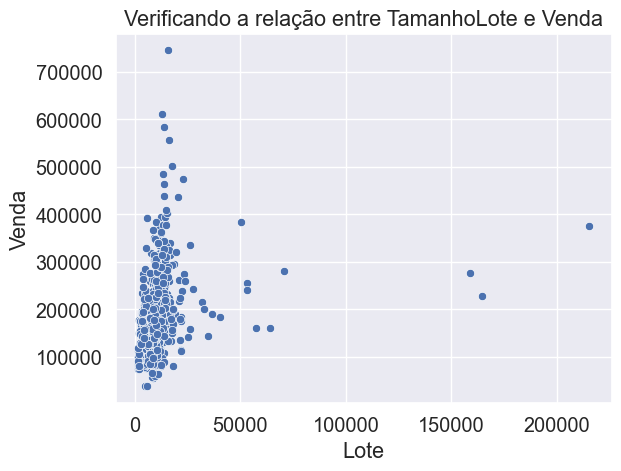

In [10]:
sns.scatterplot(x = 'TamanhoLote', y = 'PrecoVenda', data = df_train)
plt.title('Verificando a relação entre TamanhoLote e Venda')
plt.xlabel('Lote')
plt.ylabel('Venda')
plt.show()

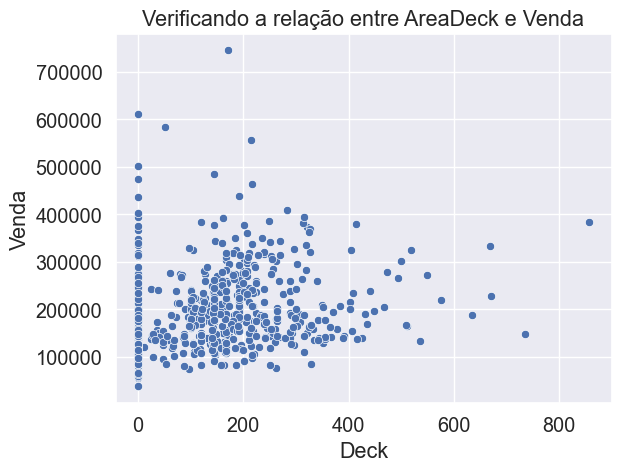

In [11]:
sns.scatterplot(x = 'AreaDeck', y = 'PrecoVenda', data = df_train)
plt.title('Verificando a relação entre AreaDeck e Venda')
plt.xlabel('Deck')
plt.ylabel('Venda')
plt.show()

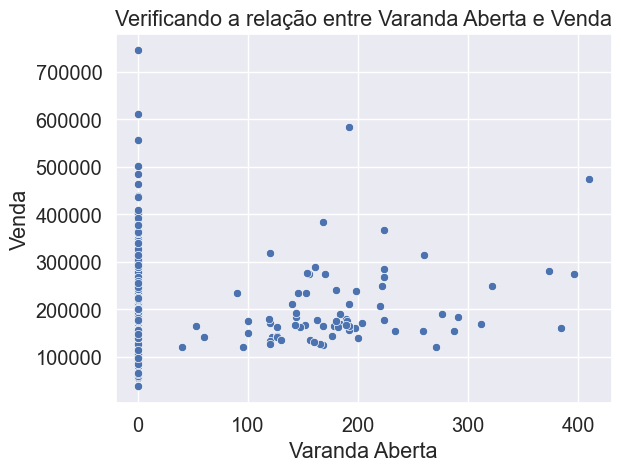

In [12]:
sns.scatterplot(x = 'AreaAlpendre', y = 'PrecoVenda', data = df_train)
plt.title('Verificando a relação entre Varanda Aberta e Venda')
plt.xlabel('Varanda Aberta')
plt.ylabel('Venda')
plt.show()

In [13]:
df_train.TamanhoLote.describe(percentiles = [0.25, 0.5, 0.75, 0.95])

count       934.000000
mean      10640.102784
std       11239.439798
min        1477.000000
25%        7731.000000
50%        9452.500000
75%       11522.500000
95%       17064.350000
max      215245.000000
Name: TamanhoLote, dtype: float64

<Axes: xlabel='TotalQuartos', ylabel='PrecoVenda'>

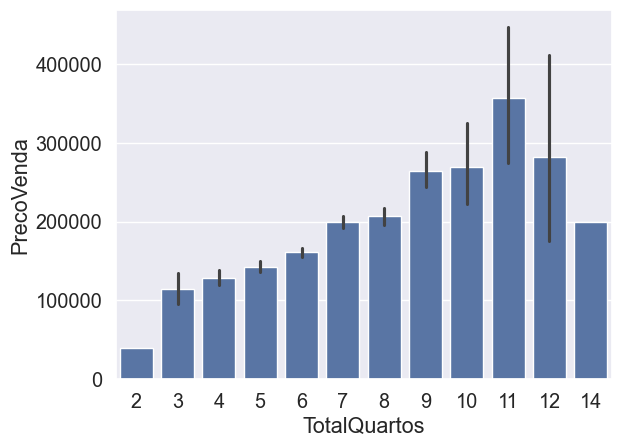

In [14]:
sns.barplot(x = 'TotalQuartos', y='PrecoVenda', data = df_train)

In [15]:
TotalQuartos = df_train['TotalQuartos']
TotalQuartos.describe(percentiles = [0.25, 0.5 , 0.75, 0.98])

count    934.00000
mean       6.51606
std        1.60961
min        2.00000
25%        5.00000
50%        6.00000
75%        7.00000
98%       10.00000
max       14.00000
Name: TotalQuartos, dtype: float64

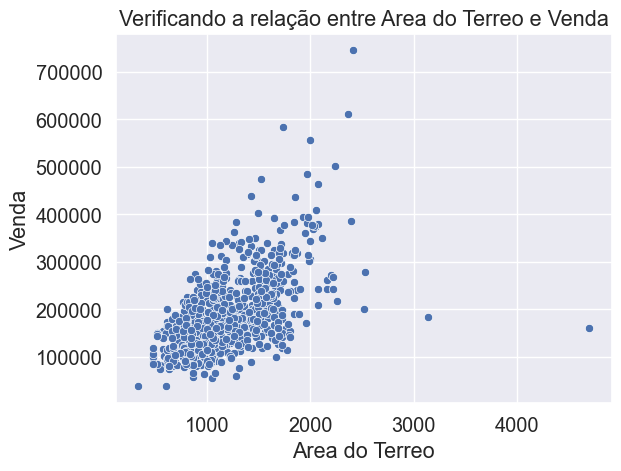

In [16]:
sns.scatterplot(x = 'AreaTerreo', y = 'PrecoVenda', data = df_train)
plt.title('Verificando a relação entre Area do Terreo e Venda')
plt.xlabel('Area do Terreo')
plt.ylabel('Venda')
plt.show()

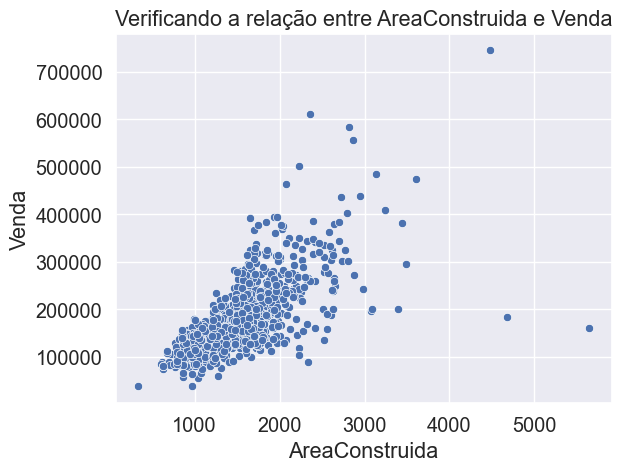

In [17]:
sns.scatterplot(x = 'AreaConstruida', y = 'PrecoVenda', data = df_train)
plt.title('Verificando a relação entre AreaConstruida e Venda')
plt.xlabel('AreaConstruida')
plt.ylabel('Venda')
plt.show()

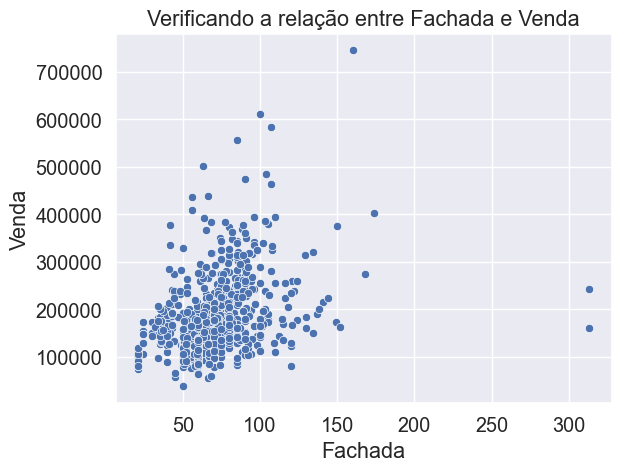

In [18]:
sns.scatterplot(x = 'Fachada', y = 'PrecoVenda', data = df_train)
plt.title('Verificando a relação entre Fachada e Venda')
plt.xlabel('Fachada')
plt.ylabel('Venda')
plt.show()

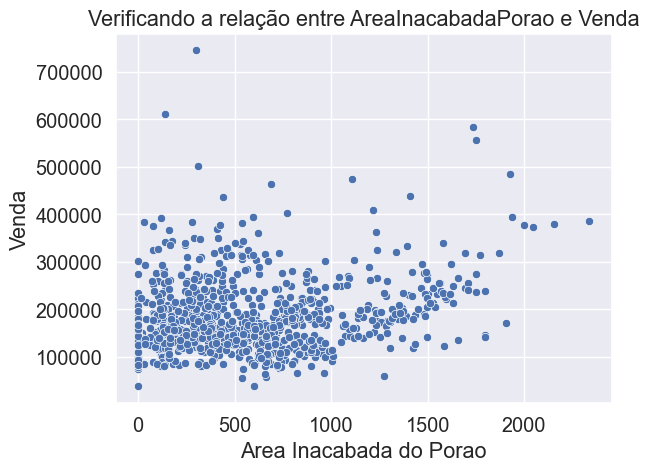

In [19]:
sns.scatterplot(x = 'AreaInacabPorao', y = 'PrecoVenda', data = df_train)
plt.title('Verificando a relação entre AreaInacabadaPorao e Venda')
plt.xlabel('Area Inacabada do Porao')
plt.ylabel('Venda')
plt.show()

## Verificando as correlações

In [20]:
df_train_corr = df_train[['ClasseImovel',	'Fachada',	'TamanhoLote',	'Qualidade',	'Condicao',	'AnoConstrucao',	'AnoReforma'	, 'AreaAlvenaria',	'AreaAcabPorao1',	'AreaAcabPorao2', 'AreaInacabPorao',	'AreaPorao',	'AreaTerreo',	'Area2Andar',	'BaixaQualiAreaAcab',	'AreaConstruida','BanheiroPorao','LavaboPorao'	,'Banheiro'	,'Lavabo'	,'BedroomAbvGr'	,'KitchenAbvGr'	,'TotalQuartos'	,'Lareira'	,'AnoGaragem'	,'CarrosGaragem'	,'AreaGaragem'	,'AreaDeck'	,'AreaVarandaAberta'	,'AreaVarandaFechada'	,'AreaVaranda3Estacoes',	'AreaAlpendre',	'AreaPiscina',	'ValorOutros',	'MesVenda'	,'AnoVenda'	,'PrecoVenda', ]].copy()

In [21]:
df_train_corr.corr()

ClasseImovel   Fachada  TamanhoLote  Qualidade  \
ClasseImovel              1.000000 -0.367592    -0.113389   0.042851   
Fachada                  -0.367592  1.000000     0.431469   0.241951   
TamanhoLote              -0.113389  0.431469     1.000000   0.082916   
Qualidade                 0.042851  0.241951     0.082916   1.000000   
Condicao                 -0.029505 -0.039892    -0.014431  -0.106443   
AnoConstrucao             0.013555  0.122562     0.004756   0.560883   
AnoReforma                0.032860  0.084348    -0.011142   0.534394   
AreaAlvenaria             0.005543  0.203104     0.082669   0.389662   
AreaAcabPorao1           -0.075137  0.261911     0.218166   0.208412   
AreaAcabPorao2           -0.065554  0.081615     0.113840  -0.066179   
AreaInacabPorao          -0.135690  0.106106    -0.012675   0.327051   
AreaPorao                -0.241578  0.408918     0.261981   0.525490   
AreaTerreo               -0.249536  0.491627     0.291769   0.468930   
Area2Andar                0.311193  0.065647     0.024381   0.290893   
BaixaQualiAreaAcab        0.074568  0.009440    -0.004472  -0.023809   
AreaConstruida            0.078328  0.424753     0.236786   0.586571   
BanheiroPorao             0.008168  0.112801     0.181403   0.109953   
LavaboPorao               0.004108 -0.010187     0.052515  -0.054242   
Banheiro                  0.120195  0.169701     0.100605   0.534082   
Lavabo                    0.201264  0.047724    -0.009244   0.266685   
BedroomAbvGr             -0.008192  0.245626     0.089247   0.085598   
KitchenAbvGr              0.271862 -0.014338    -0.014247  -0.177563   
TotalQuartos              0.030479  0.375546     0.172135   0.420723   
Lareira                  -0.043871  0.281652     0.281373   0.398954   
AnoGaragem                0.093397  0.065338    -0.029373   0.533400   
CarrosGaragem            -0.058103  0.273607     0.123662   0.596775   
AreaGaragem              -0.114980  0.347306     0.139155   0.567832   
AreaDeck                 -0.029828  0.108538     0.135422   0.230417   
AreaVarandaAberta         0.009939  0.189234     0.082343   0.344574   
AreaVarandaFechada       -0.006687 -0.042653    -0.038654  -0.142751   
AreaVaranda3Estacoes     -0.028507  0.063870     0.017650   0.045015   
AreaAlpendre              0.002961  0.049862     0.007159   0.077377   
AreaPiscina              -0.015835  0.251269     0.083445   0.097302   
ValorOutros              -0.035625 -0.000902     0.037641  -0.014917   
MesVenda                 -0.009934  0.026819     0.017623   0.095613   
AnoVenda                 -0.022422  0.026849    -0.011316   0.006586   
PrecoVenda               -0.073048  0.344014     0.230267   0.784100   

                      Condicao  AnoConstrucao  AnoReforma  AreaAlvenaria  \
ClasseImovel         -0.029505       0.013555    0.032860       0.005543   
Fachada              -0.039892       0.122562    0.084348       0.203104   
TamanhoLote          -0.014431       0.004756   -0.011142       0.082669   
Qualidade            -0.106443       0.560883    0.534394       0.389662   
Condicao              1.000000      -0.443712    0.067264      -0.132426   
AnoConstrucao        -0.443712       1.000000    0.563723       0.290104   
AnoReforma            0.067264       0.563723    1.000000       0.140239   
AreaAlvenaria        -0.132426       0.290104    0.140239       1.000000   
AreaAcabPorao1       -0.070788       0.217031    0.091271       0.257006   
AreaAcabPorao2        0.053389      -0.059716   -0.078204      -0.071872   
AreaInacabPorao      -0.140180       0.180704    0.207868       0.148859   
AreaPorao            -0.196014       0.389476    0.276512       0.395675   
AreaTerreo           -0.164552       0.273541    0.223294       0.381112   
Area2Andar            0.075635       0.009248    0.163810       0.126522   
BaixaQualiAreaAcab    0.071867      -0.193874   -0.054527      -0.074280   
AreaConstruida       -0.053014       0.192183    0.295946       0.378

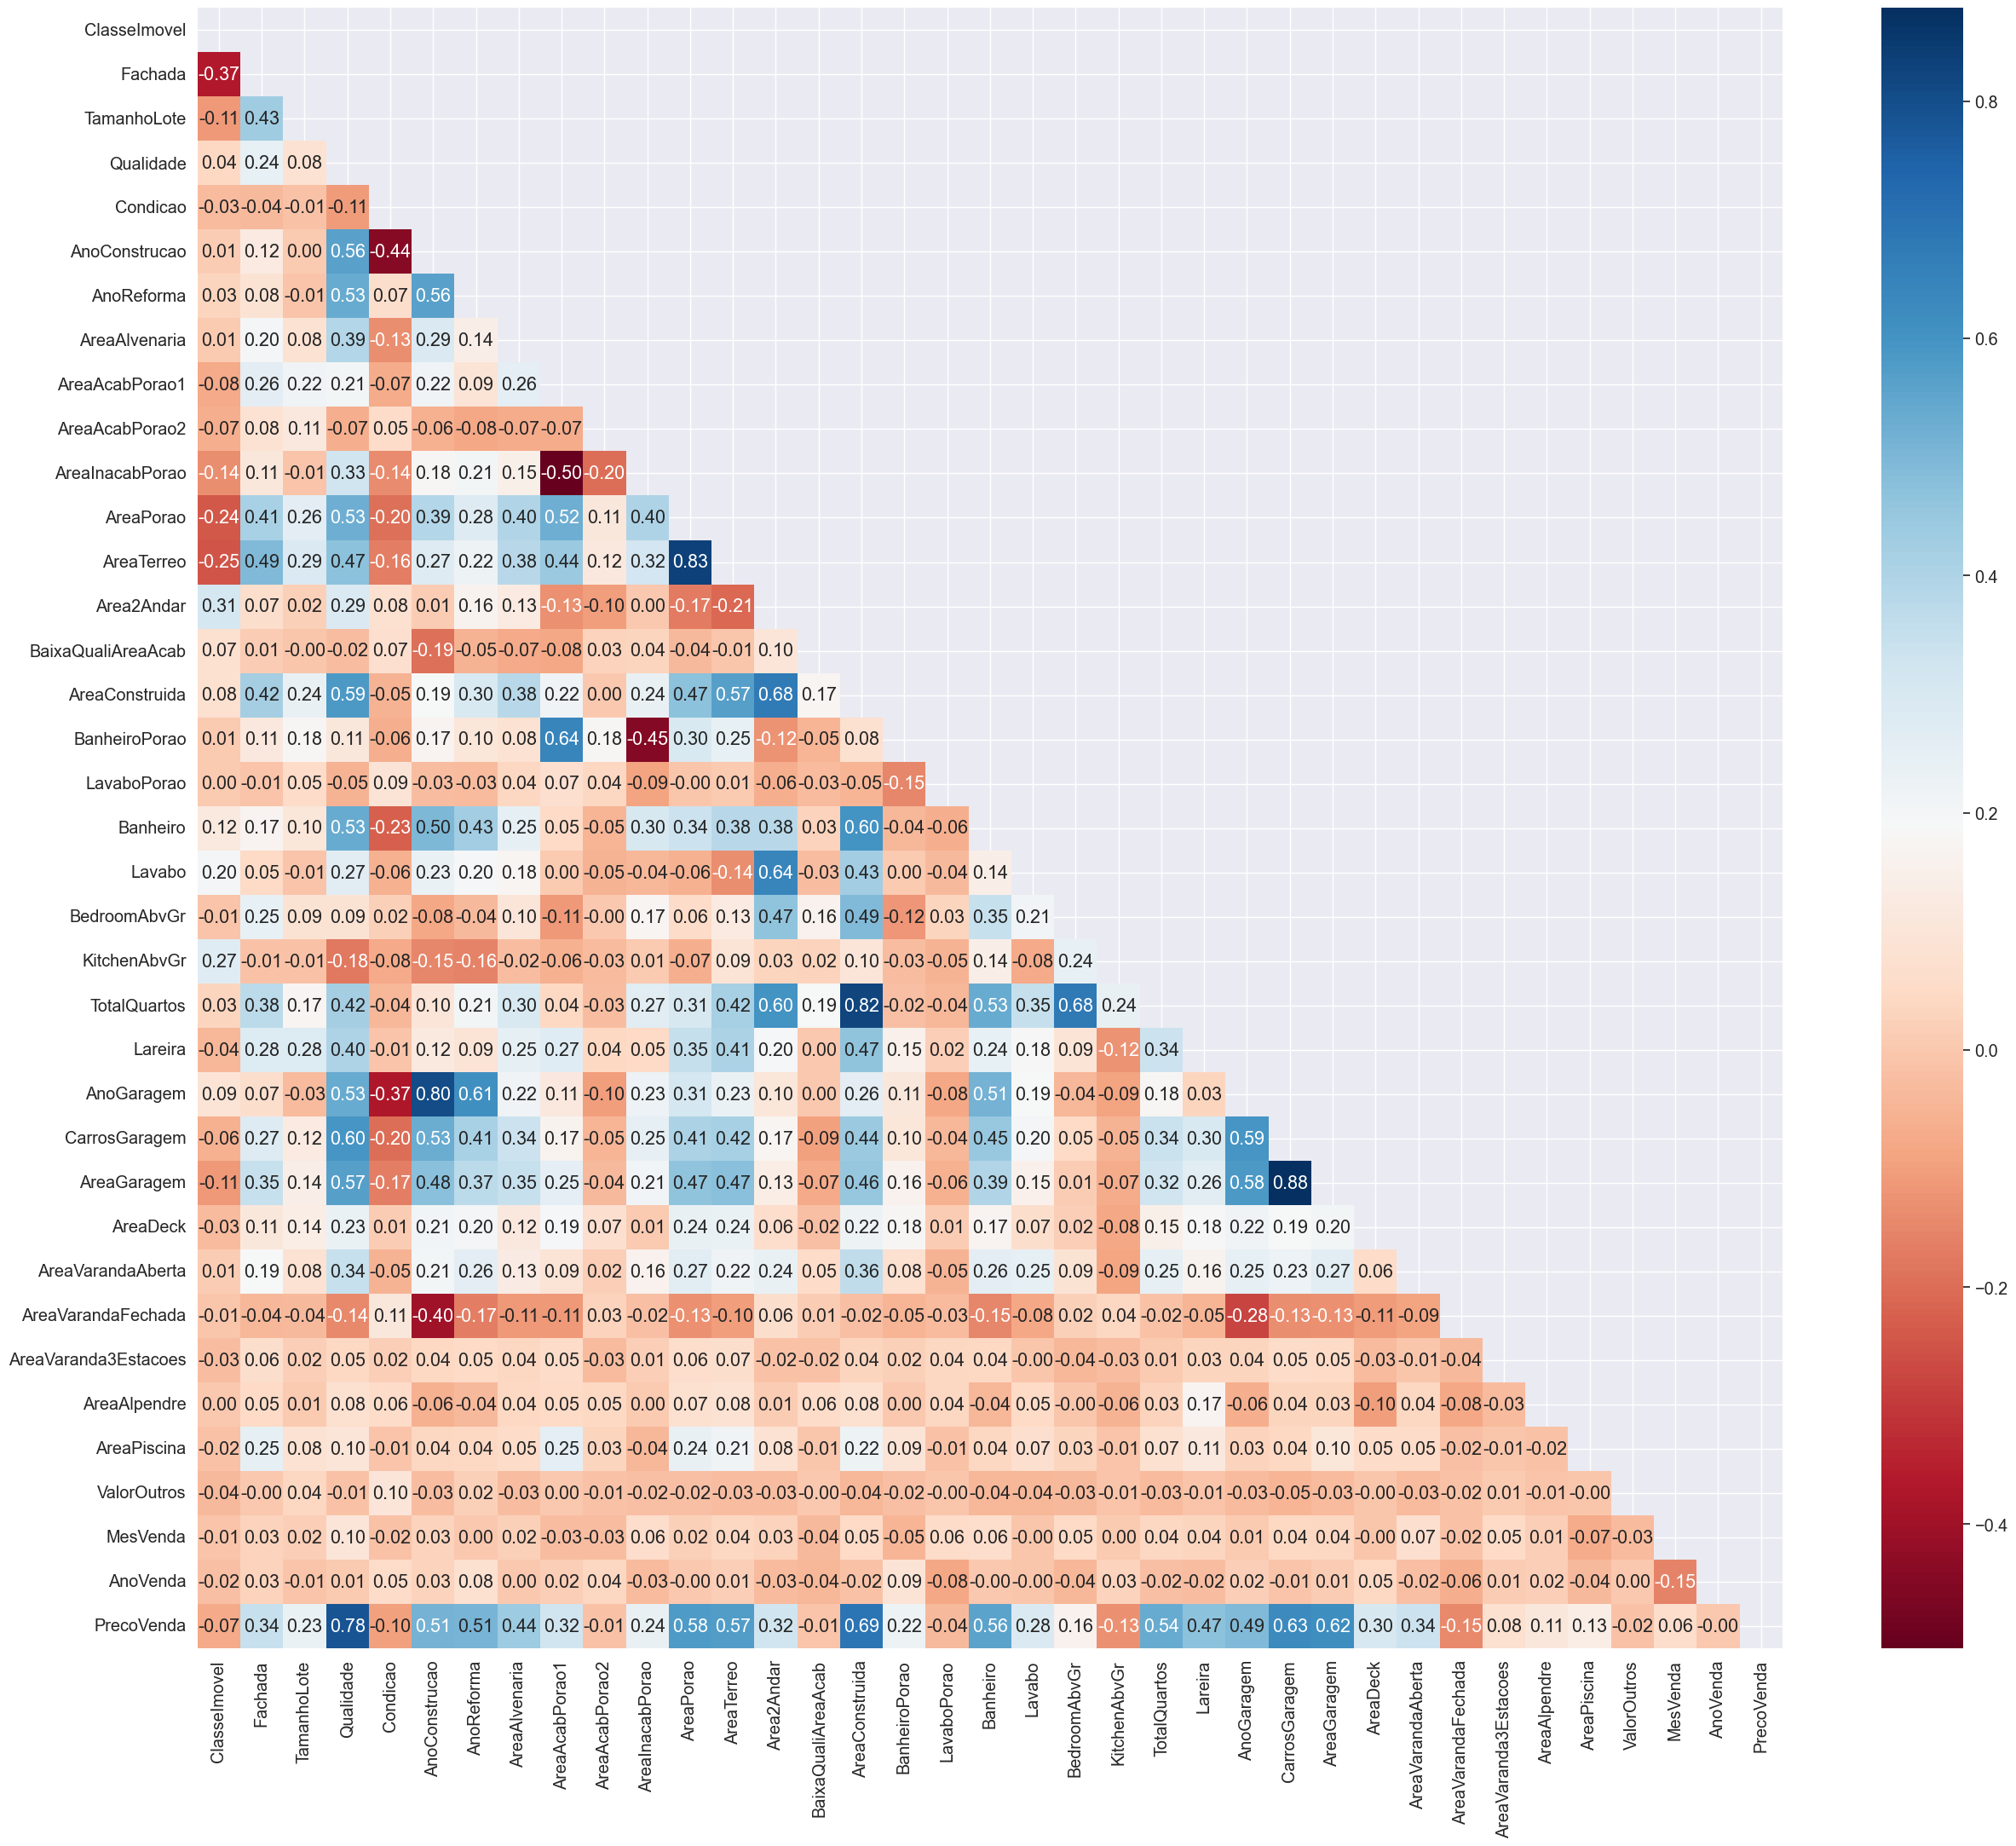

In [22]:
sns.set_context(font_scale=3.3)
plt.figure(figsize=(30,25))
sns.heatmap(
    df_train_corr.corr(), #Fonte dos dados, nossa matriz de correlação
    annot=True, #Anotar os valores das correlações nas caixinhas coloridas
    fmt='.2f', # Formato float de 2 dígitos, para arredondar os números
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(df_train_corr.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()

### Observações:
##### Há outliers em quase todas as variaveis numéricas, exemplo disso é o TamanhoLote. Possívelmente, a melhor opção para  o TamanhoLote seja excluir as 3 outliers que vão afetar negativamente a regressãoLinear. Além disso, PreçoVenda tem uma alta correlação com Qualidade, AnoConstrucao, AnoReforma, AreaAlvenaria, AreaPorao, AreaTerreo, AreaCostruida Banheiro, TotalQuartos, Lareira, AnoGaragem e CarrosGaragem. 
##### Portanto, a atenção inicial de modificar as outliers, caso contenham, vai ser para essas variaveis

## Variaveis Categoricas

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 591 to 1126
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 934 non-null    int64  
 1   ClasseImovel          934 non-null    int64  
 2   ClasseZona            934 non-null    object 
 3   Fachada               774 non-null    float64
 4   TamanhoLote           934 non-null    int64  
 5   Rua                   934 non-null    object 
 6   Beco                  61 non-null     object 
 7   FormaProp             934 non-null    object 
 8   PlanoProp             934 non-null    object 
 9   Servicos              934 non-null    object 
 10  ConfigLote            934 non-null    object 
 11  InclinacaoLote        934 non-null    object 
 12  Bairro                934 non-null    object 
 13  Estrada1              934 non-null    object 
 14  Estrada2              934 non-null    object 
 15  TipoHabitacao         934

In [24]:
##Vamos fazer boxsplots para as variaveis categoricas em relação ao preço de venda
auxiliar = df_train.select_dtypes(include='object').copy()


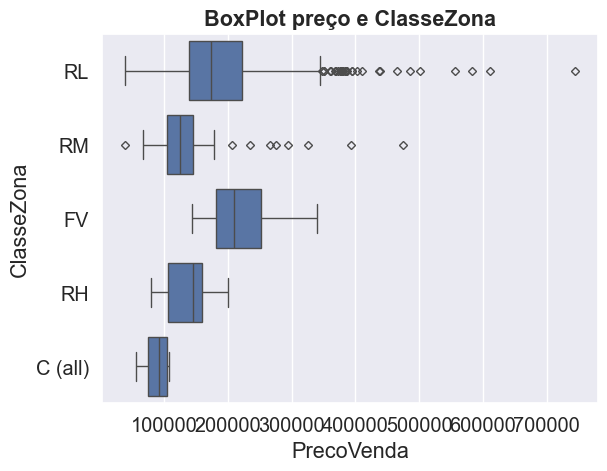

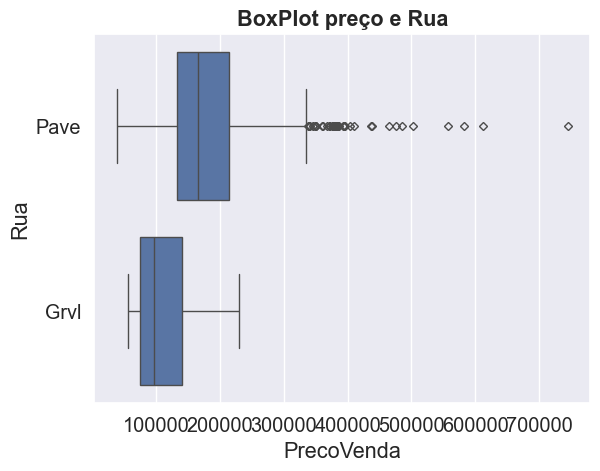

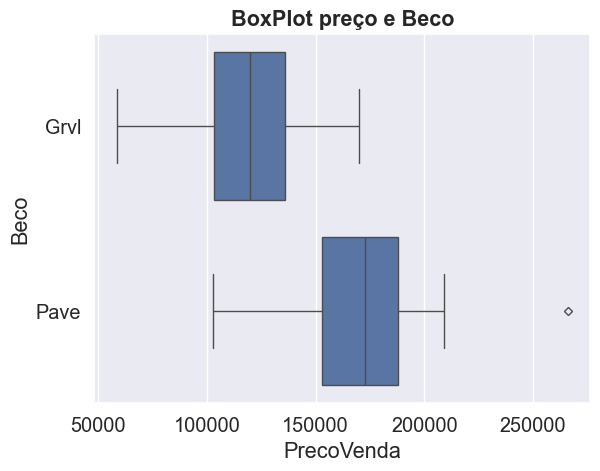

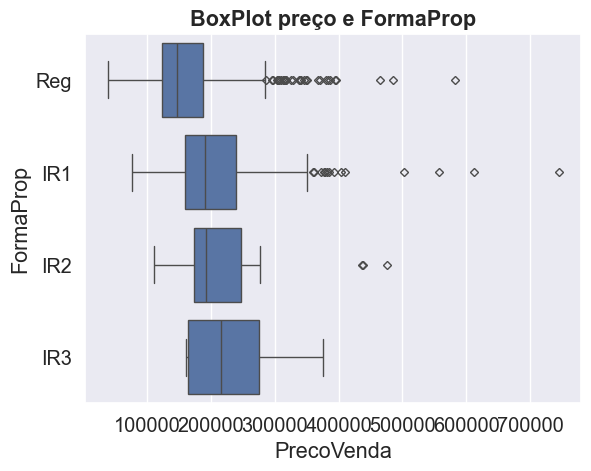

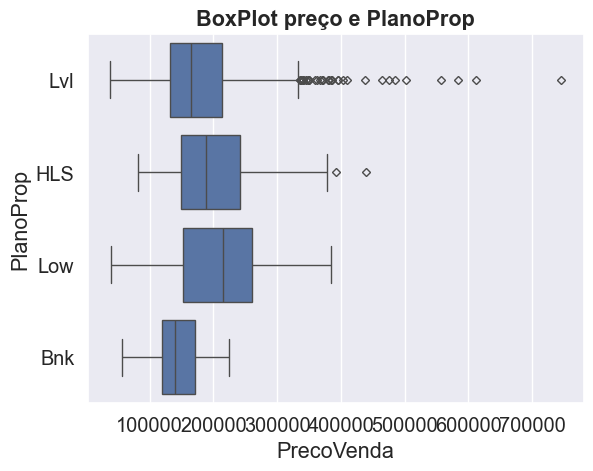

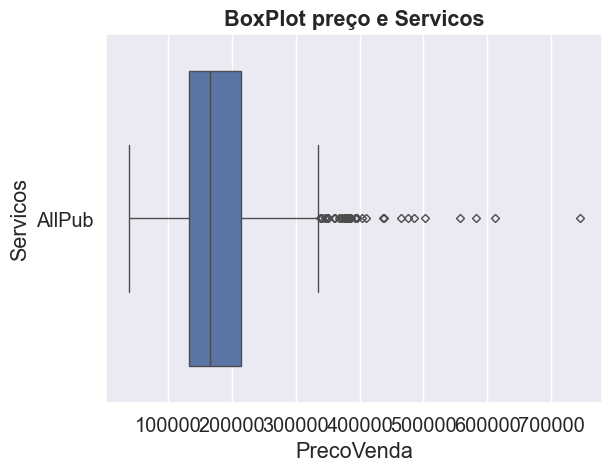

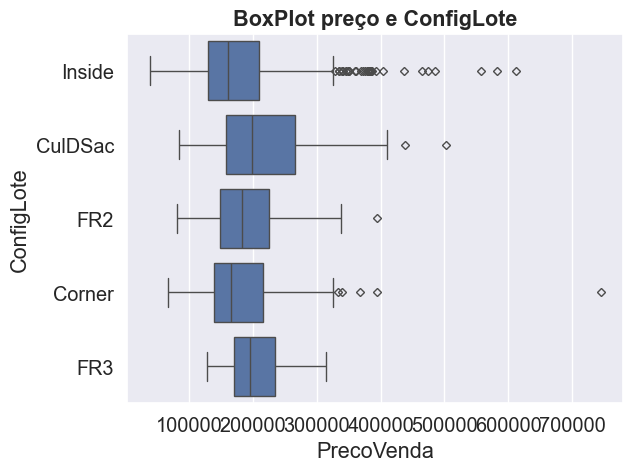

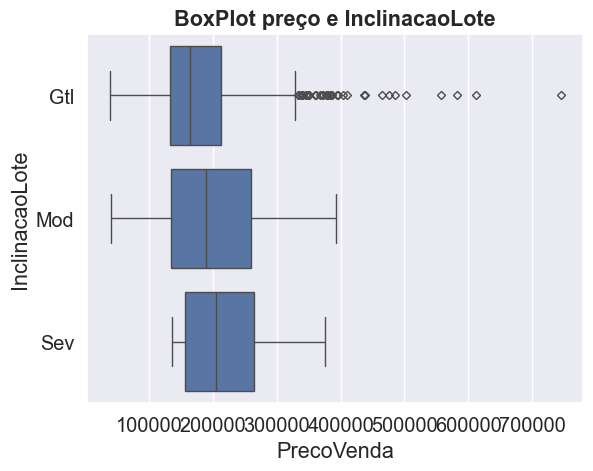

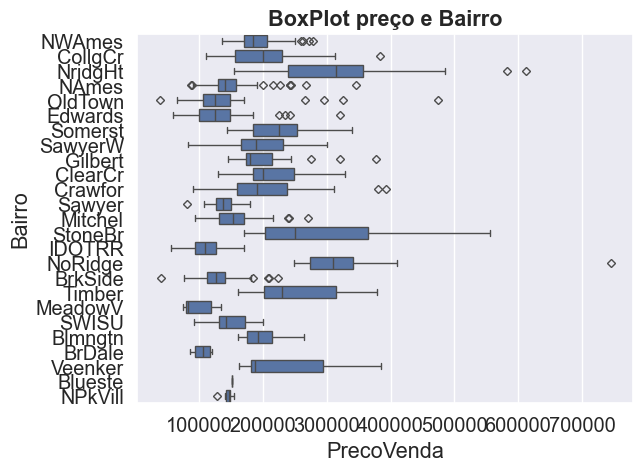

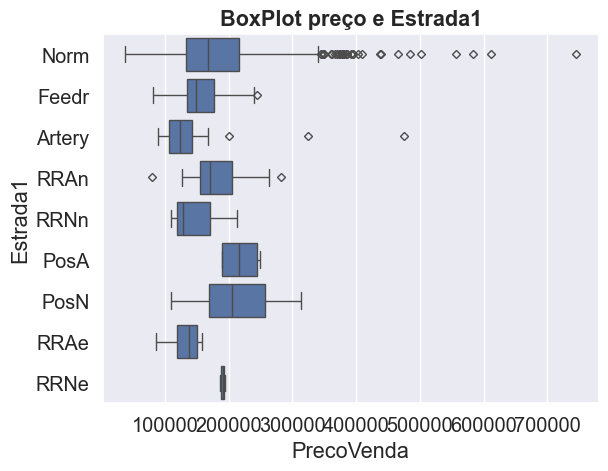

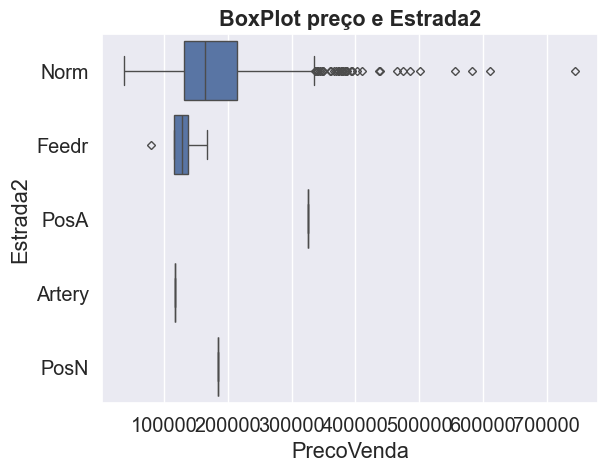

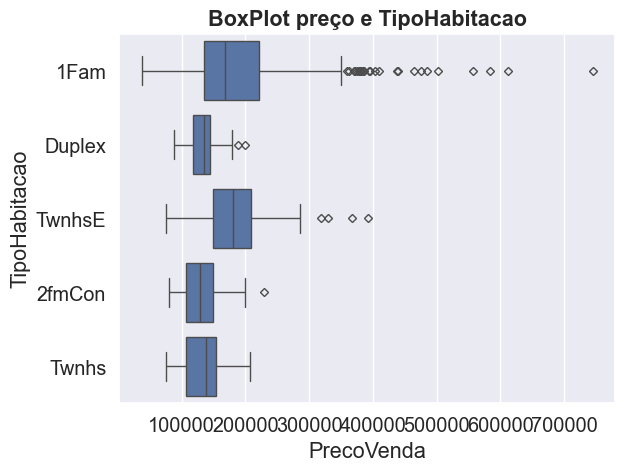

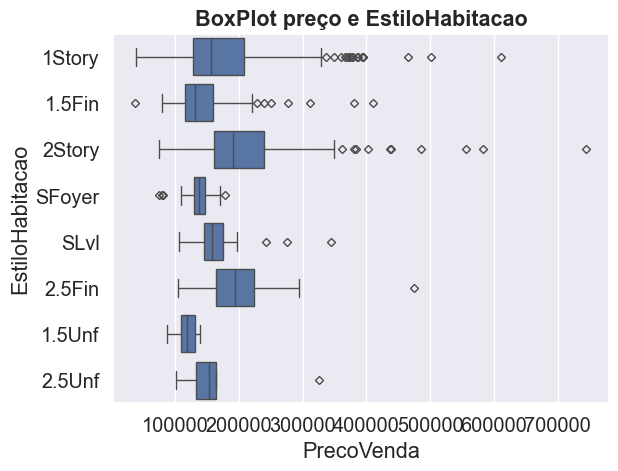

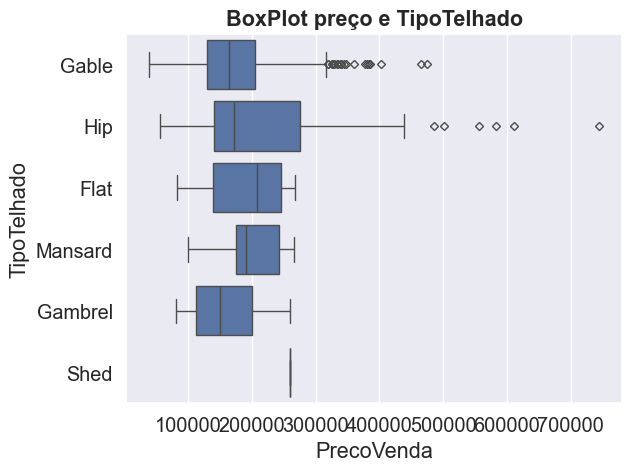

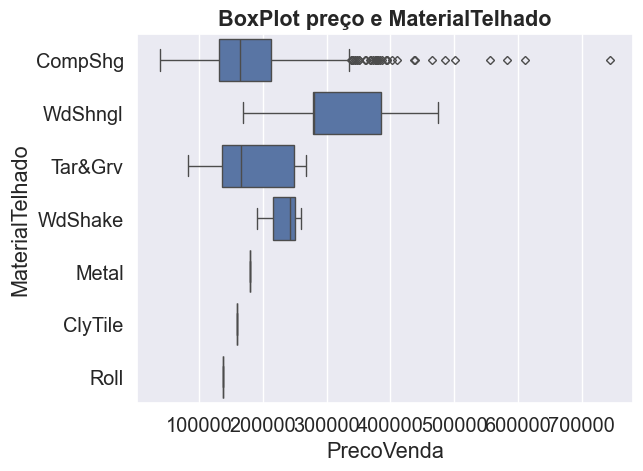

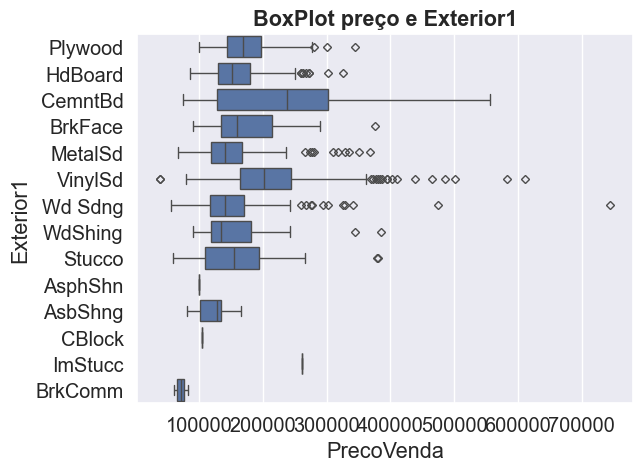

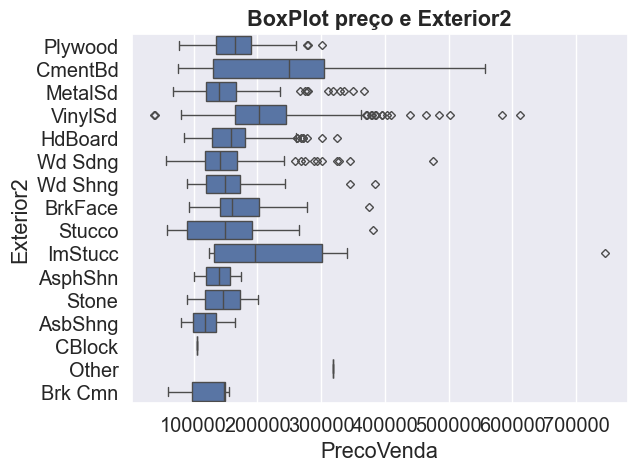

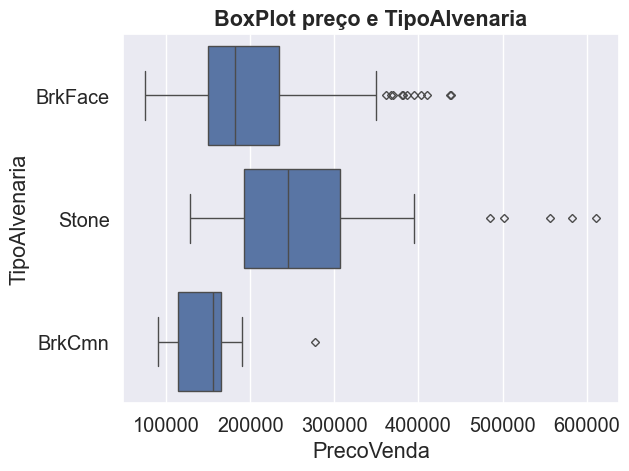

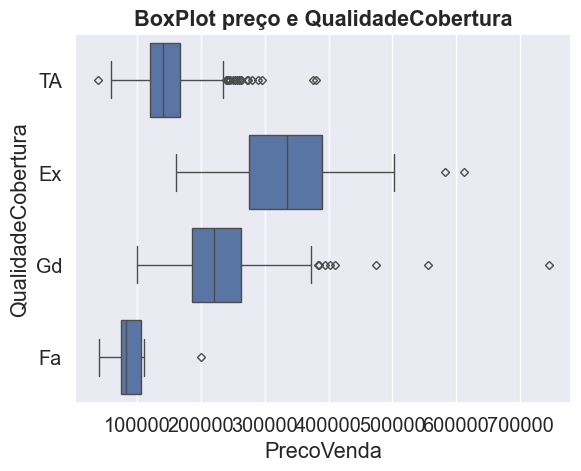

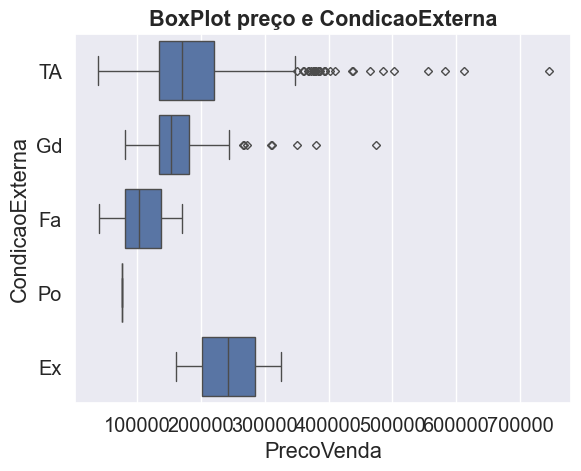

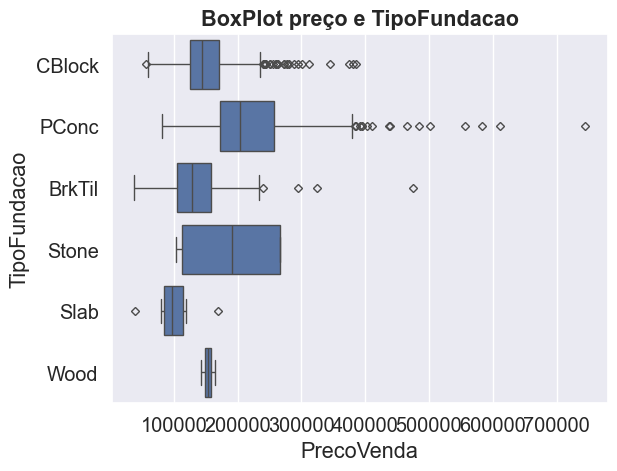

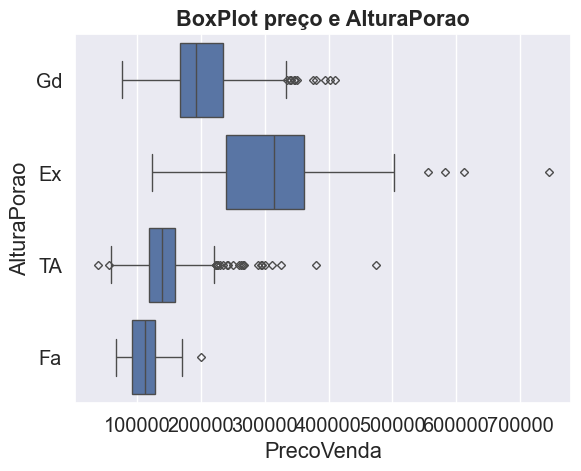

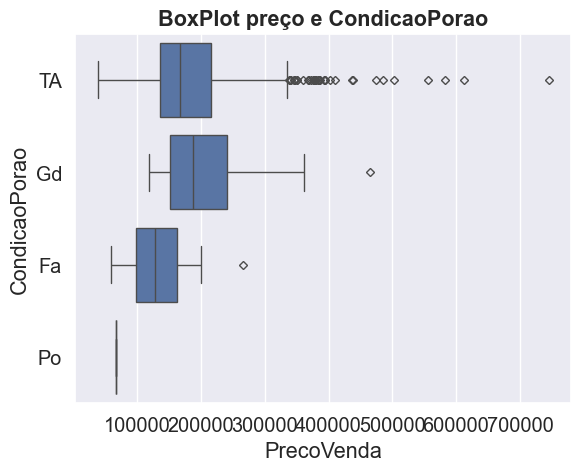

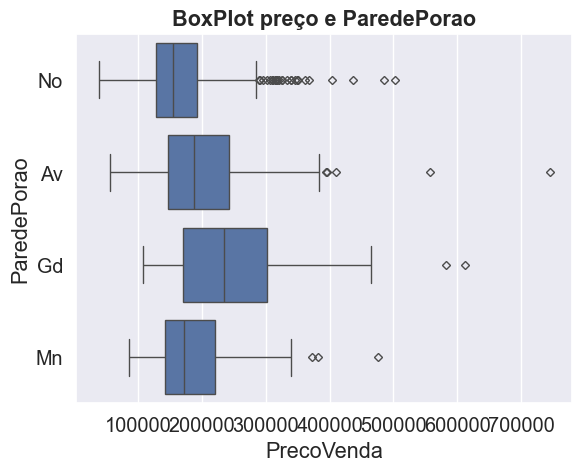

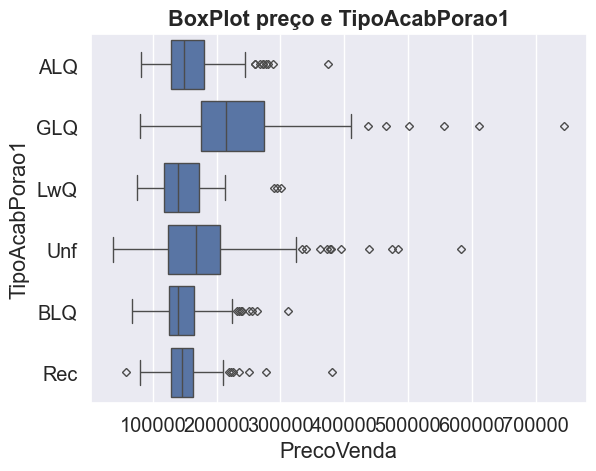

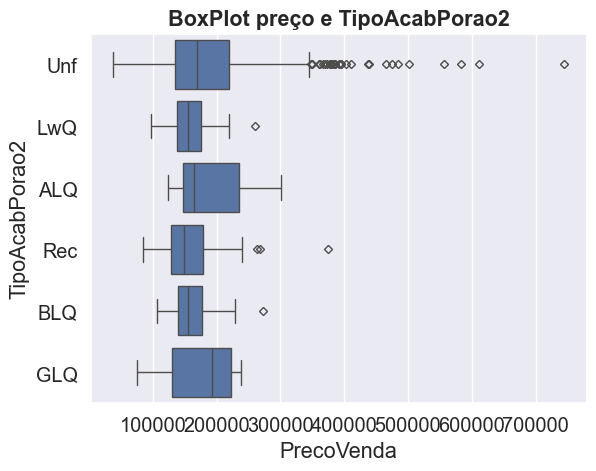

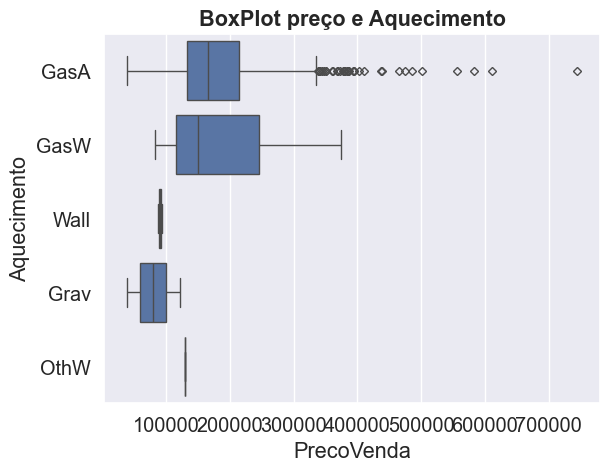

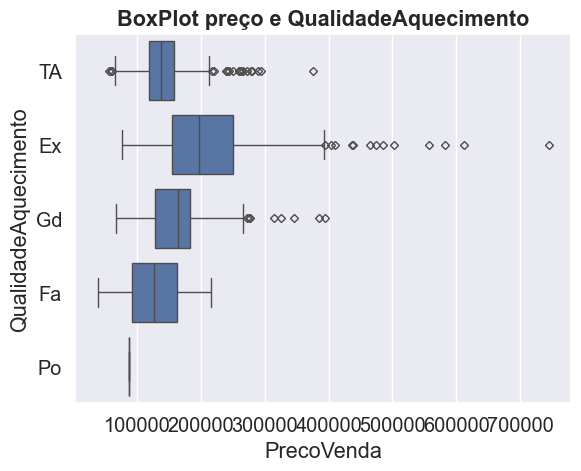

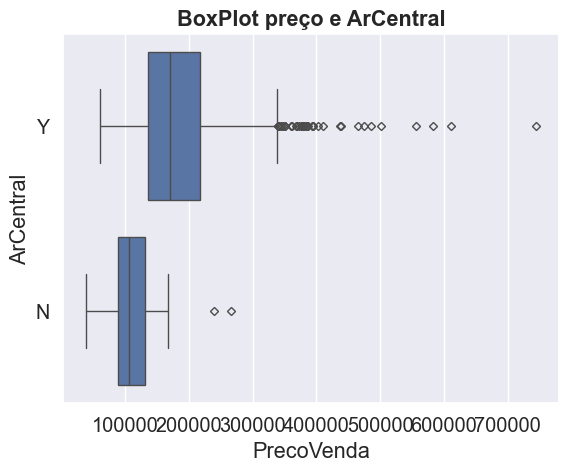

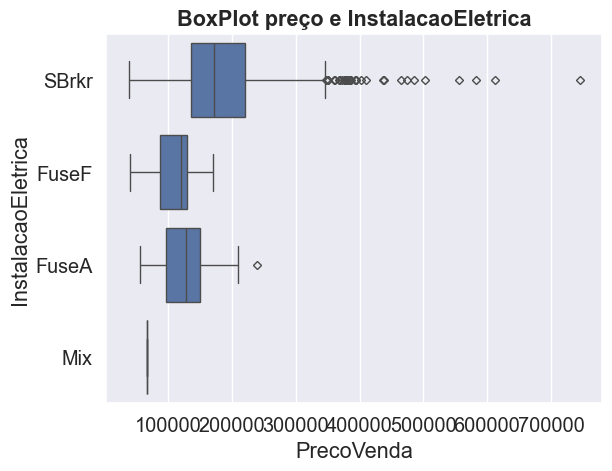

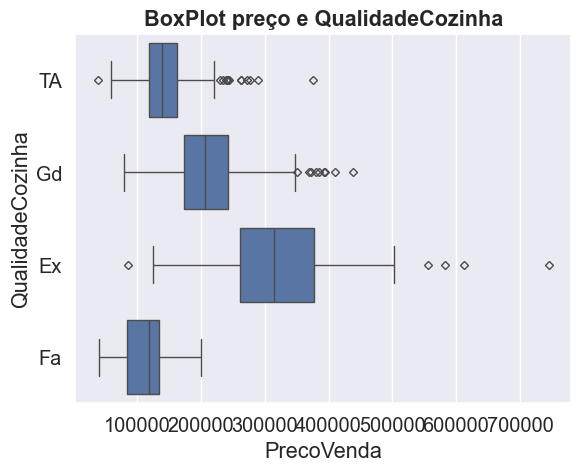

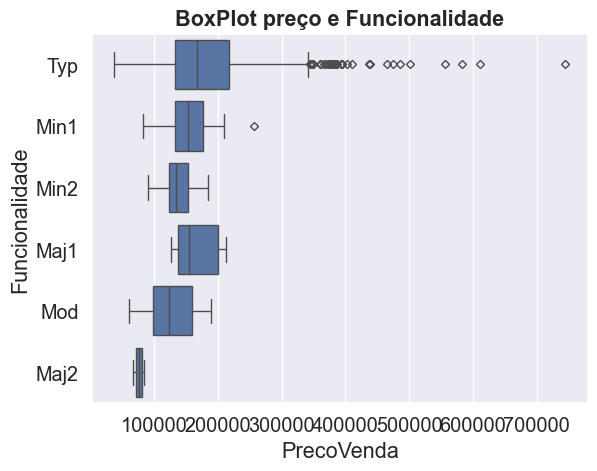

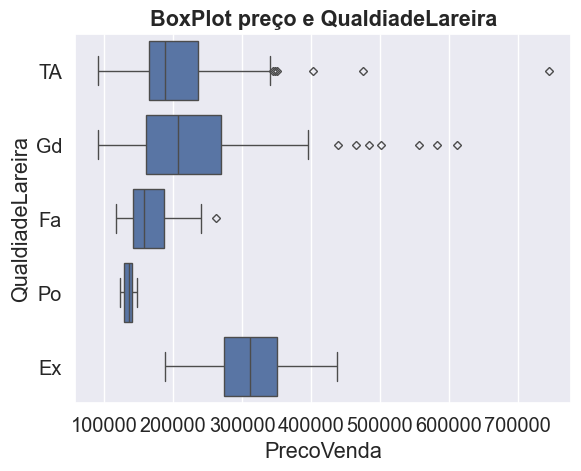

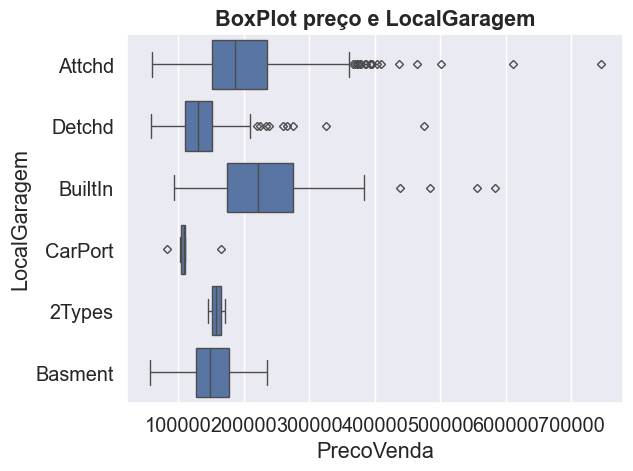

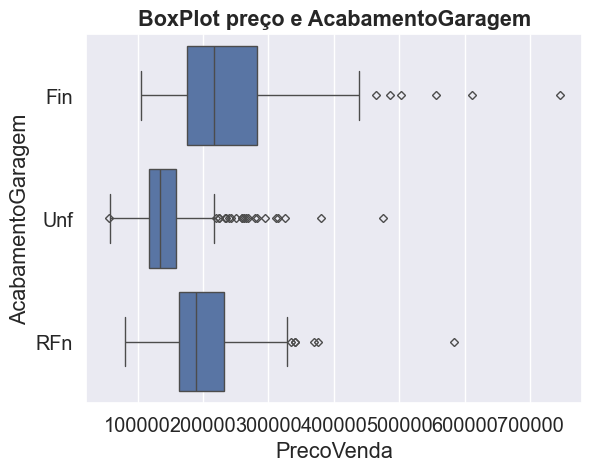

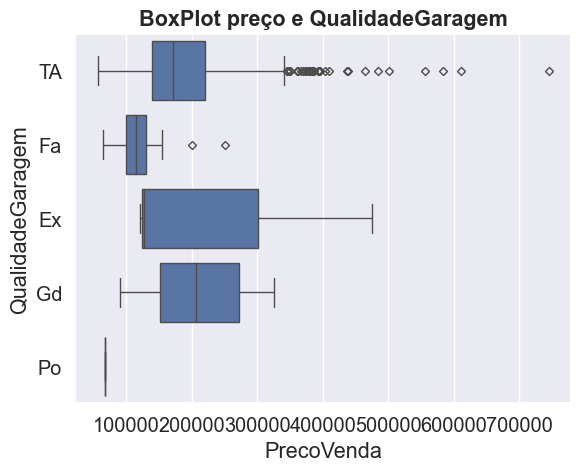

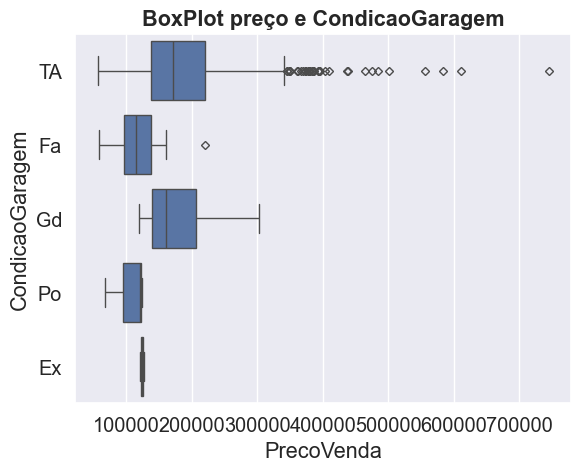

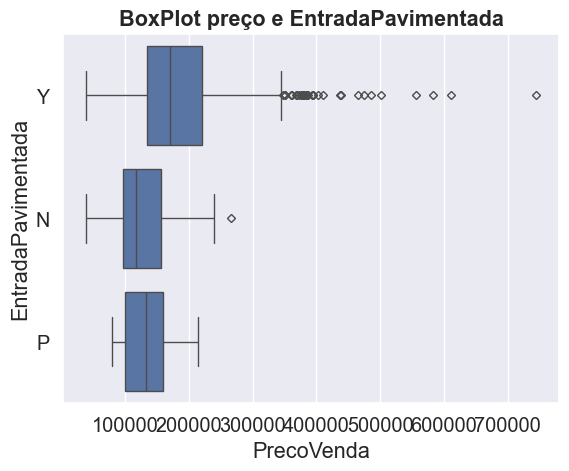

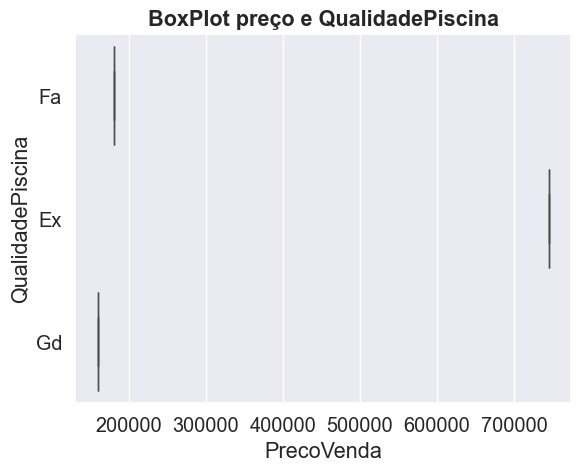

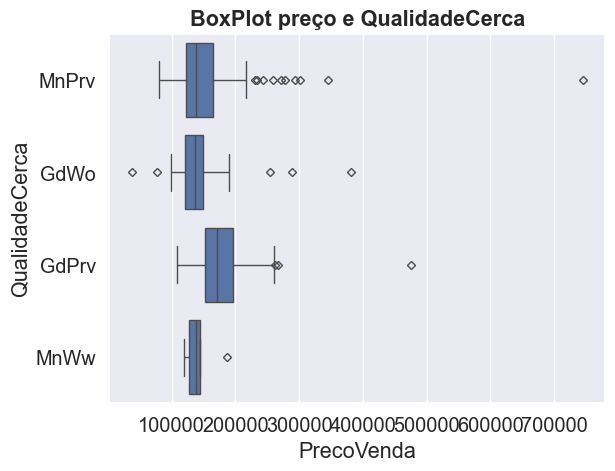

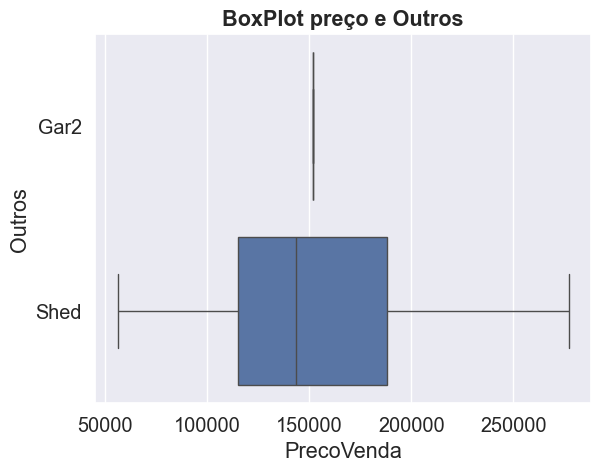

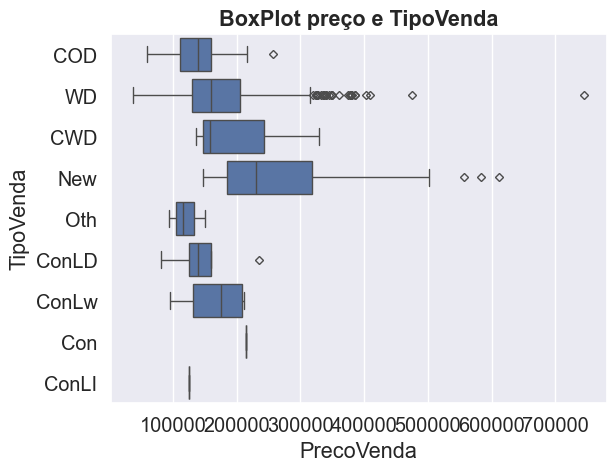

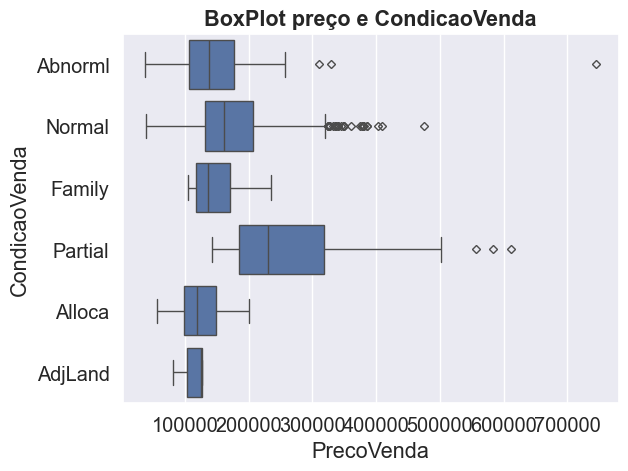

In [25]:
for x in auxiliar:
    sns.boxplot(data=df_train, x=df_train['PrecoVenda'], y=df_train[x],flierprops={'marker': 'D', 'markersize': 4.5})
    plt.title('BoxPlot preço e ' + x, fontweight='bold')
    plt.show()

### Tentando entender os dados faltantes

In [607]:
df_train.InstalacaoEletrica.value_counts(dropna=False)

InstalacaoEletrica
SBrkr    857
FuseA     57
FuseF     18
NaN        1
Mix        1
Name: count, dtype: int64

In [26]:
#Verificando apenas as Categorias area da Piscina e Qualidade
df_train.Bairro.value_counts(dropna=False)


Bairro
NAmes      145
CollgCr    101
OldTown     67
Edwards     64
Somerst     61
Gilbert     53
NWAmes      48
Sawyer      48
NridgHt     42
SawyerW     39
BrkSide     35
Crawfor     35
Mitchel     32
IDOTRR      26
NoRidge     23
Timber      21
ClearCr     19
SWISU       18
StoneBr     16
Blmngtn     11
BrDale      10
MeadowV      8
NPkVill      6
Veenker      5
Blueste      1
Name: count, dtype: int64

Podemos pressupor que os dados Nulos do TipoAlvenaria estão ali pois as casas podem não possuir Alvenaria

In [27]:
df_train['TipoAlvenaria'].fillna('NenhumaAlvenaria', inplace=True)
df_test['TipoAlvenaria'].fillna('NenhumaAlvenaria', inplace=True)


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\3700725113.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['TipoAlvenaria'].fillna('NenhumaAlvenaria', inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\3700725113.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [28]:
df_train['Outros'].fillna('Nada', inplace=True)
df_test['Outros'].fillna('Nada', inplace=True)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\978718350.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Outros'].fillna('Nada', inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\978718350.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [29]:
df_train['QualidadePiscina'].fillna('NenhumaPiscina', inplace=True)
df_test['QualidadePiscina'].fillna('NenhumaPiscina', inplace=True)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\1757862092.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['QualidadePiscina'].fillna('NenhumaPiscina', inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\1757862092.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [30]:
df_train['QualidadeCerca'].fillna('NenhumaCerca', inplace=True)
df_test['QualidadeCerca'].fillna('NenhumaCerca', inplace=True)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\1160706320.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['QualidadeCerca'].fillna('NenhumaCerca', inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\1160706320.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [31]:
df_train['LocalGaragem'].fillna('NenhumaGaragem', inplace=True)
df_test['LocalGaragem'].fillna('NenhumaGaragem', inplace=True)


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\3182650239.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['LocalGaragem'].fillna('NenhumaGaragem', inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\3182650239.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [32]:
df_train['TipoAcabPorao1'].fillna('NenhumPorao', inplace=True)
df_test['TipoAcabPorao1'].fillna('NenhumPorao', inplace=True)


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\3454570063.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['TipoAcabPorao1'].fillna('NenhumPorao', inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\3454570063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [33]:
df_train['CondicaoPorao'].fillna('NenhumPorao', inplace=True)
df_test['CondicaoPorao'].fillna('NenhumPorao', inplace=True)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\3571575569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['CondicaoPorao'].fillna('NenhumPorao', inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\3571575569.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [34]:
df_test['AreaAlvenaria'].fillna(0, inplace=True)
df_train['AreaAlvenaria'].fillna(0, inplace=True)



C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\88257588.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['AreaAlvenaria'].fillna(0, inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\88257588.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [35]:
df_train['QualidadeGaragem'].fillna('NenhumaGaragem', inplace=True)
df_test['QualidadeGaragem'].fillna('NenhumaGaragem', inplace=True)


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\3834897010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['QualidadeGaragem'].fillna('NenhumaGaragem', inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\3834897010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [36]:
df_train['CondicaoGaragem'].fillna('NenhumaCGaragem', inplace=True)
df_test['CondicaoGaragem'].fillna('NenhumaCGaragem', inplace=True)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\3468562716.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['CondicaoGaragem'].fillna('NenhumaCGaragem', inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\3468562716.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [37]:
df_train['LocalGaragem'].fillna('NaoLocal', inplace=True)

df_test['LocalGaragem'].fillna('NaoLocal', inplace=True)

In [463]:
df_train['AlturaPorao'].fillna('NaoTemAP', inplace=True)
df_test['AlturaPorao'].fillna('NaoTemAP', inplace=True)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\1666585801.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['AlturaPorao'].fillna('NaoTemAP', inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\1666585801.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [470]:
df_train['CondicaoPorao'].fillna('NaoTemCP', inplace=True)
df_test['CondicaoPorao'].fillna('NaoTemCP', inplace=True)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\1248033907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['CondicaoPorao'].fillna('NaoTemCP', inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\1248033907.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [608]:
df_train['InstalacaoEletrica'].fillna('SBrkr', inplace=True)
df_test['InstalacaoEletrica'].fillna('SBrkr', inplace=True)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\221229840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['InstalacaoEletrica'].fillna('SBrkr', inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\221229840.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [1490]:
df_train['QualdiadeLareira'].fillna('NaoTemLareira', inplace=True)
df_test['QualdiadeLareira'].fillna('NaoTemLareira', inplace=True)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\429012821.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['QualdiadeLareira'].fillna('NaoTemLareira', inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\429012821.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

### Outliers

In [38]:
df_train.describe(percentiles = [0.25, 0.5, 0.75, 0.99])

index  ClasseImovel     Fachada    TamanhoLote   Qualidade  \
count   934.000000    934.000000  774.000000     934.000000  934.000000   
mean    734.989293     56.349036   70.989664   10640.102784    6.108137   
std     418.628317     41.831723   24.921297   11239.439798    1.362520   
min       0.000000     20.000000   21.000000    1477.000000    1.000000   
25%     368.250000     20.000000   60.000000    7731.000000    5.000000   
50%     737.500000     50.000000   70.000000    9452.500000    6.000000   
75%    1088.500000     70.000000   80.000000   11522.500000    7.000000   
99%    1446.670000    190.000000  145.350000   38907.980000    9.670000   
max    1459.000000    190.000000  313.000000  215245.000000   10.000000   

         Condicao  AnoConstrucao   AnoReforma  AreaAlvenaria  AreaAcabPorao1  \
count  934.000000     934.000000   934.000000     934.000000      934.000000   
mean     5.625268    1971.325482  1985.404711     100.537473      451.568522   
std      1.109659      30.177770    20.428870     173.379776      465.534345   
min      2.000000    1880.000000  1950.000000       0.000000        0.000000   
25%      5.000000    1954.000000  1967.000000       0.000000        0.000000   
50%      5.000000    1972.000000  1995.000000       0.000000      386.500000   
75%      6.000000    2001.000000  2004.000000     158.000000      712.750000   
99%      9.000000    2009.000000  2009.000000     767.340000     1572.670000   
max      9.000000    2009.000000  2010.000000    1129.000000     5644.000000   

       AreaAcabPorao2  AreaInacabPorao    AreaPorao   AreaTerreo   Area2Andar  \
count       934.00000       934.000000   934.000000   934.000000   934.000000   
mean         47.62848       566.519272  1065.716274  1166.923983   342.147752   
std         167.96173       443.053416   439.224536   387.171198   429.208786   
min           0.00000         0.000000     0.000000   334.000000     0.000000   
25%           0.00000       219.250000   804.000000   884.250000     0.000000   
50%           0.00000       483.000000   999.500000  1088.500000     0.000000   
75%           0.00000       802.000000  1313.250000  1405.750000   729.000000   
99%         893.79000      1798.350000  2156.350000  2221.020000  1395.190000   
max        1474.00000      2336.000000  6110.000000  4692.000000  2065.000000   

       BaixaQualiAreaAcab  AreaConstruida  BanheiroPorao  LavaboPorao  \
count          934.000000      934.000000     934.000000   934.000000   
mean             6.473233     1515.544968       0.437901     0.063169   
std             50.973133      520.305829       0.527790     0.252051   
min              0.000000      334.000000       0.000000     0.000000   
25%              0.000000     1136.250000       0.000000     0.000000   
50%              0.000000     1468.500000       0.000000     0.000000   
75%              0.000000     1767.750000       1.000000     0.000000   
99%            367.370000     3084.680000       2.000000     1.000000   
max            572.000000     5642.000000       3.000000     2.000000   

         Banheiro      Lavabo  BedroomAbvGr  KitchenAbvGr  TotalQuartos  \
count  934.000000  934.000000    934.000000    934.000000     934.00000   
mean     1.563169    0.379015      2.870450      1.043897       6.51606   
std      0.543670    0.500620      0.818676      0.210140       1.60961   
min      0.000000    0.000000      0.000000      0.000000       2.00000   
25%      1.000000    0.000000      2.000000      1.000000       5.00000   
50%      2.000000    0.000000      3.000000      1.000000       6.00000   
75%      2.000000    1.000000      3.000000      1.000000       7.00000   
99%      3.000000    1.000000      5.000000      2.000000      11.00000   
max      3.000000    2.000000      8.000000      2.000000      14.00000   

          Lareira   AnoGaragem  CarrosGaragem  AreaGaragem    AreaDeck  \
count  934.000000   884.000000     934.000000   934.000000  934.000000   
mean     0.598501  1

In [39]:
df_train.AreaAcabPorao1.describe(percentiles = [0.25, 0.5, 0.75, 0.98])

count     934.000000
mean      451.568522
std       465.534345
min         0.000000
25%         0.000000
50%       386.500000
75%       712.750000
98%      1450.060000
max      5644.000000
Name: AreaAcabPorao1, dtype: float64

In [40]:

df_train.AreaPorao.describe(percentiles = [0.25, 0.5, 0.75, 0.98])

count     934.000000
mean     1065.716274
std       439.224536
min         0.000000
25%       804.000000
50%       999.500000
75%      1313.250000
98%      1994.720000
max      6110.000000
Name: AreaPorao, dtype: float64

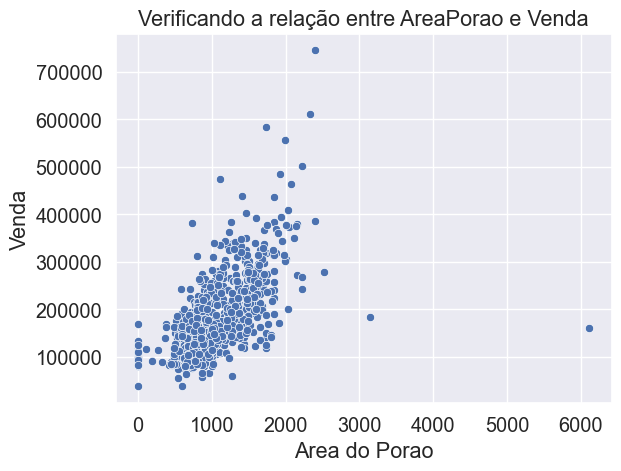

In [41]:
sns.scatterplot(x = 'AreaPorao', y = 'PrecoVenda', data = df_train)
plt.title('Verificando a relação entre AreaPorao e Venda')
plt.xlabel('Area do Porao')
plt.ylabel('Venda')
plt.show()

In [42]:
percentile_98 = df_train['TotalQuartos'].quantile(0.99)
df_train['TotalQuartos'] = df_train['TotalQuartos'].apply(lambda x: percentile_98 if x > percentile_98 else x)
df_train.TotalQuartos.describe(percentiles = [0.25, 0.5, 0.75, 0.98])

count    934.000000
mean       6.505353
std        1.573996
min        2.000000
25%        5.000000
50%        6.000000
75%        7.000000
98%       10.000000
max       11.000000
Name: TotalQuartos, dtype: float64

In [43]:
percentile_98 = df_train['AreaPorao'].quantile(0.98)
df_train['AreaPorao'] = df_train['AreaPorao'].apply(lambda x: percentile_98 if x > percentile_98 else x)
df_train.AreaPorao.describe(percentiles = [0.25, 0.5, 0.75, 0.98])

count     934.000000
mean     1056.728779
std       394.385669
min         0.000000
25%       804.000000
50%       999.500000
75%      1313.250000
98%      1992.924800
max      1994.720000
Name: AreaPorao, dtype: float64

In [44]:
df_train.AreaGaragem.describe(percentiles = [0.25, 0.5, 0.75, 0.98])

count     934.000000
mean      477.153105
std       213.734580
min         0.000000
25%       336.000000
50%       482.000000
75%       577.750000
98%       915.740000
max      1418.000000
Name: AreaGaragem, dtype: float64

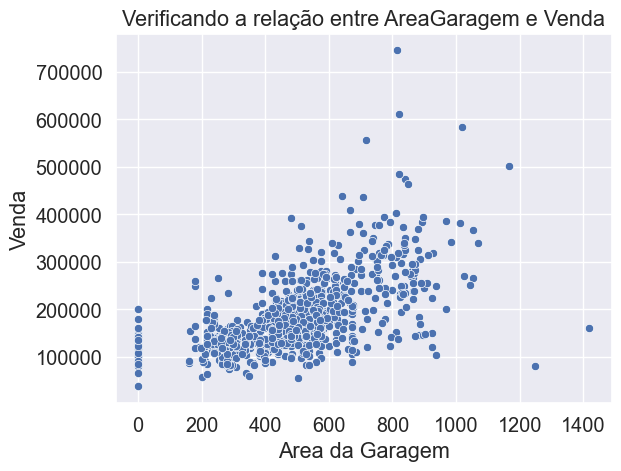

In [45]:
sns.scatterplot(x = 'AreaGaragem', y = 'PrecoVenda', data = df_train)
plt.title('Verificando a relação entre AreaGaragem e Venda')
plt.xlabel('Area da Garagem')
plt.ylabel('Venda')
plt.show()


In [46]:
percentile_98 = df_train['AreaGaragem'].quantile(0.95)
df_train['AreaGaragem'] = df_train['AreaGaragem'].apply(lambda x: percentile_98 if x > percentile_98 else x)
df_train.AreaGaragem.describe(percentiles = [0.25, 0.5, 0.75, 0.95])

count    934.000000
mean     472.700964
std      203.282536
min        0.000000
25%      336.000000
50%      482.000000
75%      577.750000
95%      850.735000
max      852.100000
Name: AreaGaragem, dtype: float64

In [47]:
df_train.AreaTerreo.describe(percentiles = [0.25, 0.5, 0.75, 0.98])

count     934.000000
mean     1166.923983
std       387.171198
min       334.000000
25%       884.250000
50%      1088.500000
75%      1405.750000
98%      2058.440000
max      4692.000000
Name: AreaTerreo, dtype: float64

In [48]:
percentile_98 = df_train['AreaTerreo'].quantile(0.98)
df_train['AreaTerreo'] = df_train['AreaTerreo'].apply(lambda x: percentile_98 if x > percentile_98 else x)
df_train.AreaTerreo.describe(percentiles = [0.25, 0.5, 0.75, 0.98])

count     934.000000
mean     1159.677045
std       356.714541
min       334.000000
25%       884.250000
50%      1088.500000
75%      1405.750000
98%      2054.849600
max      2058.440000
Name: AreaTerreo, dtype: float64

In [49]:
df_train.TamanhoLote.describe(percentiles = [0.25, 0.5, 0.75, 0.95])

count       934.000000
mean      10640.102784
std       11239.439798
min        1477.000000
25%        7731.000000
50%        9452.500000
75%       11522.500000
95%       17064.350000
max      215245.000000
Name: TamanhoLote, dtype: float64

In [50]:
percentile_98 = df_train['TamanhoLote'].quantile(0.95)
df_train['TamanhoLote'] = df_train['TamanhoLote'].apply(lambda x: percentile_98 if x > percentile_98 else x)
df_train.AreaTerreo.describe(percentiles = [0.25, 0.5, 0.75, 0.95])

count     934.000000
mean     1159.677045
std       356.714541
min       334.000000
25%       884.250000
50%      1088.500000
75%      1405.750000
95%      1830.800000
max      2058.440000
Name: AreaTerreo, dtype: float64

In [51]:
df_train.AreaConstruida.describe(percentiles = [0.25, 0.5, 0.75, 0.95])
percentile_98 = df_train['AreaConstruida'].quantile(0.95)
df_train['AreaConstruida'] = df_train['AreaConstruida'].apply(lambda x: percentile_98 if x > percentile_98 else x)
df_train.AreaConstruida.describe(percentiles = [0.25, 0.5, 0.75, 0.95])

count     934.000000
mean     1492.529336
std       444.489913
min       334.000000
25%      1136.250000
50%      1468.500000
75%      1767.750000
95%      2451.470000
max      2454.200000
Name: AreaConstruida, dtype: float64

In [52]:
df_train.AreaAcabPorao1.describe(percentiles = [0.25, 0.5, 0.75, 0.99])
percentile_98 = df_train['AreaAcabPorao1'].quantile(0.99)
df_train['AreaAcabPorao1'] = df_train['AreaAcabPorao1'].apply(lambda x: percentile_98 if x > percentile_98 else x)


In [53]:
df_train.AreaVarandaAberta.describe(percentiles = [0.25, 0.5, 0.75, 0.98])

percentile_98 = df_train['AreaVarandaAberta'].quantile(0.95)
df_train['AreaVarandaAberta'] = df_train['AreaVarandaAberta'].apply(lambda x: percentile_98 if x > percentile_98 else x)


In [54]:
##Tratando Outliers da AreaDeck
percentile_98 = df_train['AreaDeck'].quantile(0.99)
df_train['AreaDeck'] = df_train['AreaDeck'].apply(lambda x: percentile_98 if x > percentile_98 else x)




In [55]:
##Tratando os dados Faltantes da Fachada
#Inicialmente, vamos trocar os dados faltantes pela mediana da Fachada
percentile_50 = df_train['Fachada'].quantile(0.5)
df_train['Fachada'].fillna(percentile_50 , inplace=True)
percetile_test_50 = df_train['Fachada'].quantile(0.5)
df_test['Fachada'].fillna(percetile_test_50 , inplace=True)



C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\3756533365.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Fachada'].fillna(percentile_50 , inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\3756533365.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [56]:
##Outiliers da Fachada
percentile_98 = df_train['Fachada'].quantile(0.99)
df_train['Fachada'] = df_train['Fachada'].apply(lambda x: percentile_98 if x > percentile_98 else x)


In [184]:

df_train['QualidadeGaragem'] = df_train['QualidadeGaragem'].apply(lambda x: "ExQG" if x == 'Ex'  else x)
df_train['QualidadeGaragem'] = df_train['QualidadeGaragem'].apply(lambda x: "GdQG" if x == 'Gd'  else x)
df_train['QualidadeGaragem'] = df_train['QualidadeGaragem'].apply(lambda x: "TAQG" if x == 'TA'  else x)
df_train['QualidadeGaragem'] = df_train['QualidadeGaragem'].apply(lambda x: "FaQG" if x == 'Fa'  else x)
df_train['QualidadeGaragem'] = df_train['QualidadeGaragem'].apply(lambda x: "PoQG" if x == 'Po'  else x)


df_test['QualidadeGaragem'] = df_test['QualidadeGaragem'].apply(lambda x: "ExQG" if x == 'Ex'  else x)
df_test['QualidadeGaragem'] = df_test['QualidadeGaragem'].apply(lambda x: "GdQG" if x == 'Gd'  else x)
df_test['QualidadeGaragem'] = df_test['QualidadeGaragem'].apply(lambda x: "TAQG" if x == 'TA'  else x)
df_test['QualidadeGaragem'] = df_test['QualidadeGaragem'].apply(lambda x: "FaQG" if x == 'Fa'  else x)
df_test['QualidadeGaragem'] = df_test['QualidadeGaragem'].apply(lambda x: "PoQG" if x == 'Po'  else x)


In [240]:
#Trocando o nome das variaveis da CondicaoGaragem
df_train['CondicaoGaragem'] = df_train['CondicaoGaragem'].apply(lambda x: "ExCG" if x == 'Ex'  else x)
df_train['CondicaoGaragem'] = df_train['CondicaoGaragem'].apply(lambda x: "GdCG" if x == 'Gd'  else x)
df_train['CondicaoGaragem'] = df_train['CondicaoGaragem'].apply(lambda x: "TACG" if x == 'TA'  else x)
df_train['CondicaoGaragem'] = df_train['CondicaoGaragem'].apply(lambda x: "FaCG" if x == 'Fa'  else x)
df_train['CondicaoGaragem'] = df_train['CondicaoGaragem'].apply(lambda x: "PoCG" if x == 'Po'  else x)


df_test['CondicaoGaragem'] = df_test['CondicaoGaragem'].apply(lambda x: "ExCG" if x == 'Ex'  else x)
df_test['CondicaoGaragem'] = df_test['CondicaoGaragem'].apply(lambda x: "GdCG" if x == 'Gd'  else x)
df_test['CondicaoGaragem'] = df_test['CondicaoGaragem'].apply(lambda x: "TACG" if x == 'TA'  else x)
df_test['CondicaoGaragem'] = df_test['CondicaoGaragem'].apply(lambda x: "FaCG" if x == 'Fa'  else x)
df_test['CondicaoGaragem'] = df_test['CondicaoGaragem'].apply(lambda x: "PoCG" if x == 'Po'  else x)

In [464]:
#Trocando o nome das variaveis da AlturaPorao
df_train['AlturaPorao'] = df_train['AlturaPorao'].apply(lambda x: "ExAP" if x == 'Ex'  else x)
df_train['AlturaPorao'] = df_train['AlturaPorao'].apply(lambda x: "GdAP" if x == 'Gd'  else x)
df_train['AlturaPorao'] = df_train['AlturaPorao'].apply(lambda x: "TAAP" if x == 'TA'  else x)
df_train['AlturaPorao'] = df_train['AlturaPorao'].apply(lambda x: "FaAP" if x == 'Fa'  else x)
df_train['AlturaPorao'] = df_train['AlturaPorao'].apply(lambda x: "PoAP" if x == 'Po'  else x)


df_test['AlturaPorao'] = df_test['AlturaPorao'].apply(lambda x: "ExAP" if x == 'Ex'  else x)
df_test['AlturaPorao'] = df_test['AlturaPorao'].apply(lambda x: "GdAP" if x == 'Gd'  else x)
df_test['AlturaPorao'] = df_test['AlturaPorao'].apply(lambda x: "TAAP" if x == 'TA'  else x)
df_test['AlturaPorao'] = df_test['AlturaPorao'].apply(lambda x: "FaAP" if x == 'Fa'  else x)
df_test['AlturaPorao'] = df_test['AlturaPorao'].apply(lambda x: "PoAP" if x == 'Po'  else x)

In [471]:
#Trocando o nome das variaveis da CondicaoGaragem
df_train['CondicaoPorao'] = df_train['CondicaoPorao'].apply(lambda x: "ExCP" if x == 'Ex'  else x)
df_train['CondicaoPorao'] = df_train['CondicaoPorao'].apply(lambda x: "GdCP" if x == 'Gd'  else x)
df_train['CondicaoPorao'] = df_train['CondicaoPorao'].apply(lambda x: "TACP" if x == 'TA'  else x)
df_train['CondicaoPorao'] = df_train['CondicaoPorao'].apply(lambda x: "FaCP" if x == 'Fa'  else x)
df_train['CondicaoPorao'] = df_train['CondicaoPorao'].apply(lambda x: "PoCP" if x == 'Po'  else x)


df_test['CondicaoPorao'] = df_test['CondicaoPorao'].apply(lambda x: "ExCP" if x == 'Ex'  else x)
df_test['CondicaoPorao'] = df_test['CondicaoPorao'].apply(lambda x: "GdCP" if x == 'Gd'  else x)
df_test['CondicaoPorao'] = df_test['CondicaoPorao'].apply(lambda x: "TACP" if x == 'TA'  else x)
df_test['CondicaoPorao'] = df_test['CondicaoPorao'].apply(lambda x: "FaCP" if x == 'Fa'  else x)
df_test['CondicaoPorao'] = df_test['CondicaoPorao'].apply(lambda x: "PoCP" if x == 'Po'  else x)

In [758]:
#Trocando o nome das variaveis da CondicaoGaragem
df_train['QualidadeAquecimento'] = df_train['QualidadeAquecimento'].apply(lambda x: "ExQA" if x == 'Ex'  else x)
df_train['QualidadeAquecimento'] = df_train['QualidadeAquecimento'].apply(lambda x: "GdQA" if x == 'Gd'  else x)
df_train['QualidadeAquecimento'] = df_train['QualidadeAquecimento'].apply(lambda x: "TAQA" if x == 'TA'  else x)
df_train['QualidadeAquecimento'] = df_train['QualidadeAquecimento'].apply(lambda x: "FaQA" if x == 'Fa'  else x)
df_train['QualidadeAquecimento'] = df_train['QualidadeAquecimento'].apply(lambda x: "PoQA" if x == 'Po'  else x)


df_test['QualidadeAquecimento'] = df_test['QualidadeAquecimento'].apply(lambda x: "ExQA" if x == 'Ex'  else x)
df_test['QualidadeAquecimento'] = df_test['QualidadeAquecimento'].apply(lambda x: "GdQA" if x == 'Gd'  else x)
df_test['QualidadeAquecimento'] = df_test['QualidadeAquecimento'].apply(lambda x: "TAQA" if x == 'TA'  else x)
df_test['QualidadeAquecimento'] = df_test['QualidadeAquecimento'].apply(lambda x: "FaQA" if x == 'Fa'  else x)
df_test['QualidadeAquecimento'] = df_test['QualidadeAquecimento'].apply(lambda x: "PoQA" if x == 'Po'  else x)

In [759]:
df_train['QualidadeCobertura'] = df_train['QualidadeCobertura'].apply(lambda x: "ExQCBRT" if x == 'Ex'  else x)
df_train['QualidadeCobertura'] = df_train['QualidadeCobertura'].apply(lambda x: "GdQCBRT" if x == 'Gd'  else x)
df_train['QualidadeCobertura'] = df_train['QualidadeCobertura'].apply(lambda x: "TAQCBRT" if x == 'TA'  else x)
df_train['QualidadeCobertura'] = df_train['QualidadeCobertura'].apply(lambda x: "FaQCBRT" if x == 'Fa'  else x)
df_train['QualidadeCobertura'] = df_train['QualidadeCobertura'].apply(lambda x: "PoQCBRT" if x == 'Po'  else x)


df_test['QualidadeCobertura'] = df_test['QualidadeCobertura'].apply(lambda x: "ExQCBRT" if x == 'Ex'  else x)
df_test['QualidadeCobertura'] = df_test['QualidadeCobertura'].apply(lambda x: "GdQCBRT" if x == 'Gd'  else x)
df_test['QualidadeCobertura'] = df_test['QualidadeCobertura'].apply(lambda x: "TAQCBRT" if x == 'TA'  else x)
df_test['QualidadeCobertura'] = df_test['QualidadeCobertura'].apply(lambda x: "FaQCBRT" if x == 'Fa'  else x)
df_test['QualidadeCobertura'] = df_test['QualidadeCobertura'].apply(lambda x: "PoQCRT" if x == 'Po'  else x)

In [760]:
#Trocando o nome das variaveis da CondicaoGaragem
df_train['InstalacaoEletrica'] = df_train['InstalacaoEletrica'].apply(lambda x: "FuseA" if x == 'FuseF'  else x)
df_train['InstalacaoEletrica'] = df_train['InstalacaoEletrica'].apply(lambda x: "SBrkr" if x == 'Mix'  else x)



df_test['InstalacaoEletrica'] = df_test['InstalacaoEletrica'].apply(lambda x: "FuseA" if x == 'FuseF'  else x)
df_test['InstalacaoEletrica'] = df_test['InstalacaoEletrica'].apply(lambda x: "SBrkr" if x == 'Mix'  else x)




## OneHotEncoder

In [1540]:
from sklearn.preprocessing import OneHotEncoder

In [1541]:
df_train['Bairro'].unique()

array(['NWAmes', 'CollgCr', 'NridgHt', 'NAmes', 'OldTown', 'Edwards',
       'Somerst', 'SawyerW', 'Gilbert', 'ClearCr', 'Crawfor', 'Sawyer',
       'Mitchel', 'StoneBr', 'IDOTRR', 'NoRidge', 'BrkSide', 'Timber',
       'MeadowV', 'SWISU', 'Blmngtn', 'BrDale', 'Veenker', 'Blueste',
       'NPkVill'], dtype=object)

In [1542]:
ohe = OneHotEncoder()
ohe1 = OneHotEncoder()

In [1543]:
ohe.fit_transform(df_train[['Bairro']]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1544]:
ohe_bairro = ohe.fit_transform(df_train[['Bairro']]).toarray()

In [1545]:
ohe.categories_

[array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object)]

In [1546]:

labels_bairro = ohe.categories_
labels_bairro
df_train_enconded = df_train[['index','Qualidade', 'AnoConstrucao','AnoReforma','AreaPorao','AreaTerreo',
'AreaConstruida','AreaGaragem', 'TotalQuartos', 'Banheiro', 'AreaAlvenaria', 'Lareira', 'AreaAcabPorao1', 'Lavabo', 'CarrosGaragem',
                    'AreaDeck', 'AreaVarandaAberta', 'Condicao', 'BedroomAbvGr', 'Fachada', 'KitchenAbvGr', 'AreaInacabPorao', 'PrecoVenda']].copy()

In [1547]:
labels_bairro = ohe.categories_
aux = pd.DataFrame(ohe_bairro, columns = labels_bairro)

aux


Blmngtn Blueste BrDale BrkSide ClearCr CollgCr Crawfor Edwards Gilbert  \
0       0.0     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1       0.0     0.0    0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2       0.0     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3       0.0     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       0.0     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
..      ...     ...    ...     ...     ...     ...     ...     ...     ...   
929     0.0     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
930     0.0     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
931     0.0     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
932     0.0     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
933     0.0     0.0    0.0     0.0     0.0     1.0     0.0     0.0     0.0   

    IDOTRR MeadowV Mitchel NAmes NPkVill NWAmes NoRidge NridgHt OldTown SWISU  \
0      0.0     0.0     0.0   0.0     0.0    1.0     0.0     0.0     0.0   0.0   
1      0.0     0.0     0.0   0.0     0.0    0.0     0.0     0.0     0.0   0.0   
2      0.0     0.0     0.0   0.0     0.0    0.0     0.0     1.0     0.0   0.0   
3      0.0     0.0     0.0   1.0     0.0    0.0     0.0     0.0     0.0   0.0   
4      0.0     0.0     0.0   0.0     0.0    0.0     0.0     0.0     1.0   0.0   
..     ...     ...     ...   ...     ...    ...     ...     ...     ...   ...   
929    0.0     0.0     0.0   0.0     0.0    0.0     0.0     0.0     0.0   0.0   
930    0.0     0.0     0.0   0.0     0.0    1.0     0.0     0.0     0.0   0.0   
931    0.0     0.0     0.0   1.0     0.0    0.0     0.0     0.0     0.0   0.0   
932    0.0     0.0     0.0   0.0     0.0    0.0     0.0     0.0     0.0   0.0   
933    0.0     0.0     0.0   0.0     0.0    0.0     0.0     0.0     0.0   0.0   

    Sawyer SawyerW Somerst StoneBr Timber Veenker  
0      0.0     0.0     0.0     0.0    0.0     0.0  
1      0.0     0.0     0.0     0.0    0.0     0.0  
2      0.0     0.0     0.0     0.0    0.0     0.0  
3      0.0     0.0     0.0     0.0    0.0     0.0  
4      0.0     0.0     0.0     0.0    0.0     0.0  
..     ...     ...     ...     ...    ...     ...  
929    0.0     0.0     1.0     0.0    0.0     0.0  
930    0.0     0.0     0.0     0.0    0.0     0.0  
931    0.0     0.0     0.0     0.0    0.0     0.0  
932    0.0     0.0     1.0     0.0    0.0     0.0  
933    0.0     0.0     0.0     0.0    0.0     0.0  

[934 rows x 25 columns]

In [1548]:
df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)



In [1549]:

df_train_enconded .columns = df_train_enconded.columns.astype(str)
df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0        591   1055          6           1976        1976     1193.0   
1        184    911          5           1977        1989     1268.0   
2        743    994         10           2006        2007     1700.0   
3        178     19          5           1958        1965     1029.0   
4        597    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929     1044    409          8           2007        2008     1034.0   
930     1095    611          6           1978        1978     1032.0   
931     1130   1125          4           1955        1955     1005.0   
932      860    906          8           2006        2006     1623.0   
933     1126   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('index',)  ('Blmngtn',)  ('Blueste',)  \
0                549      180000           0           0.0           0.0   
1               1072      143500           1           0.0           0.0   
2                528      337500           2           0.0           0.0   
3                525      139000           3           0.0           0.0   
4               1050      131500           4           0.

In [1550]:
##Na base de testes
ohe_bairro_test = ohe1.fit_transform(df_test[['Bairro']]).toarray()
ohe_bairro_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1551]:
ohe_bairro_test = ohe1.fit_transform(df_test[['Bairro']]).toarray()
labels_bairro_test = ohe1.categories_
df_test_enconded = df_test[['index','Qualidade', 'AnoConstrucao','AnoReforma','AreaPorao','AreaTerreo',
'AreaConstruida','AreaGaragem', 'TotalQuartos', 'Banheiro', 'AreaAlvenaria', 'Lareira', 'AreaAcabPorao1', 'Lavabo', 'CarrosGaragem',
                    'AreaDeck', 'AreaVarandaAberta', 'Condicao', 'BedroomAbvGr', 'Fachada', 'KitchenAbvGr', 'AreaInacabPorao', 'PrecoVenda']].copy()

In [1552]:
labels_bairro_test

[array(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
        'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes',
        'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer',
        'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'], dtype=object)]

In [1553]:
aux_test = pd.DataFrame(ohe_bairro_test, columns = labels_bairro_test)
aux_test

Blmngtn BrDale BrkSide ClearCr CollgCr Crawfor Edwards Gilbert IDOTRR  \
0       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0   
1       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0   
2       0.0    0.0     0.0     0.0     0.0     0.0     1.0     0.0    0.0   
3       0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0    0.0   
4       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0   
..      ...    ...     ...     ...     ...     ...     ...     ...    ...   
229     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0   
230     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0   
231     0.0    0.0     1.0     0.0     0.0     0.0     0.0     0.0    0.0   
232     0.0    0.0     0.0     0.0     1.0     0.0     0.0     0.0    0.0   
233     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0   

    MeadowV Mitchel NAmes NWAmes NoRidge NridgHt OldTown SWISU Sawyer SawyerW  \
0       0.0     0.0   0.0    0.0     0.0     0.0     0.0   1.0    0.0     0.0   
1       0.0     0.0   0.0    0.0     0.0     1.0     0.0   0.0    0.0     0.0   
2       0.0     0.0   0.0    0.0     0.0     0.0     0.0   0.0    0.0     0.0   
3       0.0     0.0   0.0    0.0     0.0     0.0     0.0   0.0    0.0     0.0   
4       0.0     0.0   0.0    1.0     0.0     0.0     0.0   0.0    0.0     0.0   
..      ...     ...   ...    ...     ...     ...     ...   ...    ...     ...   
229     0.0     0.0   1.0    0.0     0.0     0.0     0.0   0.0    0.0     0.0   
230     0.0     0.0   0.0    0.0     0.0     1.0     0.0   0.0    0.0     0.0   
231     0.0     0.0   0.0    0.0     0.0     0.0     0.0   0.0    0.0     0.0   
232     0.0     0.0   0.0    0.0     0.0     0.0     0.0   0.0    0.0     0.0   
233     0.0     0.0   0.0    1.0     0.0     0.0     0.0   0.0    0.0     0.0   

    Somerst StoneBr Timber Veenker  
0       0.0     0.0    0.0     0.0  
1       0.0     0.0    0.0     0.0  
2       0.0     0.0    0.0     0.0  
3       0.0     0.0    0.0     0.0  
4       0.0     0.0    0.0     0.0  
..      ...     ...    ...     ...  
229     0.0     0.0    0.0     0.0  
230     0.0     0.0    0.0     0.0  
231     0.0     0.0    0.0     0.0  
232     0.0     0.0    0.0     0.0  
233     0.0     0.0    0.0     0.0  

[234 rows x 23 columns]

In [1554]:
df_test_enconded = pd.concat([df_test_enconded.reset_index(), aux_test.reset_index()], axis=1)


In [1555]:
df_test_enconded.columns = df_test_enconded.columns.astype(str)

In [1556]:
df_test_enconded

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0        694   1100          2           1920        1950        290   
1       1116     27          8           2007        2008       1704   
2         58   1314          4           1954        1954        948   
3         70    903          7           2006        2006       1670   
4       1030   1041          6           1966        2000        800   
..       ...    ...        ...            ...         ...        ...   
229      535   1435          6           1962        2005       1319   
230      728    926          8           2003        2004       1181   
231      135   1321          3           1949        1950          0   
232      543    518          6           1998        1998        794   
233      243    265          6           1981        1981       1422   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0           438             438          246             3         1   
1          1704            1704          772             7         2   
2           948             948          280             5         1   
3          1670            1670          690             7         2   
4           800            1632          484             7         1   
..          ...             ...          ...           ...       ...   
229        1537            1537          462             7         1   
230        1234            2374          656            10         2   
231         720             720          287             4         1   
232         882            1796          546             7         2   
233        1422            1422          576             7         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0              0.0        0             290       0              1         0   
1            200.0        1            1218       0              3         0   
2              0.0        1             732       0              1         0   
3             27.0        1               0       0              3       144   
4            252.0        0             400       1              2         0   
..             ...      ...             ...     ...            ...       ...   
229          237.0        1               0       1              2         0   
230          340.0        1               0       1              3       104   
231            0.0        0               0       0              1         0   
232            0.0        0             706       1              2         0   
233          210.0        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('index',)  ('Blmngtn',)  ('BrDale',)  \
0                  0       60000           0           0.0          0.0   
1                486      306000           1           0.0          0.0   
2                216      119000           2           0.0          0.0   
3               1670      240000           3           0.0          0.0   
4                336      173000           4           0.0    

In [1557]:
## Fazendo para outras variaveis
#Qualidade Cozinha
ohe_cozinha = ohe.fit_transform(df_train[['QualidadeCozinha']]).toarray()
ohe_cozinha


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [1558]:
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)

labels

[array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)]

In [1559]:
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)
df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('index',)  ('Blmngtn',)  ('Blueste',)  \
0                549      180000           0           0.0           0.0   
1               1072      143500           1           0.0           0.0   
2                528      337500           2           0.0           0.0   
3                525      139000           3           0.0           0.0   
4               1050      131500           4           0.

In [1560]:
##Mesmo processo para base de test, qualidadeCozinha
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
ohe_cozinha = ohe.fit_transform(df_test[['QualidadeCozinha']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)
df_test_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1100          2           1920        1950        290   
1          1     27          8           2007        2008       1704   
2          2   1314          4           1954        1954        948   
3          3    903          7           2006        2006       1670   
4          4   1041          6           1966        2000        800   
..       ...    ...        ...            ...         ...        ...   
229      229   1435          6           1962        2005       1319   
230      230    926          8           2003        2004       1181   
231      231   1321          3           1949        1950          0   
232      232    518          6           1998        1998        794   
233      233    265          6           1981        1981       1422   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0           438             438          246             3         1   
1          1704            1704          772             7         2   
2           948             948          280             5         1   
3          1670            1670          690             7         2   
4           800            1632          484             7         1   
..          ...             ...          ...           ...       ...   
229        1537            1537          462             7         1   
230        1234            2374          656            10         2   
231         720             720          287             4         1   
232         882            1796          546             7         2   
233        1422            1422          576             7         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0              0.0        0             290       0              1         0   
1            200.0        1            1218       0              3         0   
2              0.0        1             732       0              1         0   
3             27.0        1               0       0              3       144   
4            252.0        0             400       1              2         0   
..             ...      ...             ...     ...            ...       ...   
229          237.0        1               0       1              2         0   
230          340.0        1               0       1              3       104   
231            0.0        0               0       0              1         0   
232            0.0        0             706       1              2         0   
233          210.0        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('index',)  ('Blmngtn',)  ('BrDale',)  \
0                  0       60000           0           0.0          0.0   
1                486      306000           1           0.0          0.0   
2                216      119000           2           0.0          0.0   
3               1670      240000           3           0.0          0.0   
4                336      173000           4           0.0    

In [1561]:
##Mesmo processo para base de treino, TipoAlvenaria
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['TipoAlvenaria']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)
df_train_enconded 


level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('index',)  ('Blmngtn',)  ('Blueste',)  \
0                549      180000           0           0.0           0.0   
1               1072      143500           1           0.0           0.0   
2                528      337500           2           0.0           0.0   
3                525      139000           3           0.0           0.0   
4               1050      131500           4           0.

In [1562]:
##Mesmo processo para base de treino, TipoAlvenaria
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
ohe_cozinha = ohe.fit_transform(df_test[['TipoAlvenaria']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)
df_test_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1100          2           1920        1950        290   
1          1     27          8           2007        2008       1704   
2          2   1314          4           1954        1954        948   
3          3    903          7           2006        2006       1670   
4          4   1041          6           1966        2000        800   
..       ...    ...        ...            ...         ...        ...   
229      229   1435          6           1962        2005       1319   
230      230    926          8           2003        2004       1181   
231      231   1321          3           1949        1950          0   
232      232    518          6           1998        1998        794   
233      233    265          6           1981        1981       1422   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0           438             438          246             3         1   
1          1704            1704          772             7         2   
2           948             948          280             5         1   
3          1670            1670          690             7         2   
4           800            1632          484             7         1   
..          ...             ...          ...           ...       ...   
229        1537            1537          462             7         1   
230        1234            2374          656            10         2   
231         720             720          287             4         1   
232         882            1796          546             7         2   
233        1422            1422          576             7         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0              0.0        0             290       0              1         0   
1            200.0        1            1218       0              3         0   
2              0.0        1             732       0              1         0   
3             27.0        1               0       0              3       144   
4            252.0        0             400       1              2         0   
..             ...      ...             ...     ...            ...       ...   
229          237.0        1               0       1              2         0   
230          340.0        1               0       1              3       104   
231            0.0        0               0       0              1         0   
232            0.0        0             706       1              2         0   
233          210.0        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('index',)  ('Blmngtn',)  ('BrDale',)  \
0                  0       60000           0           0.0          0.0   
1                486      306000           1           0.0          0.0   
2                216      119000           2           0.0          0.0   
3               1670      240000           3           0.0          0.0   
4                336      173000           4           0.0    

In [1563]:
##Mesmo processo para base de treino, AlturaPorao
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['Estrada1']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)
df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('index',)  ('Blmngtn',)  ('Blueste',)  \
0                549      180000           0           0.0           0.0   
1               1072      143500           1           0.0           0.0   
2                528      337500           2           0.0           0.0   
3                525      139000           3           0.0           0.0   
4               1050      131500           4           0.

In [1564]:
##Mesmo processo para base de treino, AlturaPorao
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
ohe_cozinha = ohe.fit_transform(df_test[['Estrada1']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)
df_test_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1100          2           1920        1950        290   
1          1     27          8           2007        2008       1704   
2          2   1314          4           1954        1954        948   
3          3    903          7           2006        2006       1670   
4          4   1041          6           1966        2000        800   
..       ...    ...        ...            ...         ...        ...   
229      229   1435          6           1962        2005       1319   
230      230    926          8           2003        2004       1181   
231      231   1321          3           1949        1950          0   
232      232    518          6           1998        1998        794   
233      233    265          6           1981        1981       1422   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0           438             438          246             3         1   
1          1704            1704          772             7         2   
2           948             948          280             5         1   
3          1670            1670          690             7         2   
4           800            1632          484             7         1   
..          ...             ...          ...           ...       ...   
229        1537            1537          462             7         1   
230        1234            2374          656            10         2   
231         720             720          287             4         1   
232         882            1796          546             7         2   
233        1422            1422          576             7         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0              0.0        0             290       0              1         0   
1            200.0        1            1218       0              3         0   
2              0.0        1             732       0              1         0   
3             27.0        1               0       0              3       144   
4            252.0        0             400       1              2         0   
..             ...      ...             ...     ...            ...       ...   
229          237.0        1               0       1              2         0   
230          340.0        1               0       1              3       104   
231            0.0        0               0       0              1         0   
232            0.0        0             706       1              2         0   
233          210.0        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('index',)  ('Blmngtn',)  ('BrDale',)  \
0                  0       60000           0           0.0          0.0   
1                486      306000           1           0.0          0.0   
2                216      119000           2           0.0          0.0   
3               1670      240000           3           0.0          0.0   
4                336      173000           4           0.0    

In [1565]:
##Mesmo processo para base de treino, ArCentral
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['ArCentral']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)
df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('index',)  ('Blmngtn',)  ('Blueste',)  \
0                549      180000           0           0.0           0.0   
1               1072      143500           1           0.0           0.0   
2                528      337500           2           0.0           0.0   
3                525      139000           3           0.0           0.0   
4               1050      131500           4           0.

In [1566]:
##Mesmo processo para base de treino, Arcentral
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
ohe_cozinha = ohe.fit_transform(df_test[['ArCentral']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)
df_test_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1100          2           1920        1950        290   
1          1     27          8           2007        2008       1704   
2          2   1314          4           1954        1954        948   
3          3    903          7           2006        2006       1670   
4          4   1041          6           1966        2000        800   
..       ...    ...        ...            ...         ...        ...   
229      229   1435          6           1962        2005       1319   
230      230    926          8           2003        2004       1181   
231      231   1321          3           1949        1950          0   
232      232    518          6           1998        1998        794   
233      233    265          6           1981        1981       1422   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0           438             438          246             3         1   
1          1704            1704          772             7         2   
2           948             948          280             5         1   
3          1670            1670          690             7         2   
4           800            1632          484             7         1   
..          ...             ...          ...           ...       ...   
229        1537            1537          462             7         1   
230        1234            2374          656            10         2   
231         720             720          287             4         1   
232         882            1796          546             7         2   
233        1422            1422          576             7         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0              0.0        0             290       0              1         0   
1            200.0        1            1218       0              3         0   
2              0.0        1             732       0              1         0   
3             27.0        1               0       0              3       144   
4            252.0        0             400       1              2         0   
..             ...      ...             ...     ...            ...       ...   
229          237.0        1               0       1              2         0   
230          340.0        1               0       1              3       104   
231            0.0        0               0       0              1         0   
232            0.0        0             706       1              2         0   
233          210.0        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('index',)  ('Blmngtn',)  ('BrDale',)  \
0                  0       60000           0           0.0          0.0   
1                486      306000           1           0.0          0.0   
2                216      119000           2           0.0          0.0   
3               1670      240000           3           0.0          0.0   
4                336      173000           4           0.0    

In [1567]:
##Mesmo processo para base de treino, ArCentral
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
df_train_enconded = df_train_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['ClasseZona']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)
df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('Blueste',)  ('BrDale',)  \
0                549      180000           0.0           0.0          0.0   
1               1072      143500           0.0           0.0          0.0   
2                528      337500           0.0           0.0          0.0   
3                525      139000           0.0           0.0          0.0   
4               1050      131500           0.0      

In [1568]:
##Mesmo processo para base de treino, Rua
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
df_test_enconded = df_test_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_test[['ClasseZona']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)
df_test_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1100          2           1920        1950        290   
1          1     27          8           2007        2008       1704   
2          2   1314          4           1954        1954        948   
3          3    903          7           2006        2006       1670   
4          4   1041          6           1966        2000        800   
..       ...    ...        ...            ...         ...        ...   
229      229   1435          6           1962        2005       1319   
230      230    926          8           2003        2004       1181   
231      231   1321          3           1949        1950          0   
232      232    518          6           1998        1998        794   
233      233    265          6           1981        1981       1422   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0           438             438          246             3         1   
1          1704            1704          772             7         2   
2           948             948          280             5         1   
3          1670            1670          690             7         2   
4           800            1632          484             7         1   
..          ...             ...          ...           ...       ...   
229        1537            1537          462             7         1   
230        1234            2374          656            10         2   
231         720             720          287             4         1   
232         882            1796          546             7         2   
233        1422            1422          576             7         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0              0.0        0             290       0              1         0   
1            200.0        1            1218       0              3         0   
2              0.0        1             732       0              1         0   
3             27.0        1               0       0              3       144   
4            252.0        0             400       1              2         0   
..             ...      ...             ...     ...            ...       ...   
229          237.0        1               0       1              2         0   
230          340.0        1               0       1              3       104   
231            0.0        0               0       0              1         0   
232            0.0        0             706       1              2         0   
233          210.0        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('BrDale',)  ('BrkSide',)  \
0                  0       60000           0.0          0.0           0.0   
1                486      306000           0.0          0.0           0.0   
2                216      119000           0.0          0.0           0.0   
3               1670      240000           0.0          0.0           0.0   
4                336      173000           0.0      

In [1569]:
##Mesmo processo para base de treino, ArCentral
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
df_train_enconded = df_train_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['Rua']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)
df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('Blueste',)  ('BrDale',)  \
0                549      180000           0.0           0.0          0.0   
1               1072      143500           0.0           0.0          0.0   
2                528      337500           0.0           0.0          0.0   
3                525      139000           0.0           0.0          0.0   
4               1050      131500           0.0      

In [1570]:
##Mesmo processo para base de treino, Rua
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
df_test_enconded = df_test_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_test[['Rua']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)
df_test_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1100          2           1920        1950        290   
1          1     27          8           2007        2008       1704   
2          2   1314          4           1954        1954        948   
3          3    903          7           2006        2006       1670   
4          4   1041          6           1966        2000        800   
..       ...    ...        ...            ...         ...        ...   
229      229   1435          6           1962        2005       1319   
230      230    926          8           2003        2004       1181   
231      231   1321          3           1949        1950          0   
232      232    518          6           1998        1998        794   
233      233    265          6           1981        1981       1422   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0           438             438          246             3         1   
1          1704            1704          772             7         2   
2           948             948          280             5         1   
3          1670            1670          690             7         2   
4           800            1632          484             7         1   
..          ...             ...          ...           ...       ...   
229        1537            1537          462             7         1   
230        1234            2374          656            10         2   
231         720             720          287             4         1   
232         882            1796          546             7         2   
233        1422            1422          576             7         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0              0.0        0             290       0              1         0   
1            200.0        1            1218       0              3         0   
2              0.0        1             732       0              1         0   
3             27.0        1               0       0              3       144   
4            252.0        0             400       1              2         0   
..             ...      ...             ...     ...            ...       ...   
229          237.0        1               0       1              2         0   
230          340.0        1               0       1              3       104   
231            0.0        0               0       0              1         0   
232            0.0        0             706       1              2         0   
233          210.0        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('BrDale',)  ('BrkSide',)  \
0                  0       60000           0.0          0.0           0.0   
1                486      306000           0.0          0.0           0.0   
2                216      119000           0.0          0.0           0.0   
3               1670      240000           0.0          0.0           0.0   
4                336      173000           0.0      

In [1571]:
##Mesmo processo para base de treino, ArCentral
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
df_train_enconded = df_train_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['EntradaPavimentada']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)
df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('Blueste',)  ('BrDale',)  \
0                549      180000           0.0           0.0          0.0   
1               1072      143500           0.0           0.0          0.0   
2                528      337500           0.0           0.0          0.0   
3                525      139000           0.0           0.0          0.0   
4               1050      131500           0.0      

In [1572]:
##Mesmo processo para base de treino, Rua
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
df_test_enconded = df_test_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_test[['EntradaPavimentada']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)
df_test_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1100          2           1920        1950        290   
1          1     27          8           2007        2008       1704   
2          2   1314          4           1954        1954        948   
3          3    903          7           2006        2006       1670   
4          4   1041          6           1966        2000        800   
..       ...    ...        ...            ...         ...        ...   
229      229   1435          6           1962        2005       1319   
230      230    926          8           2003        2004       1181   
231      231   1321          3           1949        1950          0   
232      232    518          6           1998        1998        794   
233      233    265          6           1981        1981       1422   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0           438             438          246             3         1   
1          1704            1704          772             7         2   
2           948             948          280             5         1   
3          1670            1670          690             7         2   
4           800            1632          484             7         1   
..          ...             ...          ...           ...       ...   
229        1537            1537          462             7         1   
230        1234            2374          656            10         2   
231         720             720          287             4         1   
232         882            1796          546             7         2   
233        1422            1422          576             7         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0              0.0        0             290       0              1         0   
1            200.0        1            1218       0              3         0   
2              0.0        1             732       0              1         0   
3             27.0        1               0       0              3       144   
4            252.0        0             400       1              2         0   
..             ...      ...             ...     ...            ...       ...   
229          237.0        1               0       1              2         0   
230          340.0        1               0       1              3       104   
231            0.0        0               0       0              1         0   
232            0.0        0             706       1              2         0   
233          210.0        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('BrDale',)  ('BrkSide',)  \
0                  0       60000           0.0          0.0           0.0   
1                486      306000           0.0          0.0           0.0   
2                216      119000           0.0          0.0           0.0   
3               1670      240000           0.0          0.0           0.0   
4                336      173000           0.0      

In [1573]:
##Mesmo processo para base de treino, ArCentral
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
df_train_enconded = df_train_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['TipoAcabPorao1']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)

df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('Blueste',)  ('BrDale',)  \
0                549      180000           0.0           0.0          0.0   
1               1072      143500           0.0           0.0          0.0   
2                528      337500           0.0           0.0          0.0   
3                525      139000           0.0           0.0          0.0   
4               1050      131500           0.0      

In [1574]:
##Mesmo processo para base de treino, Rua
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
df_test_enconded = df_test_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_test[['TipoAcabPorao1']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)

df_test_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1100          2           1920        1950        290   
1          1     27          8           2007        2008       1704   
2          2   1314          4           1954        1954        948   
3          3    903          7           2006        2006       1670   
4          4   1041          6           1966        2000        800   
..       ...    ...        ...            ...         ...        ...   
229      229   1435          6           1962        2005       1319   
230      230    926          8           2003        2004       1181   
231      231   1321          3           1949        1950          0   
232      232    518          6           1998        1998        794   
233      233    265          6           1981        1981       1422   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0           438             438          246             3         1   
1          1704            1704          772             7         2   
2           948             948          280             5         1   
3          1670            1670          690             7         2   
4           800            1632          484             7         1   
..          ...             ...          ...           ...       ...   
229        1537            1537          462             7         1   
230        1234            2374          656            10         2   
231         720             720          287             4         1   
232         882            1796          546             7         2   
233        1422            1422          576             7         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0              0.0        0             290       0              1         0   
1            200.0        1            1218       0              3         0   
2              0.0        1             732       0              1         0   
3             27.0        1               0       0              3       144   
4            252.0        0             400       1              2         0   
..             ...      ...             ...     ...            ...       ...   
229          237.0        1               0       1              2         0   
230          340.0        1               0       1              3       104   
231            0.0        0               0       0              1         0   
232            0.0        0             706       1              2         0   
233          210.0        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('BrDale',)  ('BrkSide',)  \
0                  0       60000           0.0          0.0           0.0   
1                486      306000           0.0          0.0           0.0   
2                216      119000           0.0          0.0           0.0   
3               1670      240000           0.0          0.0           0.0   
4                336      173000           0.0      

In [1575]:
##Mesmo processo para base de treino, ArCentral


In [1576]:
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
df_train_enconded = df_train_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['CondicaoVenda']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)

df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('Blueste',)  ('BrDale',)  \
0                549      180000           0.0           0.0          0.0   
1               1072      143500           0.0           0.0          0.0   
2                528      337500           0.0           0.0          0.0   
3                525      139000           0.0           0.0          0.0   
4               1050      131500           0.0      

In [1577]:
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
df_test_enconded = df_test_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_test[['CondicaoVenda']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)

df_test_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1100          2           1920        1950        290   
1          1     27          8           2007        2008       1704   
2          2   1314          4           1954        1954        948   
3          3    903          7           2006        2006       1670   
4          4   1041          6           1966        2000        800   
..       ...    ...        ...            ...         ...        ...   
229      229   1435          6           1962        2005       1319   
230      230    926          8           2003        2004       1181   
231      231   1321          3           1949        1950          0   
232      232    518          6           1998        1998        794   
233      233    265          6           1981        1981       1422   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0           438             438          246             3         1   
1          1704            1704          772             7         2   
2           948             948          280             5         1   
3          1670            1670          690             7         2   
4           800            1632          484             7         1   
..          ...             ...          ...           ...       ...   
229        1537            1537          462             7         1   
230        1234            2374          656            10         2   
231         720             720          287             4         1   
232         882            1796          546             7         2   
233        1422            1422          576             7         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0              0.0        0             290       0              1         0   
1            200.0        1            1218       0              3         0   
2              0.0        1             732       0              1         0   
3             27.0        1               0       0              3       144   
4            252.0        0             400       1              2         0   
..             ...      ...             ...     ...            ...       ...   
229          237.0        1               0       1              2         0   
230          340.0        1               0       1              3       104   
231            0.0        0               0       0              1         0   
232            0.0        0             706       1              2         0   
233          210.0        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('BrDale',)  ('BrkSide',)  \
0                  0       60000           0.0          0.0           0.0   
1                486      306000           0.0          0.0           0.0   
2                216      119000           0.0          0.0           0.0   
3               1670      240000           0.0          0.0           0.0   
4                336      173000           0.0      

In [1578]:
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
df_train_enconded = df_train_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['LocalGaragem']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)

df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('Blueste',)  ('BrDale',)  \
0                549      180000           0.0           0.0          0.0   
1               1072      143500           0.0           0.0          0.0   
2                528      337500           0.0           0.0          0.0   
3                525      139000           0.0           0.0          0.0   
4               1050      131500           0.0      

In [1579]:
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
df_test_enconded = df_test_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_test[['LocalGaragem']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)

df_test_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1100          2           1920        1950        290   
1          1     27          8           2007        2008       1704   
2          2   1314          4           1954        1954        948   
3          3    903          7           2006        2006       1670   
4          4   1041          6           1966        2000        800   
..       ...    ...        ...            ...         ...        ...   
229      229   1435          6           1962        2005       1319   
230      230    926          8           2003        2004       1181   
231      231   1321          3           1949        1950          0   
232      232    518          6           1998        1998        794   
233      233    265          6           1981        1981       1422   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0           438             438          246             3         1   
1          1704            1704          772             7         2   
2           948             948          280             5         1   
3          1670            1670          690             7         2   
4           800            1632          484             7         1   
..          ...             ...          ...           ...       ...   
229        1537            1537          462             7         1   
230        1234            2374          656            10         2   
231         720             720          287             4         1   
232         882            1796          546             7         2   
233        1422            1422          576             7         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0              0.0        0             290       0              1         0   
1            200.0        1            1218       0              3         0   
2              0.0        1             732       0              1         0   
3             27.0        1               0       0              3       144   
4            252.0        0             400       1              2         0   
..             ...      ...             ...     ...            ...       ...   
229          237.0        1               0       1              2         0   
230          340.0        1               0       1              3       104   
231            0.0        0               0       0              1         0   
232            0.0        0             706       1              2         0   
233          210.0        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('BrDale',)  ('BrkSide',)  \
0                  0       60000           0.0          0.0           0.0   
1                486      306000           0.0          0.0           0.0   
2                216      119000           0.0          0.0           0.0   
3               1670      240000           0.0          0.0           0.0   
4                336      173000           0.0      

In [1580]:
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
df_train_enconded = df_train_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['TipoHabitacao']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)

df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('Blueste',)  ('BrDale',)  \
0                549      180000           0.0           0.0          0.0   
1               1072      143500           0.0           0.0          0.0   
2                528      337500           0.0           0.0          0.0   
3                525      139000           0.0           0.0          0.0   
4               1050      131500           0.0      

In [1581]:
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
df_test_enconded = df_test_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_test[['TipoHabitacao']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)

df_test_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1100          2           1920        1950        290   
1          1     27          8           2007        2008       1704   
2          2   1314          4           1954        1954        948   
3          3    903          7           2006        2006       1670   
4          4   1041          6           1966        2000        800   
..       ...    ...        ...            ...         ...        ...   
229      229   1435          6           1962        2005       1319   
230      230    926          8           2003        2004       1181   
231      231   1321          3           1949        1950          0   
232      232    518          6           1998        1998        794   
233      233    265          6           1981        1981       1422   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0           438             438          246             3         1   
1          1704            1704          772             7         2   
2           948             948          280             5         1   
3          1670            1670          690             7         2   
4           800            1632          484             7         1   
..          ...             ...          ...           ...       ...   
229        1537            1537          462             7         1   
230        1234            2374          656            10         2   
231         720             720          287             4         1   
232         882            1796          546             7         2   
233        1422            1422          576             7         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0              0.0        0             290       0              1         0   
1            200.0        1            1218       0              3         0   
2              0.0        1             732       0              1         0   
3             27.0        1               0       0              3       144   
4            252.0        0             400       1              2         0   
..             ...      ...             ...     ...            ...       ...   
229          237.0        1               0       1              2         0   
230          340.0        1               0       1              3       104   
231            0.0        0               0       0              1         0   
232            0.0        0             706       1              2         0   
233          210.0        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('BrDale',)  ('BrkSide',)  \
0                  0       60000           0.0          0.0           0.0   
1                486      306000           0.0          0.0           0.0   
2                216      119000           0.0          0.0           0.0   
3               1670      240000           0.0          0.0           0.0   
4                336      173000           0.0      

In [1582]:
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
df_train_enconded = df_train_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['TipoVenda']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)

df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('Blueste',)  ('BrDale',)  \
0                549      180000           0.0           0.0          0.0   
1               1072      143500           0.0           0.0          0.0   
2                528      337500           0.0           0.0          0.0   
3                525      139000           0.0           0.0          0.0   
4               1050      131500           0.0      

In [1583]:
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
df_test_enconded = df_test_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_test[['TipoVenda']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)

df_test_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1100          2           1920        1950        290   
1          1     27          8           2007        2008       1704   
2          2   1314          4           1954        1954        948   
3          3    903          7           2006        2006       1670   
4          4   1041          6           1966        2000        800   
..       ...    ...        ...            ...         ...        ...   
229      229   1435          6           1962        2005       1319   
230      230    926          8           2003        2004       1181   
231      231   1321          3           1949        1950          0   
232      232    518          6           1998        1998        794   
233      233    265          6           1981        1981       1422   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0           438             438          246             3         1   
1          1704            1704          772             7         2   
2           948             948          280             5         1   
3          1670            1670          690             7         2   
4           800            1632          484             7         1   
..          ...             ...          ...           ...       ...   
229        1537            1537          462             7         1   
230        1234            2374          656            10         2   
231         720             720          287             4         1   
232         882            1796          546             7         2   
233        1422            1422          576             7         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0              0.0        0             290       0              1         0   
1            200.0        1            1218       0              3         0   
2              0.0        1             732       0              1         0   
3             27.0        1               0       0              3       144   
4            252.0        0             400       1              2         0   
..             ...      ...             ...     ...            ...       ...   
229          237.0        1               0       1              2         0   
230          340.0        1               0       1              3       104   
231            0.0        0               0       0              1         0   
232            0.0        0             706       1              2         0   
233          210.0        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('BrDale',)  ('BrkSide',)  \
0                  0       60000           0.0          0.0           0.0   
1                486      306000           0.0          0.0           0.0   
2                216      119000           0.0          0.0           0.0   
3               1670      240000           0.0          0.0           0.0   
4                336      173000           0.0      

In [1584]:
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
df_train_enconded = df_train_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['QualidadeGaragem']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)

df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('Blueste',)  ('BrDale',)  \
0                549      180000           0.0           0.0          0.0   
1               1072      143500           0.0           0.0          0.0   
2                528      337500           0.0           0.0          0.0   
3                525      139000           0.0           0.0          0.0   
4               1050      131500           0.0      

In [1585]:
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
df_test_enconded = df_test_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_test[['QualidadeGaragem']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)

df_test_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1100          2           1920        1950        290   
1          1     27          8           2007        2008       1704   
2          2   1314          4           1954        1954        948   
3          3    903          7           2006        2006       1670   
4          4   1041          6           1966        2000        800   
..       ...    ...        ...            ...         ...        ...   
229      229   1435          6           1962        2005       1319   
230      230    926          8           2003        2004       1181   
231      231   1321          3           1949        1950          0   
232      232    518          6           1998        1998        794   
233      233    265          6           1981        1981       1422   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0           438             438          246             3         1   
1          1704            1704          772             7         2   
2           948             948          280             5         1   
3          1670            1670          690             7         2   
4           800            1632          484             7         1   
..          ...             ...          ...           ...       ...   
229        1537            1537          462             7         1   
230        1234            2374          656            10         2   
231         720             720          287             4         1   
232         882            1796          546             7         2   
233        1422            1422          576             7         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0              0.0        0             290       0              1         0   
1            200.0        1            1218       0              3         0   
2              0.0        1             732       0              1         0   
3             27.0        1               0       0              3       144   
4            252.0        0             400       1              2         0   
..             ...      ...             ...     ...            ...       ...   
229          237.0        1               0       1              2         0   
230          340.0        1               0       1              3       104   
231            0.0        0               0       0              1         0   
232            0.0        0             706       1              2         0   
233          210.0        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('BrDale',)  ('BrkSide',)  \
0                  0       60000           0.0          0.0           0.0   
1                486      306000           0.0          0.0           0.0   
2                216      119000           0.0          0.0           0.0   
3               1670      240000           0.0          0.0           0.0   
4                336      173000           0.0      

In [1586]:
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
df_train_enconded = df_train_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['QualidadeAquecimento']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)

df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('Blueste',)  ('BrDale',)  \
0                549      180000           0.0           0.0          0.0   
1               1072      143500           0.0           0.0          0.0   
2                528      337500           0.0           0.0          0.0   
3                525      139000           0.0           0.0          0.0   
4               1050      131500           0.0      

In [1587]:
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
df_test_enconded = df_test_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_test[['QualidadeAquecimento']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)

In [1588]:
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
df_train_enconded = df_train_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['QualidadeCobertura']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)

df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('Blueste',)  ('BrDale',)  \
0                549      180000           0.0           0.0          0.0   
1               1072      143500           0.0           0.0          0.0   
2                528      337500           0.0           0.0          0.0   
3                525      139000           0.0           0.0          0.0   
4               1050      131500           0.0      

In [1589]:
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
df_test_enconded = df_test_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_test[['QualidadeCobertura']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)

 

In [1590]:
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
df_train_enconded = df_train_enconded.drop("('index',)", axis=1)
ohe_cozinha = ohe.fit_transform(df_train[['QualdiadeLareira']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_train_enconded  = pd.concat([df_train_enconded.reset_index(), aux.reset_index()], axis=1)
df_train_enconded.columns = df_train_enconded.columns.astype(str)

df_train_enconded 

level_0  index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  \
0          0   1055          6           1976        1976     1193.0   
1          1    911          5           1977        1989     1268.0   
2          2    994         10           2006        2007     1700.0   
3          3     19          5           1958        1965     1029.0   
4          4    579          5           1954        1954     1050.0   
..       ...    ...        ...            ...         ...        ...   
929      929    409          8           2007        2008     1034.0   
930      930    611          6           1978        1978     1032.0   
931      931   1125          4           1955        1955     1005.0   
932      932    906          8           2006        2006     1623.0   
933      933   1198          7           2001        2001     1212.0   

     AreaTerreo  AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  \
0        1523.0          1523.0        478.0           7.0         2   
1        1268.0          1268.0        252.0           5.0         1   
2        1718.0          1718.0        786.0           7.0         2   
3        1339.0          1339.0        294.0           6.0         1   
4        1050.0          1795.0        352.0           7.0         2   
..          ...             ...          ...           ...       ...   
929      1050.0          2078.0        836.0           8.0         2   
930      1032.0          1032.0        564.0           6.0         2   
931      1005.0          1005.0        672.0           5.0         1   
932      1636.0          1636.0        852.1           8.0         2   
933      1212.0          1212.0        573.0           6.0         2   

     AreaAlvenaria  Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0            160.0        1           644.0       0              2       0.0   
1              0.0        0           196.0       1              1     173.0   
2            230.0        1          1172.0       0              3     216.0   
3              0.0        0           504.0       0              1       0.0   
4            335.0        0             0.0       0              1       0.0   
..             ...      ...             ...     ...            ...       ...   
929          100.0        1           789.0       1              3       0.0   
930          233.0        1           605.0       0              2       0.0   
931            0.0        1             0.0       0              2       0.0   
932          208.0        1            63.0       0              3       0.0   
933            0.0        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('Blueste',)  ('BrDale',)  \
0                549      180000           0.0           0.0          0.0   
1               1072      143500           0.0           0.0          0.0   
2                528      337500           0.0           0.0          0.0   
3                525      139000           0.0           0.0          0.0   
4               1050      131500           0.0      

In [1591]:

df_test_enconded = df_test_enconded.drop('level_0', axis=1)
df_test_enconded = df_test_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_test[['QualdiadeLareira']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)


df_test_enconded  = pd.concat([df_test_enconded.reset_index(), aux.reset_index()], axis=1)
df_test_enconded.columns = df_test_enconded.columns.astype(str)

In [1601]:
df_train_enconded = df_train_enconded.drop('level_0', axis=1)
df_train_enconded = df_train_enconded.drop("('index',)", axis=1)
df_test_enconded = df_test_enconded.drop('level_0', axis=1)
df_test_enconded = df_test_enconded.drop("('index',)", axis=1)

## Normalização

from sklearn.preprocessing import StandardScaler

labels = df_train_enconded.columns
labels_test = df_test_enconded.columns
df_train_enconded_normal = df_train_enconded.copy()
df_test_enconded_normal = df_test_enconded.copy()

# Instanciando os scalers
scaler_standard = StandardScaler()


# Aplicando os scalers
df_train_standardized = scaler_standard.fit_transform(df_train_enconded_normal)
df_test_standardized = scaler_standard.fit_transform(df_test_enconded_normal)

# Convertendo os resultados de volta para DataFrame pandas
df_train_standardized = pd.DataFrame(df_train_standardized, columns=labels, index=df_train_enconded_normal.index)
df_test_standardized = pd.DataFrame(df_test_standardized, columns=labels_test, index=df_test_enconded_normal.index)


df_train_standardized

## Regressão


In [1593]:
df_test_enconded = df_test_enconded.rename(columns={"('NenhumGaragem',)": "('NenhumaGaragem',)"})
df_test_enconded

index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  AreaTerreo  \
0     1100          2           1920        1950        290         438   
1       27          8           2007        2008       1704        1704   
2     1314          4           1954        1954        948         948   
3      903          7           2006        2006       1670        1670   
4     1041          6           1966        2000        800         800   
..     ...        ...            ...         ...        ...         ...   
229   1435          6           1962        2005       1319        1537   
230    926          8           2003        2004       1181        1234   
231   1321          3           1949        1950          0         720   
232    518          6           1998        1998        794         882   
233    265          6           1981        1981       1422        1422   

     AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  AreaAlvenaria  \
0               438          246             3         1            0.0   
1              1704          772             7         2          200.0   
2               948          280             5         1            0.0   
3              1670          690             7         2           27.0   
4              1632          484             7         1          252.0   
..              ...          ...           ...       ...            ...   
229            1537          462             7         1          237.0   
230            2374          656            10         2          340.0   
231             720          287             4         1            0.0   
232            1796          546             7         2            0.0   
233            1422          576             7         2          210.0   

     Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0          0             290       0              1         0   
1          1            1218       0              3         0   
2          1             732       0              1         0   
3          1               0       0              3       144   
4          0             400       1              2         0   
..       ...             ...     ...            ...       ...   
229        1               0       1              2         0   
230        1               0       1              3       104   
231        0               0       0              1         0   
232        0             706       1              2         0   
233        1             588       0              2       276   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                    0         5             1     60.0             1   
1                   50         5             3     98.0             1   
2                   36         6             3     60.0             1   
3                   60         5             3     50.0             1   
4                   40         8             4     70.0             1   
..                 ...       ...           ...      ...           ...   
229                 36         9             3     80.0             1   
230                100         5             4     93.0             1   
231                  0         6             2     70.0             1   
232                 36         5             3     70.0             1   
233                  0         6             3     78.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('BrDale',)  ('BrkSide',)  \
0                  0       60000           0.0          0.0           0.0   
1                486      306000           0.0          0.0           0.0   
2                216      119000           0.0          0.0           0.0   
3               1670      240000           0.0          0.0           0.0   
4                336      173000           0.0          0.0           0.0   
..               ...         ...           ...          ...           ...   
229   

In [1608]:
X = df_train_enconded.drop(columns=['PrecoVenda', 'index', "('Blueste',)", "('NPkVill',)", "('RRAe',)","('RRNe',)","('AdjLand',)"
                    ,"('ConLw',)","('ConLI',)","('Oth',)","('ExQG',)", "('PoQA',)","('PoQG',)", "('Grav',)", "('OthW',)", "('Wall',)"])

y = df_train_enconded['PrecoVenda']

X_teste = df_test_enconded.drop(columns=['PrecoVenda', 'index',"('Floor',)",])
y_teste = df_test_enconded['PrecoVenda']

resultados_train = []
resultados_test = []
repeticoes = 100
for i in range(repeticoes):
    Xtreino, a,ytreino,b = train_test_split(X, y, test_size = 0.25)
    Xteste, a, yteste,b = train_test_split(X_teste, y_teste, test_size = 0.25)

    regressao = LinearRegression()
    regressao.fit(Xtreino, ytreino)
    preditos1 = regressao.predict(Xtreino)
    preditos = regressao.predict(Xteste)
    eqm = mean_squared_error(yteste, preditos)
    eqm1 = mean_squared_error(ytreino, preditos1)
    rmse = np.sqrt(eqm)
    rmse1 = np.sqrt(eqm1)
  

    resultados_test.append(rmse)
    resultados_train.append(rmse1)

print('O RMSE TREINO foi: {:.2f}'.format(np.mean(resultados_train)))
print('O RMSE TESTE foi: {:.2f}'.format(np.mean(resultados_test)))



O RMSE TREINO foi: 26548.54
O RMSE TESTE foi: 24989.20


## Submissao

In [1360]:
percentile_50 = df_train['Fachada'].quantile(0.5)
df_validation['Fachada'].fillna(percentile_50 , inplace=True)




C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\2420024764.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_validation['Fachada'].fillna(percentile_50 , inplace=True)


In [1361]:
df_validation['TipoAlvenaria'].fillna('NenhumaAlvenaria', inplace=True)
df_validation['Outros'].fillna('Nada', inplace=True)
df_validation['QualidadePiscina'].fillna('NenhumaPiscina', inplace=True)
df_validation['QualidadeCerca'].fillna('NenhumaCerca', inplace=True)
df_validation['LocalGaragem'].fillna('NenhumGaragem', inplace=True)
df_validation['TipoAcabPorao1'].fillna('NenhumPorao', inplace=True)
df_validation['CondicaoPorao'].fillna('NenhumPorao', inplace=True)
df_validation['AreaAlvenaria'].fillna(0, inplace=True)
df_validation['QualidadeGaragem'].fillna('NenhumaGaragem', inplace=True)
df_validation['CondicaoGaragem'].fillna('NenhumaCGaragem', inplace=True)
df_validation['LocalGaragem'].fillna('NaoLocal', inplace=True)

df_validation['AlturaPorao'].fillna('NaoTemAP', inplace=True)

df_validation['CondicaoPorao'].fillna('NaoTemCP', inplace=True)

df_validation['InstalacaoEletrica'].fillna('SBrkr', inplace=True)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\403217745.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_validation['TipoAlvenaria'].fillna('NenhumaAlvenaria', inplace=True)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_24988\403217745.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [1362]:
df_validation['QualidadeGaragem'] = df_validation['QualidadeGaragem'].apply(lambda x: "ExQG" if x == 'Ex'  else x)
df_validation['QualidadeGaragem'] = df_validation['QualidadeGaragem'].apply(lambda x: "GdQG" if x == 'Gd'  else x)
df_validation['QualidadeGaragem'] = df_validation['QualidadeGaragem'].apply(lambda x: "TAQG" if x == 'TA'  else x)
df_validation['QualidadeGaragem'] = df_validation['QualidadeGaragem'].apply(lambda x: "FaQG" if x == 'Fa'  else x)
df_validation['QualidadeGaragem'] = df_validation['QualidadeGaragem'].apply(lambda x: "PoQG" if x == 'Po'  else x)

df_validation['CondicaoGaragem'] = df_validation['CondicaoGaragem'].apply(lambda x: "ExCG" if x == 'Ex'  else x)
df_validation['CondicaoGaragem'] = df_validation['CondicaoGaragem'].apply(lambda x: "GdCG" if x == 'Gd'  else x)
df_validation['CondicaoGaragem'] = df_validation['CondicaoGaragem'].apply(lambda x: "TACG" if x == 'TA'  else x)
df_validation['CondicaoGaragem'] = df_validation['CondicaoGaragem'].apply(lambda x: "FaCG" if x == 'Fa'  else x)
df_validation['CondicaoGaragem'] = df_validation['CondicaoGaragem'].apply(lambda x: "PoCG" if x == 'Po'  else x)

df_validation['AlturaPorao'] = df_validation['AlturaPorao'].apply(lambda x: "ExAP" if x == 'Ex'  else x)
df_validation['AlturaPorao'] = df_validation['AlturaPorao'].apply(lambda x: "GdAP" if x == 'Gd'  else x)
df_validation['AlturaPorao'] = df_validation['AlturaPorao'].apply(lambda x: "TAAP" if x == 'TA'  else x)
df_validation['AlturaPorao'] = df_validation['AlturaPorao'].apply(lambda x: "FaAP" if x == 'Fa'  else x)
df_validation['AlturaPorao'] = df_validation['AlturaPorao'].apply(lambda x: "PoAP" if x == 'Po'  else x)

df_validation['CondicaoPorao'] = df_validation['CondicaoPorao'].apply(lambda x: "ExCP" if x == 'Ex'  else x)
df_validation['CondicaoPorao'] = df_validation['CondicaoPorao'].apply(lambda x: "GdCP" if x == 'Gd'  else x)
df_validation['CondicaoPorao'] = df_validation['CondicaoPorao'].apply(lambda x: "TACP" if x == 'TA'  else x)
df_validation['CondicaoPorao'] = df_validation['CondicaoPorao'].apply(lambda x: "FaCP" if x == 'Fa'  else x)
df_validation['CondicaoPorao'] = df_validation['CondicaoPorao'].apply(lambda x: "PoCP" if x == 'Po'  else x)

df_validation['InstalacaoEletrica'] = df_validation['InstalacaoEletrica'].apply(lambda x: "FuseA" if x == 'FuseF'  else x)
df_validation['InstalacaoEletrica'] = df_validation['InstalacaoEletrica'].apply(lambda x: "SBrkr" if x == 'Mix'  else x)

df_validation['QualidadeAquecimento'] = df_validation['QualidadeAquecimento'].apply(lambda x: "ExQA" if x == 'Ex'  else x)
df_validation['QualidadeAquecimento'] = df_validation['QualidadeAquecimento'].apply(lambda x: "GdQA" if x == 'Gd'  else x)
df_validation['QualidadeAquecimento'] = df_validation['QualidadeAquecimento'].apply(lambda x: "TAQA" if x == 'TA'  else x)
df_validation['QualidadeAquecimento'] = df_validation['QualidadeAquecimento'].apply(lambda x: "FaQA" if x == 'Fa'  else x)
df_validation['QualidadeAquecimento'] = df_validation['QualidadeAquecimento'].apply(lambda x: "PoQA" if x == 'Po'  else x)

df_validation['QualidadeCobertura'] = df_validation['QualidadeCobertura'].apply(lambda x: "ExQCBRT" if x == 'Ex'  else x)
df_validation['QualidadeCobertura'] = df_validation['QualidadeCobertura'].apply(lambda x: "GdQCBRT" if x == 'Gd'  else x)
df_validation['QualidadeCobertura'] = df_validation['QualidadeCobertura'].apply(lambda x: "TAQCBRT" if x == 'TA'  else x)
df_validation['QualidadeCobertura'] = df_validation['QualidadeCobertura'].apply(lambda x: "FaQCBRT" if x == 'Fa'  else x)
df_validation['QualidadeCobertura'] = df_validation['QualidadeCobertura'].apply(lambda x: "PoQCBRT" if x == 'Po'  else x)





In [1430]:
df_sub_enconded = df_validation[['index','Qualidade', 'AnoConstrucao','AnoReforma','AreaPorao','AreaTerreo',
'AreaConstruida','AreaGaragem', 'TotalQuartos', 'Banheiro', 'AreaAlvenaria', 'Lareira', 'AreaAcabPorao1', 'Lavabo', 'CarrosGaragem',
                    'AreaDeck', 'AreaVarandaAberta', 'Condicao', 'BedroomAbvGr', 'Fachada', 'KitchenAbvGr', 'AreaInacabPorao']].copy()

ohe_cozinha = ohe.fit_transform(df_validation[['Bairro']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)



ohe_cozinha = ohe.fit_transform(df_validation[['QualidadeCozinha']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_validation[['TipoAlvenaria']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_validation[['Estrada1']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_validation[['ArCentral']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)


ohe_cozinha = ohe.fit_transform(df_validation[['ClasseZona']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_validation[['Rua']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_validation[['EntradaPavimentada']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_validation[['TipoAcabPorao1']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)



ohe_cozinha = ohe.fit_transform(df_validation[['CondicaoVenda']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_validation[['LocalGaragem']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_validation[['TipoHabitacao']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)



ohe_cozinha = ohe.fit_transform(df_validation[['TipoVenda']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_validation[['QualidadeGaragem']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_validation[['QualidadeAquecimento']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)

ohe_cozinha = ohe.fit_transform(df_validation[['QualidadeCobertura']]).toarray()
labels = ohe.categories_
aux = pd.DataFrame(ohe_cozinha, columns = labels)
df_sub_enconded  = pd.concat([df_sub_enconded.reset_index(), aux.reset_index()], axis=1)
df_sub_enconded.columns = df_sub_enconded.columns.astype(str)
df_sub_enconded = df_sub_enconded.drop('level_0', axis=1)
df_sub_enconded = df_sub_enconded.drop("('index',)", axis=1)










In [1431]:
df_sub_enconded

index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  AreaTerreo  \
0     1293          7           1976        1976        832         832   
1     1306          7           2005        2006       1368        1368   
2      721          6           2004        2004        848         848   
3      345          6           1939        1950        972         972   
4       39          4           1955        1955          0        1152   
..     ...        ...            ...         ...        ...         ...   
287    408          7           2006        2006       1063        1071   
288   1038          4           1970        2008        546         798   
289   1221          5           1968        1968        952        1211   
290   1411          6           1950        2005        856        1112   
291   1190          4           1961        1975       1249        1622   

     AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  AreaAlvenaria  \
0              1664          528             8         2            0.0   
1              1368          474             6         2           94.0   
2               848          420             3         1          169.0   
3              1577          312             6         1            0.0   
4              1152            0             6         2            0.0   
..              ...          ...           ...       ...            ...   
287            2172          947             9         2          350.0   
288            1344            0             6         1            0.0   
289            1211          322             5         1            0.0   
290            1668          271             6         1            0.0   
291            1622         1356             7         1          149.0   

     Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0          1             194       1              2         0   
1          1               0       0              2       132   
2          0             662       0              2       160   
3          1               0       0              1         0   
4          0               0       0              0         0   
..       ...             ...     ...            ...       ...   
287        1               0       1              3       192   
288        1               0       1              0         0   
289        1             250       0              1         0   
290        0             120       1              1         0   
291        1            1159       0              4       439   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                   28         5             4     78.0             1   
1                   35         5             2     48.0             1   
2                    0         5             1     70.0             1   
3                    0         5             3     65.0             1   
4                    0         5             2     65.0             2   
..                 ...       ...           ...      ...           ...   
287                 62         5             3    109.0             1   
288                  0         6             3     21.0             1   
289                 63         5             3     55.0             1   
290                  0         8             3     80.0             1   
291                  0         4             3     70.0             1   

     AreaInacabPorao  ('Blmngtn',)  ('Blueste',)  ('BrDale',)  ('BrkSide',)  \
0                638           0.0           0.0          0.0           0.0   
1               1368           0.0           0.0          0.0           0.0   
2                186           0.0           0.0          0.0           0.0   
3                972           0.0           0.0          0.0           1.0   
4                  0           0.0           0.0          0.0           0.0   
..               ...           ...           ...          ...          

In [1432]:
df_train_enconded

index  Qualidade  AnoConstrucao  AnoReforma  AreaPorao  AreaTerreo  \
0     1055          6           1976        1976     1193.0      1523.0   
1      911          5           1977        1989     1268.0      1268.0   
2      994         10           2006        2007     1700.0      1718.0   
3       19          5           1958        1965     1029.0      1339.0   
4      579          5           1954        1954     1050.0      1050.0   
..     ...        ...            ...         ...        ...         ...   
929    409          8           2007        2008     1034.0      1050.0   
930    611          6           1978        1978     1032.0      1032.0   
931   1125          4           1955        1955     1005.0      1005.0   
932    906          8           2006        2006     1623.0      1636.0   
933   1198          7           2001        2001     1212.0      1212.0   

     AreaConstruida  AreaGaragem  TotalQuartos  Banheiro  AreaAlvenaria  \
0            1523.0        478.0           7.0         2          160.0   
1            1268.0        252.0           5.0         1            0.0   
2            1718.0        786.0           7.0         2          230.0   
3            1339.0        294.0           6.0         1            0.0   
4            1795.0        352.0           7.0         2          335.0   
..              ...          ...           ...       ...            ...   
929          2078.0        836.0           8.0         2          100.0   
930          1032.0        564.0           6.0         2          233.0   
931          1005.0        672.0           5.0         1            0.0   
932          1636.0        852.1           8.0         2          208.0   
933          1212.0        573.0           6.0         2            0.0   

     Lareira  AreaAcabPorao1  Lavabo  CarrosGaragem  AreaDeck  \
0          1           644.0       0              2       0.0   
1          0           196.0       1              1     173.0   
2          1          1172.0       0              3     216.0   
3          0           504.0       0              1       0.0   
4          0             0.0       0              1       0.0   
..       ...             ...     ...            ...       ...   
929        1           789.0       1              3       0.0   
930        1           605.0       0              2       0.0   
931        1             0.0       0              2       0.0   
932        1            63.0       0              3       0.0   
933        0             0.0       0              2     356.0   

     AreaVarandaAberta  Condicao  BedroomAbvGr  Fachada  KitchenAbvGr  \
0                  0.0         5             3    104.0             1   
1                  0.0         7             3     70.0             1   
2                 48.0         5             3     96.0             1   
3                  0.0         6             3     70.0             1   
4                  0.0         5             4     81.0             1   
..                 ...       ...           ...      ...           ...   
929              102.0         5             3     85.0             1   
930                0.0         6             3     70.0             1   
931                0.0         5             2     60.0             1   
932               60.0         5             3    116.0             1   
933                0.0         5             3     70.0             1   

     AreaInacabPorao  PrecoVenda  ('Blmngtn',)  ('Blueste',)  ('BrDale',)  \
0                549      180000           0.0           0.0          0.0   
1               1072      143500           0.0           0.0          0.0   
2                528      337500           0.0           0.0          0.0   
3                525      139000           0.0           0.0          0.0   
4               1050      131500           0.0           0.0          0.0   
..               ...         ...           ...           ...          ...   
929   

In [1433]:
df_sub_enconded = df_sub_enconded.rename(columns={"('NenhumGaragem',)": "('NenhumaGaragem',)"})


In [1434]:
X = df_train_enconded.drop(columns=["index", 'PrecoVenda', "('CWD',)", "('Con',)", "('ConLD',)", "('ExQG',)", "('Oth',)", 
"('RRNn',)", "('RRNe',)", "('PoQA',)",                                  
                                   ])


y = df_train_enconded['PrecoVenda']
ysub = df_sub_enconded.drop(columns=['index'])
regressao1 = LinearRegression()
regressao1.fit(X,y)

LinearRegression()

In [1435]:
pred = regressao1.predict(ysub)
df_validation['PrecoVenda'] = pred
df_validation

index  ClasseImovel ClasseZona  Fachada  TamanhoLote   Rua Beco  \
0     1293            60         RL     78.0        10140  Pave  NaN   
1     1306           120         RL     48.0         6955  Pave  NaN   
2      721           120         RM     70.0         4426  Pave  NaN   
3      345            50         RL     65.0         6435  Pave  NaN   
4       39            90         RL     65.0         6040  Pave  NaN   
..     ...           ...        ...      ...          ...   ...  ...   
287    408            60         RL    109.0        14154  Pave  NaN   
288   1038           160         RM     21.0         1533  Pave  NaN   
289   1221            20         RL     55.0         8250  Pave  NaN   
290   1411            50         RL     80.0         9600  Pave  NaN   
291   1190           190         RL     70.0        32463  Pave  NaN   

    FormaProp PlanoProp Servicos ConfigLote InclinacaoLote   Bairro Estrada1  \
0         Reg       Lvl   AllPub     Inside            Gtl   NWAmes     Norm   
1         IR1       Lvl   AllPub     Inside            Gtl  NridgHt     Norm   
2         Reg       Lvl   AllPub     Inside            Gtl  CollgCr     Norm   
3         Reg       Lvl   AllPub     Inside            Gtl  BrkSide     RRAn   
4         Reg       Lvl   AllPub     Inside            Gtl  Edwards     Norm   
..        ...       ...      ...        ...            ...      ...      ...   
287       Reg       Lvl   AllPub     Corner            Gtl  NridgHt     Norm   
288       Reg       Lvl   AllPub     Inside            Gtl  MeadowV     Norm   
289       Reg       Lvl   AllPub     Inside            Gtl   Sawyer    Feedr   
290       Reg       Lvl   AllPub     Inside            Gtl    NAmes     Norm   
291       Reg       Low   AllPub     Inside            Mod  Mitchel     Norm   

    Estrada2 TipoHabitacao EstiloHabitacao  Qualidade  Condicao  \
0       Norm          1Fam          2Story          7         5   
1       Norm        TwnhsE          1Story          7         5   
2       Norm        TwnhsE          1Story          6         5   
3       Norm          1Fam          1.5Fin          6         5   
4       Norm        Duplex          1Story          4         5   
..       ...           ...             ...        ...       ...   
287     Norm          1Fam          2Story          7         5   
288     Norm         Twnhs          2Story          4         6   
289     Norm          1Fam          1Story          5         5   
290     Norm          1Fam          1.5Fin          6         8   
291     Norm        2fmCon          1Story          4         4   

     AnoConstrucao  AnoReforma TipoTelhado MaterialTelhado Exterior1  \
0             1976        1976       Gable         CompShg   HdBoard   
1             2005        2006       Gable         CompShg   VinylSd   
2             2004        2004       Gable         CompShg   VinylSd   
3             1939        1950       Gable         CompShg   MetalSd   
4             1955        1955       Gable         CompShg   AsbShng   
..             ...         ...         ...             ...       ...   
287           2006        2006       Gable         CompShg   VinylSd   
288           1970        2008       Gable         CompShg   CemntBd   
289           1968        1968         Hip         CompShg   HdBoard   
290           1950        2005       Gable         CompShg   VinylSd   
291           1961        1975       Gable         CompShg   MetalSd   

    Exterior2     TipoAlvenaria  AreaAlvenaria QualidadeCobertura  \
0     HdBoard  NenhumaAlvenaria            0.0            TAQCBRT   
1     VinylSd             Stone           94.0            GdQCBRT   
2     VinylSd           BrkFace          169.0            GdQCBRT   
3     MetalSd  NenhumaAlvenaria            0.0            TAQCBRT   
4     Plywood  NenhumaAlvenaria            0.0            TAQCBRT   
..        ...               ...            ...                ...   
287   VinylSd           Br

In [1436]:
submission_examp

Id  PrecoVenda
0    1293           0
1    1306           0
2     721           0
3     345           0
4      39           0
..    ...         ...
287   408           0
288  1038           0
289  1221           0
290  1411           0
291  1190           0

[292 rows x 2 columns]

In [1437]:
df_enviar = df_validation[['index', 'PrecoVenda']]
df_enviar = df_enviar.rename(columns={'index':'Id'})
df_enviar.to_csv('envioNovooq2o.csv', index=False)